Esse notebook faz uma analise de todos os dados do sexo feminino de Radio. Aqui realizamos algumas transformações e analises

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving RAD_FEM_TODOS.csv to RAD_FEM_TODOS.csv


# Leitura dos arquivos de dados

In [3]:
dfRad = pd.read_csv('RAD_FEM_TODOS.csv')
dfRad.shape
#(648711, 16)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(648711, 16)

In [8]:
def infoDf(df):
    info_df = pd.DataFrame({ 'Columns': df.columns,
                        'Type': df.dtypes,
                        'Unique': df.nunique(),                        
                        'Size': df.shape[0],
                        'Missing': df.isna().sum()    
    })
    info_df['% Unique'] = round(info_df['Unique']/info_df['Size'] ,3)
    info_df['% Missing'] = round(info_df['Missing']/info_df['Size'] ,3)
    return info_df

In [9]:
#missing data
def missingData(df, num=20):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(num)

In [11]:
infoDf(dfRad)

Columns     Type  Unique    Size  Missing  % Unique  % Missing
AP_GESTAO    AP_GESTAO    int64      99  648711        0     0.000      0.000
AP_AUTORIZ  AP_AUTORIZ   object  387463  648711        0     0.597      0.000
AP_CMP          AP_CMP    int64      63  648711        0     0.000      0.000
AP_PRIPAL    AP_PRIPAL  float64      33  648711       87     0.000      0.000
AP_UFMUN      AP_UFMUN    int64     119  648711        0     0.000      0.000
AP_NUIDADE  AP_NUIDADE    int64     100  648711        0     0.000      0.000
AP_SEXO        AP_SEXO   object       1  648711        0     0.000      0.000
AP_TPAPAC    AP_TPAPAC    int64       3  648711        0     0.000      0.000
AP_DTSOLIC  AP_DTSOLIC  float64    1939  648711    27207     0.003      0.042
AP_CIDPRI    AP_CIDPRI   object     480  648711        0     0.001      0.000
AR_ESTADI    AR_ESTADI  float64       5  648711    50682     0.000      0.078
AR_FINALI    AR_FINALI  float64       7  648711        0     0.000      0.000
DTSOLIC        DTSOLIC   object    1939  648711    27207     0.003      0.042
ESTADO_UF    ESTADO_UF   object      25  648711        0     0.000      0.000
MAIOR_60      MAIOR_60    int64       2  648711        0     0.000      0.000
DTSOLIC_2    DTSOLIC_2   object     120  648711    27207     0.000      0.042

 # Código do Procedimento

Aqui iremos fazer a analise de toda a base de dados  mas apenas nos registros com o código de procedimentos que é relevante para o projeto.

In [4]:
df_2 = dfRad.copy()

In [5]:
PRIPAL_1 = df_2[df_2['AP_PRIPAL']==304010413].count()
PRIPAL_2 = df_2[df_2['AP_PRIPAL']!=304010413].count()

N_PRIPAL_1 = PRIPAL_1[0]
N_PRIPAL_2 = PRIPAL_2[0]

print( N_PRIPAL_1 / (N_PRIPAL_1 + N_PRIPAL_2) * 100 , "% DE REGISTRO DO PROCEDIMENTO ")
print( N_PRIPAL_2 / (N_PRIPAL_1 + N_PRIPAL_2) * 100,"% DE REGISTRO DE OUTROS PROCEDIMENTOS")
print('Nº de Registros do Procedimento: ', N_PRIPAL_1)
print('Nº de Registros de outros Procedimento: ', N_PRIPAL_2)
print('Nº de Total de Registros do Procedimento: ', N_PRIPAL_1 + N_PRIPAL_2)

7.417170357832687 % DE REGISTRO DO PROCEDIMENTO 
92.58282964216731 % DE REGISTRO DE OUTROS PROCEDIMENTOS
Nº de Registros do Procedimento:  48116
Nº de Registros de outros Procedimento:  600595
Nº de Total de Registros do Procedimento:  648711


Bem, temos apenas 7% de todos a base de dados com informações referente ao procedimento. Teremos uma redução consideravel de dados.


In [6]:
df_2 = df_2[df_2['AP_PRIPAL']==304010413]
df_2 = df_2.reset_index(drop=True)
print(df_2.shape)

(48116, 16)


In [7]:
df_2.head()

AP_GESTAO     AP_AUTORIZ  AP_CMP  ...  ESTADO_UF  MAIOR_60   DTSOLIC_2
0     270430  2719201439669  201905  ...         AL         0  31/05/2019
1     270430  2719201439702  201905  ...         AL         0  31/05/2019
2     270430  2719201439735  201905  ...         AL         0  31/05/2019
3     270430  2719201439724  201905  ...         AL         0  31/05/2019
4     270030  2719202132702  201906  ...         AL         0  31/05/2019

[5 rows x 16 columns]

In [12]:
# Execução da função passando o dataframe com parametro
infoDf(df_2)

Columns     Type  Unique   Size  Missing  % Unique  % Missing
AP_GESTAO    AP_GESTAO    int64      96  48116        0     0.002      0.000
AP_AUTORIZ  AP_AUTORIZ   object   48116  48116        0     1.000      0.000
AP_CMP          AP_CMP    int64      20  48116        0     0.000      0.000
AP_PRIPAL    AP_PRIPAL  float64       1  48116        0     0.000      0.000
AP_UFMUN      AP_UFMUN    int64     116  48116        0     0.002      0.000
AP_NUIDADE  AP_NUIDADE    int64      89  48116        0     0.002      0.000
AP_SEXO        AP_SEXO   object       1  48116        0     0.000      0.000
AP_TPAPAC    AP_TPAPAC    int64       1  48116        0     0.000      0.000
AP_DTSOLIC  AP_DTSOLIC  float64     593  48116      936     0.012      0.019
AP_CIDPRI    AP_CIDPRI   object       9  48116        0     0.000      0.000
AR_ESTADI    AR_ESTADI  float64       5  48116        0     0.000      0.000
AR_FINALI    AR_FINALI  float64       7  48116        0     0.000      0.000
DTSOLIC        DTSOLIC   object     593  48116      936     0.012      0.019
ESTADO_UF    ESTADO_UF   object      24  48116        0     0.000      0.000
MAIOR_60      MAIOR_60    int64       2  48116        0     0.000      0.000
DTSOLIC_2    DTSOLIC_2   object      33  48116      936     0.001      0.019

Filtrando o procedimento que queremos temos uma redução grande dos registros, e com isso algunas campos acabam se tornando irrelevante.

Verifcando a uma olhada na coluna "Unique" nas variaveis AP_TPAPAC e AP_PRIPAL. Quando tinhamos todos os dados essas variaveis tem mais opção de valores. Com o filtro que aplicamos as variaveis possuem apenas um valor. O que torna essa variavel irrelevante para os nossos dados.

Esse variavel pode ser removida da nossa analise.
A variavel AP_SEXO tambem é irrelavante porque filtramos apenas pelo sexo feminino, mas nós ja sabemos disso.

In [ ]:
missingData(df_2, num=6)

Total   Percent
DTSOLIC_2     936  0.019453
DTSOLIC       936  0.019453
AP_DTSOLIC    936  0.019453
MAIOR_60        0  0.000000
ESTADO_UF       0  0.000000
AR_FINALI       0  0.000000

In [ ]:
df_2.describe()

AP_GESTAO         AP_CMP  ...     AR_FINALI      MAIOR_60
count   48116.000000   48116.000000  ...  48116.000000  48116.000000
mean   334413.807465  201969.125717  ...      2.068189      0.391741
std     79469.351896      47.635934  ...      0.918788      0.488144
min    110000.000000  201905.000000  ...      1.000000      0.000000
25%    292740.000000  201910.000000  ...      2.000000      0.000000
50%    330455.000000  202003.000000  ...      2.000000      0.000000
75%    355030.000000  202008.000000  ...      2.000000      1.000000
max    530000.000000  202012.000000  ...      7.000000      1.000000

[8 rows x 10 columns]

A código acima mostra algumas informações e estatisticas do dataset, conseguimos visualizar as informações de quantidade de registros (count), média (mean), devio padrão (std), valor minimo e valor maxima (min e max), valor inicial do segundo quadrante (25%), valor inicial do terceiro quadrante (50%), valor inicio do quarto quadrante (75%).
Esse valores de quadrante são melhor visualizados e entendidos utilizando o boxplot.

# Datas

Precisamos olhar como esta distribuido nossos dados em relação aos meses e anos, mas antes disso precisamos ver como os dados de datas estão. Vamos analisar esses dados agora.

In [13]:
# Esse código vai contar quantos registros cada data tem
df_2.groupby('DTSOLIC_2')['DTSOLIC_2'].count().sort_values(ascending=False)

DTSOLIC_2
31/07/2020    3076
30/06/2020    2874
31/08/2020    2543
31/01/2020    2529
31/10/2020    2525
30/09/2020    2516
31/10/2019    2499
31/07/2019    2436
31/03/2020    2410
31/05/2020    2409
31/08/2019    2405
30/09/2019    2377
30/11/2019    2288
30/04/2020    2268
31/05/2019    2262
29/02/2020    2228
31/12/2019    2121
30/06/2019    2037
30/11/2020    2020
31/12/2020    1262
30/04/2019      49
31/01/2021      14
31/01/2019      12
31/03/2019       9
31/05/2018       2
31/08/2018       2
31/01/2002       1
31/03/2015       1
30/11/2014       1
31/07/2018       1
31/08/2001       1
30/06/2010       1
31/10/2017       1
Name: DTSOLIC_2, dtype: int64

Olhando o resultado do código anterior percebo que temos algumas datas meio fora do nosso intervalo, como por exemplo 30/06/2010, 31/08/2001 e outros.
As datas que possuem um ano maior que 2020 não faz sentido estar aqui pois provavelmente elas foram erros de digitação.
As datas que antecedem o ano de 2016 tambem devem ser excluidas porque não estamos interessados em registros desses anos.

Então temos que as datas menores que 2016 e maiores que 2020 devemos excluir.

Mas antes de excluir vamos olhar quantos registros se encontram com esses valores.

In [14]:
# Listando todas as datas existente no dataset
df_2['DTSOLIC_2'].unique()

array(['31/05/2019', '30/06/2019', '31/07/2019', '31/08/2019',
       '30/09/2019', '31/10/2019', '30/11/2019', '31/12/2019',
       '30/04/2019', '31/08/2001', nan, '31/03/2019', '31/07/2018',
       '31/01/2020', '31/05/2018', '30/06/2010', '31/03/2015',
       '30/11/2014', '31/08/2018', '31/10/2017', '29/02/2020',
       '31/03/2020', '30/04/2020', '31/05/2020', '30/06/2020',
       '31/07/2020', '31/08/2020', '30/09/2020', '31/10/2020',
       '30/11/2020', '31/12/2020', '31/01/2019', '31/01/2021',
       '31/01/2002'], dtype=object)

In [15]:
# Aqui estou criando a coluna ANO e preenchendo ele com o campo de ano de cada data. 
# Tive que fazer um tratamento nos campos onde as data estão como NaN ou as datas estão com valores acima no limite do pandas
df_2['ANO'] = df_2['DTSOLIC_2']
filtroData = (df_2['ANO'].isna() == False)
df_2.ANO[filtroData] = [ str(x)[6:10] if len(x) >= 10 else x for x in df_2.ANO[filtroData] ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
# Apenas para visualização, aqui temos todos os anos existentes.
df_2['ANO'].unique()

array(['2019', '2001', nan, '2018', '2020', '2010', '2015', '2014',
       '2017', '2021', '2002'], dtype=object)

Registros fora do intervalo 2016 a 2020

In [17]:
# Quantidade de registros com datas fora do intervalo de 2016 e 2020
filtroForaDoPeriodo = (df_2['ANO'] != '2016') & (df_2['ANO'] != '2017') & (df_2['ANO'] != '2018') & (df_2['ANO'] != '2019') & (df_2['ANO'] != '2020')
df_2[filtroForaDoPeriodo].shape
#(955, 17)

(955, 17)

Temos 955 registros fora do intervalo que vamos analisar. Iremos remover esses dados.

In [18]:
# Código com a remoção de registros com datas fora do nosso intervalo
filtroDoPeriodo = (df_2['ANO'] == '2016') | (df_2['ANO'] == '2017') | (df_2['ANO'] == '2018') | (df_2['ANO'] == '2019') | (df_2['ANO'] == '2020')
df_2 = df_2[filtroDoPeriodo]
df_2.shape
# (47161, 17)

(47161, 17)

In [19]:
# Apenas para visualização, aqui temos todos os anos existentes após a remoção dos outros dados
df_2['ANO'].unique()

array(['2019', '2018', '2020', '2017'], dtype=object)

In [20]:
df_2.groupby('ANO')['ANO'].count()

ANO
2017        1
2018        5
2019    18495
2020    28660
Name: ANO, dtype: int64

Pouco registros em 2017 e 2018 e nada em 2016

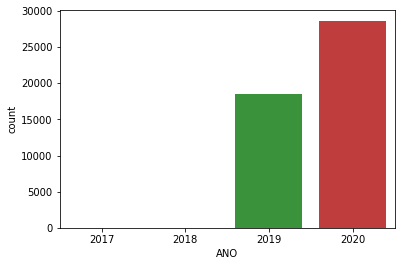

In [22]:
# Gráfico de Barra com o numero de registro por ANO.
sns.countplot(x='ANO',data = df_2.sort_values(by=['ANO']))

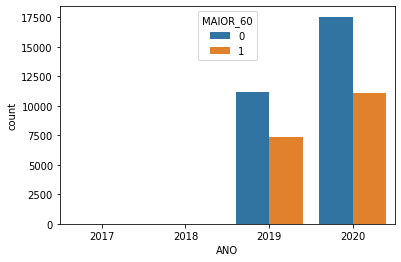

In [23]:
# Gráfico de Barra com o numero de registro por ANO e por maior e menor de 60.
sns.countplot(x='ANO',hue='MAIOR_60', data = df_2.sort_values(by=['ANO']))

In [24]:
# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
df_variacao = pd.DataFrame([
  ["2016", ((df_2.ANO == '2016') & (df_2.MAIOR_60 == 0)).sum(), 0, 0.0 ],
  ["2016", ((df_2.ANO == '2016') & (df_2.MAIOR_60 == 1)).sum(), 1, 0.0 ],

  ["2017", ((df_2.ANO == '2017') & (df_2.MAIOR_60 == 0)).sum(), 0, (((df_2.ANO == '2017') & (df_2.MAIOR_60 == 0)).sum()/ ((df_2.ANO == '2016') & (df_2.MAIOR_60 == 0)).sum() if (((df_2.ANO == '2016') & (df_2.MAIOR_60 == 0)).sum()) >=1 else 0) *100-100],
  ["2017", ((df_2.ANO == '2017') & (df_2.MAIOR_60 == 1)).sum(), 1, (((df_2.ANO == '2017') & (df_2.MAIOR_60 == 1)).sum()/ ((df_2.ANO == '2016') & (df_2.MAIOR_60 == 1)).sum() if (((df_2.ANO == '2016') & (df_2.MAIOR_60 == 1)).sum()) >=1 else 0) *100-100],
  ["2018", ((df_2.ANO == '2018') & (df_2.MAIOR_60 == 0)).sum(), 0, (((df_2.ANO == '2018') & (df_2.MAIOR_60 == 0)).sum()/ ((df_2.ANO == '2017') & (df_2.MAIOR_60 == 0)).sum() if (((df_2.ANO == '2017') & (df_2.MAIOR_60 == 0)).sum()) >=1 else 0) *100-100],
  ["2018", ((df_2.ANO == '2018') & (df_2.MAIOR_60 == 1)).sum(), 1, (((df_2.ANO == '2018') & (df_2.MAIOR_60 == 1)).sum()/ ((df_2.ANO == '2017') & (df_2.MAIOR_60 == 1)).sum() if (((df_2.ANO == '2017') & (df_2.MAIOR_60 == 1)).sum()) >=1 else 0) *100-100],
  ["2019", ((df_2.ANO == '2019') & (df_2.MAIOR_60 == 0)).sum(), 0, (((df_2.ANO == '2019') & (df_2.MAIOR_60 == 0)).sum()/ ((df_2.ANO == '2018') & (df_2.MAIOR_60 == 0)).sum() if (((df_2.ANO == '2018') & (df_2.MAIOR_60 == 0)).sum()) >=1 else 0) *100-100],
  ["2019", ((df_2.ANO == '2019') & (df_2.MAIOR_60 == 1)).sum(), 1, (((df_2.ANO == '2019') & (df_2.MAIOR_60 == 1)).sum()/ ((df_2.ANO == '2018') & (df_2.MAIOR_60 == 1)).sum() if (((df_2.ANO == '2018') & (df_2.MAIOR_60 == 1)).sum()) >=1 else 0) *100-100],
  ["2020", ((df_2.ANO == '2020') & (df_2.MAIOR_60 == 0)).sum(), 0, (((df_2.ANO == '2020') & (df_2.MAIOR_60 == 0)).sum()/ ((df_2.ANO == '2019') & (df_2.MAIOR_60 == 0)).sum() if (((df_2.ANO == '2019') & (df_2.MAIOR_60 == 0)).sum()) >=1 else 0) *100-100],
  ["2020", ((df_2.ANO == '2020') & (df_2.MAIOR_60 == 1)).sum(), 1, (((df_2.ANO == '2020') & (df_2.MAIOR_60 == 1)).sum()/ ((df_2.ANO == '2019') & (df_2.MAIOR_60 == 1)).sum() if (((df_2.ANO == '2019') & (df_2.MAIOR_60 == 1)).sum()) >=1 else 0) *100-100],
  
], columns=['Ano','Qtd','MAIOR_60', 'Variacao'])
df_variacao.head()


Ano  Qtd  MAIOR_60  Variacao
0  2016    0         0       0.0
1  2016    0         1       0.0
2  2017    0         0    -100.0
3  2017    1         1    -100.0
4  2018    4         0    -100.0

    Ano    Qtd  MAIOR_60       Variacao
0  2016      0         0       0.000000
2  2017      0         0    -100.000000
4  2018      4         0    -100.000000
6  2019  11175         0  279275.000000
8  2020  17542         0      56.975391


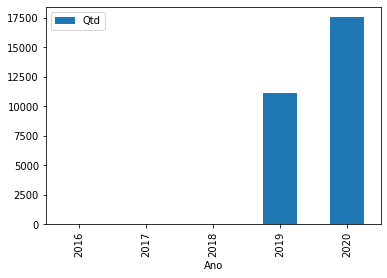

In [25]:
# Aqui estou listando a variação dos dados das pessoas com menos de 60 anos, 
# apresentando os número e uma visualização desses numeros em grafico
print(df_variacao[df_variacao['MAIOR_60']==0])
df_variacao[df_variacao['MAIOR_60']==0].plot(x='Ano', y='Qtd', kind='bar')

    Ano    Qtd  MAIOR_60       Variacao
1  2016      0         1       0.000000
3  2017      1         1    -100.000000
5  2018      1         1       0.000000
7  2019   7320         1  731900.000000
9  2020  11118         1      51.885246


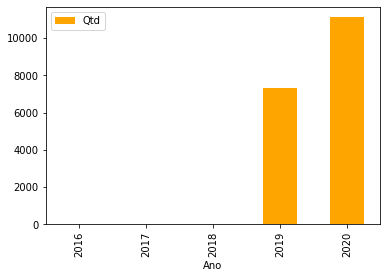

In [27]:
# Aqui estou listando a variação dos dados das pessoas com mais de 60 anos, 
# apresentando os número e uma visualização desses numeros em grafico
print(df_variacao[df_variacao['MAIOR_60']==1])
df_variacao[df_variacao['MAIOR_60']==1].plot(x='Ano', y='Qtd', kind='bar', color='orange')


In [29]:
for ano in df_variacao.Ano.unique():
  print(ano + ' | Var. < 60: ' + str(df_variacao.Variacao[(df_variacao['MAIOR_60']==0) & (df_variacao['Ano']==ano) ].values[0]),  ' | Var. >= 60: ',df_variacao.Variacao[(df_variacao['MAIOR_60']==1) & (df_variacao['Ano']==ano) ].values[0] )

2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: -100.0  | Var. >= 60:  -100.0
2018 | Var. < 60: -100.0  | Var. >= 60:  0.0
2019 | Var. < 60: 279275.0  | Var. >= 60:  731900.0
2020 | Var. < 60: 56.975391498881436  | Var. >= 60:  51.88524590163934


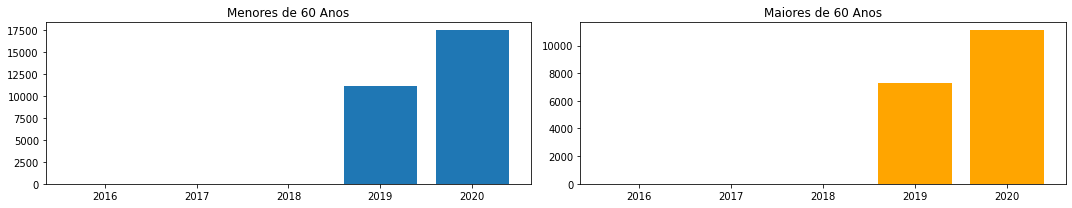

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

x1 = df_variacao.Ano[df_variacao['MAIOR_60']==0]
y1 = df_variacao.Qtd[df_variacao['MAIOR_60']==0]
axes[0].bar(x1, y1)
axes[0].set_title('Menores de 60 Anos')

x2 = df_variacao.Ano[df_variacao['MAIOR_60']==1]
y2 = df_variacao.Qtd[df_variacao['MAIOR_60']==1]
axes[1].bar(x2, y2, color='orange')
axes[1].set_title('Maiores de 60 Anos')

fig.tight_layout()

# Visualização da quantidade de registro maior e menor que 60 anos.

In [31]:
maior_60 = df_2[df_2.AP_NUIDADE >=60 ]
menor_60 = df_2[df_2.AP_NUIDADE < 60]

num_maior_60 = maior_60.shape[0]
num_menor_60 = menor_60.shape[0]


print( num_maior_60 / (num_maior_60 + num_menor_60) * 100 , "% maior de 60.")
print( num_menor_60 / (num_maior_60 + num_menor_60) * 100,"% menor de 60.")

39.10010389940841 % maior de 60.
60.89989610059159 % menor de 60.


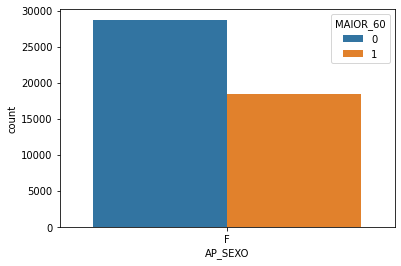

In [32]:
sns.countplot(x='AP_SEXO', hue='MAIOR_60',data = df_2)

# Histograma 

In [35]:
maior_60 = df_2[df_2.AP_NUIDADE >=60 ]
menor_60 = df_2[df_2.AP_NUIDADE < 60]
maior_60.shape, menor_60.shape

((18440, 17), (28721, 17))

In [44]:
maior_60.head()

AP_GESTAO     AP_AUTORIZ  AP_CMP  ...  MAIOR_60   DTSOLIC_2   ANO
8      270430  2719201477707  201906  ...         1  30/06/2019  2019
11     270430  2719201446490  201905  ...         1  31/05/2019  2019
18     270430  2719201464540  201906  ...         1  30/06/2019  2019
19     270430  2719201446489  201905  ...         1  31/05/2019  2019
24     270030  2719202132669  201906  ...         1  31/05/2019  2019

[5 rows x 17 columns]

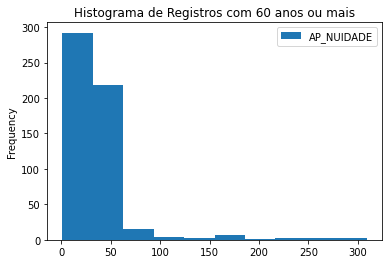

In [45]:
maior_60.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['AP_NUIDADE'].count().plot.hist(title='Histograma de Registros com 60 anos ou mais')

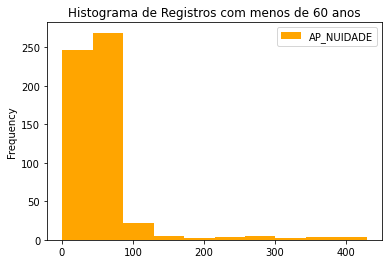

In [46]:
menor_60.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['AP_NUIDADE'].count().plot.hist(title='Histograma de Registros com menos de 60 anos', color='orange')

# Boxplot

In [140]:
maior_60 = df_2[df_2.AP_NUIDADE >=60 ]
menor_60 = df_2[df_2.AP_NUIDADE < 60]
maior_60.shape, menor_60.shape

((18440, 17), (28721, 17))

In [147]:
df_maior60 = maior_60.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC",'MAIOR_60'], as_index=False, dropna=False)['AP_NUIDADE'].count()
df_menor60 = menor_60.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC",'MAIOR_60'], as_index=False, dropna=False)['AP_NUIDADE'].count()

#.plot.hist(title='Histograma de Registros com 60 anos ou mais')

In [148]:
print('***** Menor de 60 anos ***')
print('Média: ', df_maior60.AP_NUIDADE.mean())
print('Min: ', df_maior60.AP_NUIDADE.min())
print('Max: ', df_maior60.AP_NUIDADE.max())
print('***** 60 anos ou mais ***')
print('Média: ', df_menor60.AP_NUIDADE.mean())
print('Min: ', df_menor60.AP_NUIDADE.min())
print('Max: ', df_menor60.AP_NUIDADE.max())

***** Menor de 60 anos ***
Média:  33.772893772893774
Min:  1
Max:  309
***** 60 anos ou mais ***
Média:  51.19607843137255
Min:  1
Max:  429


Text(0.5, 1.0, 'Registros com menos de 60 anos')

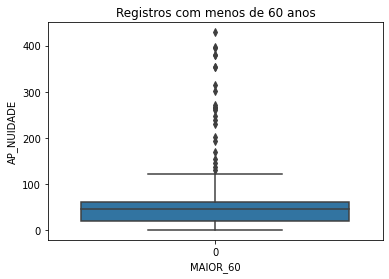

In [153]:
sns.boxplot(x='MAIOR_60', y='AP_NUIDADE', data=df_menor60).set_title('Registros com menos de 60 anos')

Text(0.5, 1.0, 'Registros com 60 anos ou mais')

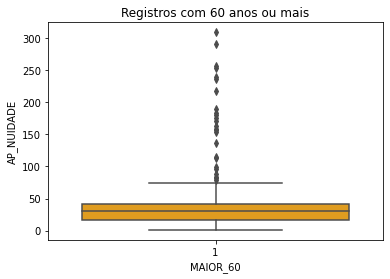

In [152]:
sns.boxplot(x='MAIOR_60', y='AP_NUIDADE', data=df_maior60, color='orange').set_title('Registros com 60 anos ou mais')

# Construindo a tabela de frequencia

In [47]:
# inicialmente vamos testar criando 5 classes de dados e vamos ver se nos atende.
k = 5
idade_inferior = df_2.AP_NUIDADE.min()
idade_superior = df_2.AP_NUIDADE.max()
amplitude = idade_superior - idade_inferior
largura = round(amplitude / k)
print(idade_inferior, idade_superior , largura)

0 98 20


In [48]:
idades_freq = pd.DataFrame([
  ["0 - 19", ((df_2.AP_NUIDADE >= 0) & (df_2.AP_NUIDADE <= 19)).sum()],
  ["20 - 39", ((df_2.AP_NUIDADE >= 20) & (df_2.AP_NUIDADE <= 39)).sum()],
  ["40 - 59", ((df_2.AP_NUIDADE >= 40) & (df_2.AP_NUIDADE <= 59)).sum()],
  ["60 - 79", ((df_2.AP_NUIDADE >= 60) & (df_2.AP_NUIDADE <= 79)).sum()],
  ["80 - 100", ((df_2.AP_NUIDADE >= 80) & (df_2.AP_NUIDADE <= 100)).sum()]
  
], columns=['Idade','Qtd'])

idades_freq['%freq'] = (idades_freq['Qtd'] / idades_freq['Qtd'].sum())*100
idades_freq

Idade    Qtd      %freq
0    0 - 19     21   0.044528
1   20 - 39   4282   9.079536
2   40 - 59  24418  51.775832
3   60 - 79  16949  35.938593
4  80 - 100   1491   3.161511

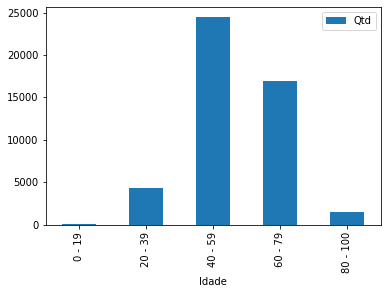

In [49]:
idades_freq.plot(x='Idade', y='Qtd',kind='bar')

# Quantidade de Registro por Estado

In [50]:
df_2.groupby('ESTADO_UF')['AP_NUIDADE'].count().sort_values(ascending=False)

ESTADO_UF
SP    11602
MG     5856
RJ     3993
RS     3797
PR     3123
BA     2932
CE     2419
SC     2313
PE     1762
GO     1206
ES     1133
RN     1056
PB      884
PI      870
MA      793
PA      720
AL      633
RO      459
AM      400
MS      390
DF      249
MT      236
TO      175
SE      160
Name: AP_NUIDADE, dtype: int64

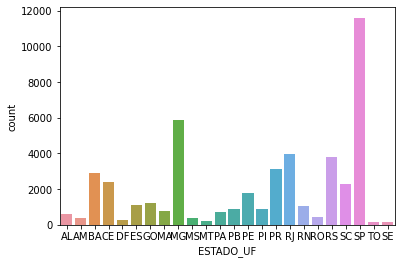

In [51]:
# Gráfico de Barra com o numero de registro por estado.
sns.countplot(x='ESTADO_UF',data = df_2)

# Numero de registros maiores e menores de 60 anos por estado

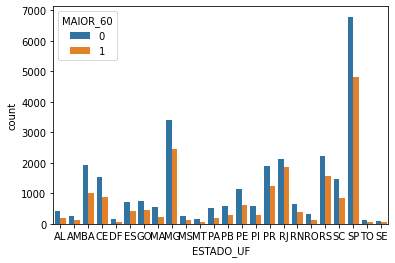

In [52]:
sns.countplot(x='ESTADO_UF', hue='MAIOR_60',data = df_2)

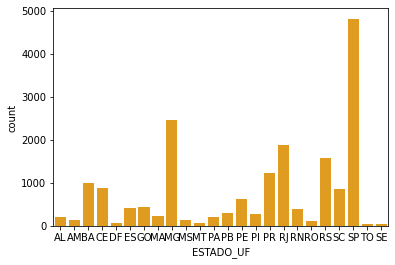

In [59]:
sns.countplot(x='ESTADO_UF', color='orange', data = df_2[(df_2["MAIOR_60"] == 1)])

# AP_TPAPAC - Indica se a APAC é 1 – inicial, 2 – continuidade, 3 – única

Vamos dar uma olhada nessa variavel em relação aos maiores e menores que 60

In [ ]:
df_2.AP_TPAPAC.unique()

array([3])

Não temos AP_TPAPAC 1 e nem 2, então vamos olhar apenas o 3

In [60]:
df_2.groupby('AP_TPAPAC')['AP_TPAPAC'].count()

AP_TPAPAC
3    47161
Name: AP_TPAPAC, dtype: int64

In [61]:
df_2.head()

AP_GESTAO     AP_AUTORIZ  AP_CMP  ...  MAIOR_60   DTSOLIC_2   ANO
0     270430  2719201439669  201905  ...         0  31/05/2019  2019
1     270430  2719201439702  201905  ...         0  31/05/2019  2019
2     270430  2719201439735  201905  ...         0  31/05/2019  2019
3     270430  2719201439724  201905  ...         0  31/05/2019  2019
4     270030  2719202132702  201906  ...         0  31/05/2019  2019

[5 rows x 17 columns]

In [62]:
# Como nosso foco é a idade, vamos ver a proporção de registro que temos em cada faixa.
df_2.groupby(by=['AP_TPAPAC','MAIOR_60'])['AP_TPAPAC'].count()

AP_TPAPAC  MAIOR_60
3          0           28721
           1           18440
Name: AP_TPAPAC, dtype: int64

In [63]:
anos = df_2.ANO.sort_values().unique()
faixa60 = df_2.MAIOR_60.unique()
ap_tpapac = df_2.AP_TPAPAC.unique()
v_dados = []
for ano in anos:
  for f in faixa60:
    for tpapac in ap_tpapac:
      qtd_atual = ((df_2.ANO == ano ) & (df_2.MAIOR_60 == f) & (df_2.AP_TPAPAC == tpapac)).sum()
      qtd_ant = ((df_2.ANO == str(int(ano)-1) ) & (df_2.MAIOR_60 == f) & (df_2.AP_TPAPAC == tpapac)).sum()
      linha = [ano, tpapac, f, qtd_atual, 0 if ano=='2016' or qtd_ant < 1 else ((qtd_atual / qtd_ant)*100)-100  ]
      v_dados.append(linha)

# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
dfTPAPAC = pd.DataFrame(v_dados, columns=['ANO','AP_TPAPAC','MAIOR_60','QTD', 'VARIACAO'])
dfTPAPAC.head()

ANO  AP_TPAPAC  MAIOR_60    QTD  VARIACAO
0  2017          3         0      0       0.0
1  2017          3         1      1       0.0
2  2018          3         0      4       0.0
3  2018          3         1      1       0.0
4  2019          3         0  11175  279275.0

AP_TPAPAC = 3

TPAPAC= 3
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 279275.0  | Var. >= 60:  731900.0
2020 | Var. < 60: 56.975391498881436  | Var. >= 60:  51.88524590163934


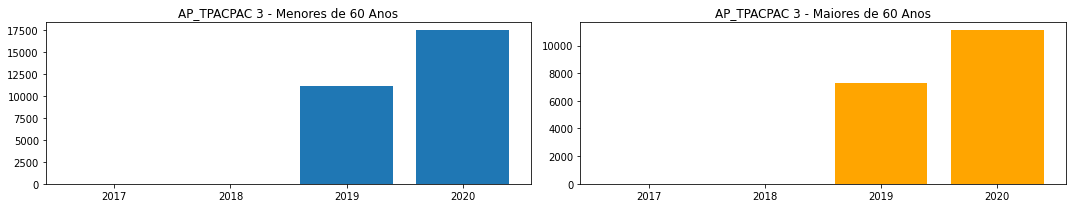

In [64]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
TPAPAC = 3
print('TPAPAC=',TPAPAC)
for ano in dfTPAPAC.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfTPAPAC.VARIACAO[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)].values[0]),  ' | Var. >= 60: ',dfTPAPAC.VARIACAO[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC) ].values[0] )

x1 = dfTPAPAC.ANO[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y1 = dfTPAPAC.QTD[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
axes[0].bar(x1, y1)
axes[0].set_title('AP_TPACPAC '+str(TPAPAC)+' - Menores de 60 Anos')

x2 = dfTPAPAC.ANO[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y2 = dfTPAPAC.QTD[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
axes[1].bar(x2, y2, color='orange')
axes[1].set_title('AP_TPACPAC '+str(TPAPAC)+' - Maiores de 60 Anos')

fig.tight_layout()

Olha que interessante, só temos APAC única a partir de  2019 e 2020.

Porque isso acontece? Nesses anos mudou a forma de preenchimento desse campo?

# AR_ESTADI -> Estádio – UICC (0;1;2;3;4)

In [66]:
# Eu não sei a importancia desse campo, vou fazer a analise apenas dos dados. 
# Sem aplicar nenhuma regra de negócio e nem excluir nenhum registro
df_2.AR_ESTADI.unique()
# array([1., 2., 3., 0., 4.])

array([1., 2., 3., 0., 4.])

In [67]:
df_2.groupby('AR_ESTADI')['AR_ESTADI'].count()

AR_ESTADI
0.0     3263
1.0    10274
2.0    14319
3.0    15378
4.0     3927
Name: AR_ESTADI, dtype: int64

In [68]:
# Como nosso foco é a idade, vamos ver a proporção de registro que temos em cada faixa.
df_2.groupby(by=['AR_ESTADI','MAIOR_60'])['AR_ESTADI'].count()

AR_ESTADI  MAIOR_60
0.0        0            1935
           1            1328
1.0        0            5513
           1            4761
2.0        0            8670
           1            5649
3.0        0           10229
           1            5149
4.0        0            2374
           1            1553
Name: AR_ESTADI, dtype: int64

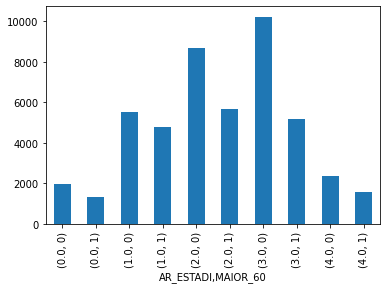

In [69]:
df_2.groupby(by=['AR_ESTADI','MAIOR_60'])['AR_ESTADI'].count().plot.bar()

Explicando esse gráfico, no eixo x temos os valores assim (0.0,0), (0.0,1). Esse primeiro valor (0.0,1.0,2.0,...10.0) é referente aos valores do campo AR_ESTADI. O valores 0 e 1 que aparecem depois da virgula é referente ao campo MAIOR_60 ( 0 é menor, 1 é maior que 60). O tamanho da barra é referente ao número de registro de cada grupo.

In [70]:
anos = df_2.ANO.sort_values().unique()
faixa60 = df_2.MAIOR_60.unique()
ar_estadi = df_2.AR_ESTADI.sort_values().unique()
v_dados = []
for ano in anos:
  for f in faixa60:
    for estadi in ar_estadi:
      qtd_atual = ((df_2.ANO == ano ) & (df_2.MAIOR_60 == f) & (df_2.AR_ESTADI == estadi)).sum()
      qtd_ant = ((df_2.ANO == str(int(ano)-1) ) & (df_2.MAIOR_60 == f) & (df_2.AR_ESTADI == estadi)).sum()
      linha = [ano, estadi, f, qtd_atual, 0 if ano=='2016' or qtd_ant < 1  else ((qtd_atual / qtd_ant)*100)-100  ]
      v_dados.append(linha)

# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
dfAR_ESTADI = pd.DataFrame(v_dados, columns=['ANO','AR_ESTADI','MAIOR_60','QTD', 'VARIACAO'])
dfAR_ESTADI.head()

ANO  AR_ESTADI  MAIOR_60  QTD  VARIACAO
0  2017        0.0         0    0       0.0
1  2017        1.0         0    0       0.0
2  2017        2.0         0    0       0.0
3  2017        3.0         0    0       0.0
4  2017        4.0         0    0       0.0

AR_ESTADI = 0.0

ESTADI= 0
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 76100.0  | Var. >= 60:  0.0
2020 | Var. < 60: 53.80577427821521  | Var. >= 60:  38.42010771992818


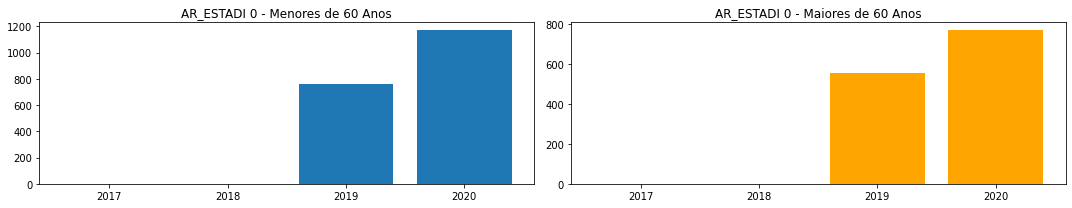

In [71]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 0
print('ESTADI=',ESTADI)
for ano in dfAR_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI) ].values[0] )

x1 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y1 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y2 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_ESTADI = 1.0

ESTADI= 1
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 113050.0  | Var. >= 60:  0.0
2020 | Var. < 60: 43.52629253203713  | Var. >= 60:  41.55251141552512


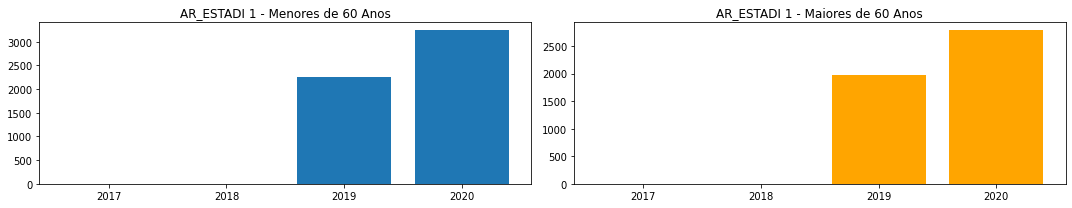

In [72]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 1
print('ESTADI=',ESTADI)
for ano in dfAR_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI) ].values[0] )

x1 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y1 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y2 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_ESTADI = 2.0

ESTADI= 2
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 0.0  | Var. >= 60:  223600.0
2020 | Var. < 60: 53.28659070990361  | Var. >= 60:  52.436298614215445


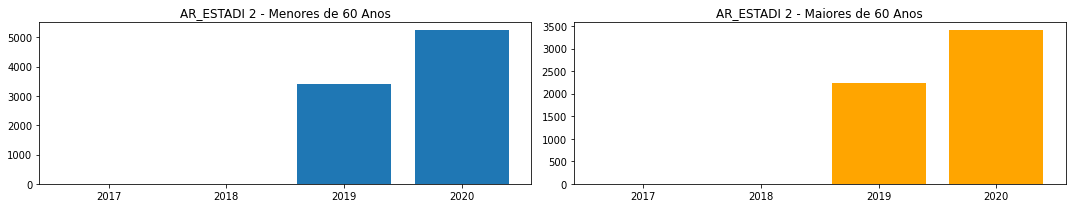

In [73]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 2
print('ESTADI=',ESTADI)
for ano in dfAR_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI) ].values[0] )

x1 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y1 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y2 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_ESTADI = 3.0

ESTADI= 3
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 388800.0  | Var. >= 60:  0.0
2020 | Var. < 60: 62.99820005142712  | Var. >= 60:  60.84093211752787


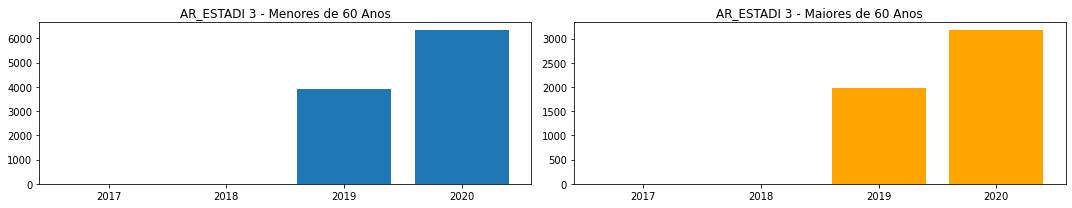

In [74]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 3
print('ESTADI=',ESTADI)
for ano in dfAR_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI) ].values[0] )

x1 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y1 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y2 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_ESTADI = 4.0

ESTADI= 4
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 0.0  | Var. >= 60:  0.0
2020 | Var. < 60: 83.29355608591885  | Var. >= 60:  67.29776247848537


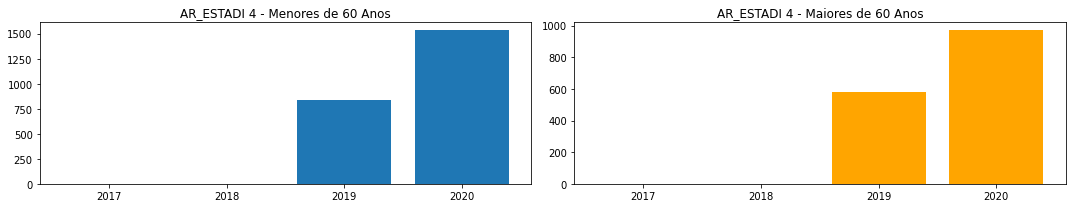

In [75]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 4
print('ESTADI=',ESTADI)
for ano in dfAR_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAR_ESTADI.VARIACAO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['ANO']==ano) & (dfAR_ESTADI['AR_ESTADI']==ESTADI) ].values[0] )

x1 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y1 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==0) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAR_ESTADI.ANO[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
y2 = dfAR_ESTADI.QTD[(dfAR_ESTADI['MAIOR_60']==1) & (dfAR_ESTADI['AR_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

# AR_FINALI - Finalidade Do Tratamento (1=RADICAL; 2=ADJUVANTE; 3=ANTIÁLGICA; 4=PALIATIVA; 5=PRÉVIA;6=ANTIHEMORRÁGICA)


In [76]:
# Eu não sei a importancia desse campo, vou fazer a analise apenas dos dados.
# a documentação apresentar até o codigo 6, mas no dataset tem o codigo 7. 
# Provavelmente o documento esta desatualizado 
df_2.AR_FINALI.sort_values().unique()
# array([1., 2., 3., 4., 5., 6., 7.])

array([1., 2., 3., 4., 5., 6., 7.])

In [77]:
df_2.groupby('AR_FINALI')['AR_FINALI'].count()

AR_FINALI
1.0     7560
2.0    35645
3.0      358
4.0     1395
5.0     1417
6.0      780
7.0        6
Name: AR_FINALI, dtype: int64

In [78]:
# Como nosso foco é a idade, vamos ver a proporção de registro que temos em cada faixa.
df_2.groupby(by=['AR_FINALI','MAIOR_60'])['AR_FINALI'].count()

AR_FINALI  MAIOR_60
1.0        0            4690
           1            2870
2.0        0           21770
           1           13875
3.0        0             210
           1             148
4.0        0             789
           1             606
5.0        0             835
           1             582
6.0        0             421
           1             359
7.0        0               6
Name: AR_FINALI, dtype: int64

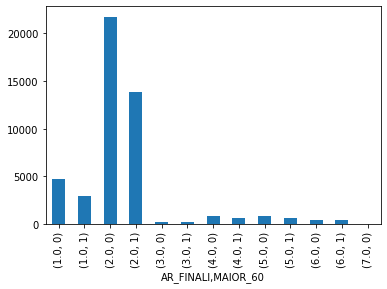

In [80]:
df_2.groupby(by=['AR_FINALI','MAIOR_60'])['AR_FINALI'].count().plot.bar()

In [81]:
anos = df_2.ANO.sort_values().unique()
faixa60 = df_2.MAIOR_60.unique()
ar_finali = df_2.AR_FINALI.sort_values().unique()
v_dados = []
for ano in anos:
  for f in faixa60:
    for finali in ar_finali:
      qtd_atual = ((df_2.ANO == ano ) & (df_2.MAIOR_60 == f) & (df_2.AR_FINALI == finali)).sum()
      qtd_ant = ((df_2.ANO == str(int(ano)-1) ) & (df_2.MAIOR_60 == f) & (df_2.AR_FINALI == finali)).sum()
      linha = [ano, finali, f, qtd_atual, 0 if ano=='2016' or qtd_ant ==0  else ((qtd_atual / qtd_ant)*100)-100  ]
      v_dados.append(linha)

# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
dfAR_FINALI = pd.DataFrame(v_dados, columns=['ANO','AR_FINALI','MAIOR_60','QTD', 'VARIACAO'])
dfAR_FINALI.head()

ANO  AR_FINALI  MAIOR_60  QTD  VARIACAO
0  2017        1.0         0    0       0.0
1  2017        2.0         0    0       0.0
2  2017        3.0         0    0       0.0
3  2017        4.0         0    0       0.0
4  2017        5.0         0    0       0.0

In [82]:
# 1., 2., 4., 5., 6., 3., 7.

AR_FINALI = 1.0

FINALI= 1
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 90700.0  | Var. >= 60:  0.0
2020 | Var. < 60: 58.14977973568284  | Var. >= 60:  43.42663273960986


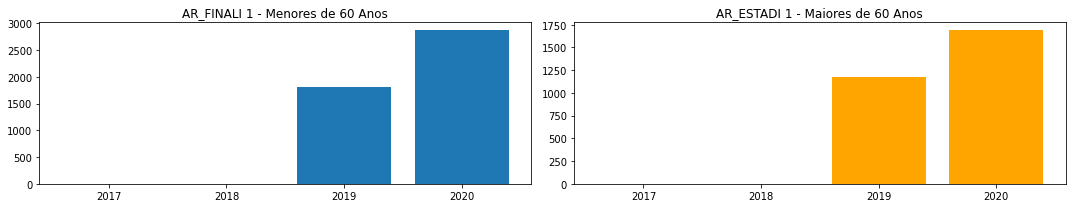

In [83]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
FINALI = 1
print('FINALI=',FINALI)
for ano in dfAR_FINALI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI)].values[0]),  ' | Var. >= 60: ',dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI) ].values[0] )

x1 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y1 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_FINALI '+str(FINALI)+' - Menores de 60 Anos')

x2 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y2 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(FINALI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_FINALI = 2.0

FINALI= 2
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 419100.0  | Var. >= 60:  539600.0
2020 | Var. < 60: 59.63740458015266  | Var. >= 60:  57.0502130813415


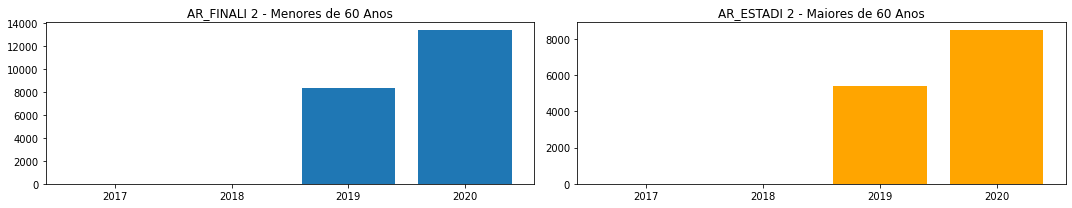

In [84]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
FINALI = 2
print('FINALI=',FINALI)
for ano in dfAR_FINALI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI)].values[0]),  ' | Var. >= 60: ',dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI) ].values[0] )

x1 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y1 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_FINALI '+str(FINALI)+' - Menores de 60 Anos')

x2 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y2 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(FINALI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_FINALI=3


FINALI= 3
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 0.0  | Var. >= 60:  0.0
2020 | Var. < 60: 83.7837837837838  | Var. >= 60:  79.24528301886792


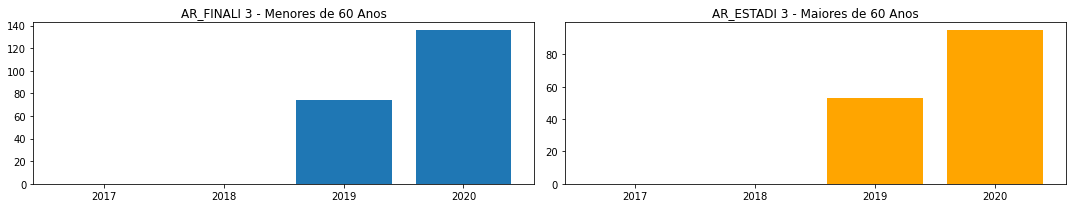

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
FINALI = 3
print('FINALI=',FINALI)
for ano in dfAR_FINALI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI)].values[0]),  ' | Var. >= 60: ',dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI) ].values[0] )

x1 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y1 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_FINALI '+str(FINALI)+' - Menores de 60 Anos')

x2 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y2 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(FINALI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_FINALI = 4

FINALI= 4
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 0.0  | Var. >= 60:  0.0
2020 | Var. < 60: 57.00325732899023  | Var. >= 60:  74.20814479638008


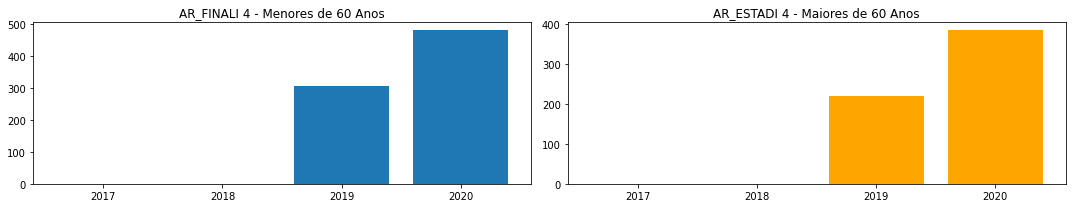

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
FINALI = 4
print('FINALI=',FINALI)
for ano in dfAR_FINALI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI)].values[0]),  ' | Var. >= 60: ',dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI) ].values[0] )

x1 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y1 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_FINALI '+str(FINALI)+' - Menores de 60 Anos')

x2 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y2 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(FINALI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_FINALI = 5

FINALI= 5
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 0.0  | Var. >= 60:  0.0
2020 | Var. < 60: 59.31677018633542  | Var. >= 60:  41.49377593360995


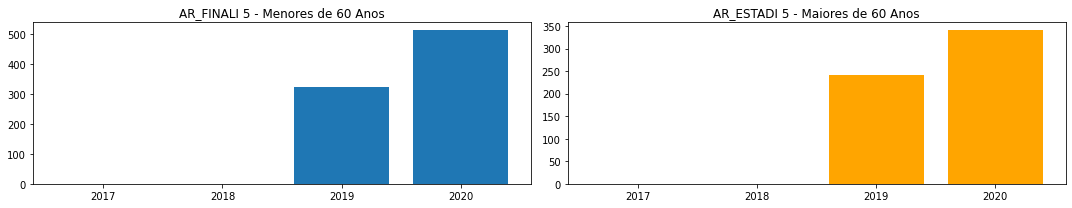

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
FINALI = 5
print('FINALI=',FINALI)
for ano in dfAR_FINALI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI)].values[0]),  ' | Var. >= 60: ',dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI) ].values[0] )

x1 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y1 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_FINALI '+str(FINALI)+' - Menores de 60 Anos')

x2 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y2 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(FINALI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_FINALI = 6

FINALI= 6
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 0.0  | Var. >= 60:  0.0
2020 | Var. < 60: -45.220588235294116  | Var. >= 60:  -43.23144104803494


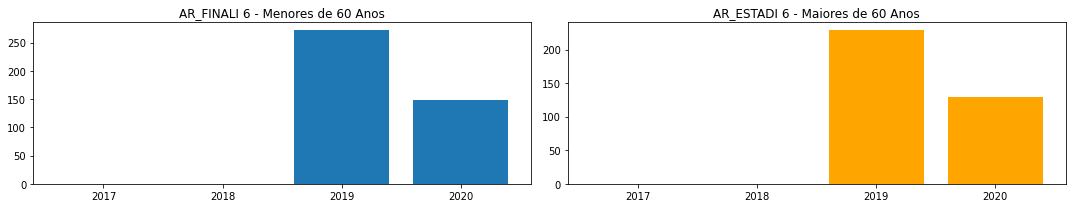

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
FINALI = 6
print('FINALI=',FINALI)
for ano in dfAR_FINALI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI)].values[0]),  ' | Var. >= 60: ',dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI) ].values[0] )

x1 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y1 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_FINALI '+str(FINALI)+' - Menores de 60 Anos')

x2 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y2 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(FINALI)+' - Maiores de 60 Anos')

fig.tight_layout()

AR_FINALI = 7

FINALI= 7
2017 | Var. < 60: 0.0  | Var. >= 60:  0.0
2018 | Var. < 60: 0.0  | Var. >= 60:  0.0
2019 | Var. < 60: 0.0  | Var. >= 60:  0.0
2020 | Var. < 60: 0.0  | Var. >= 60:  0.0


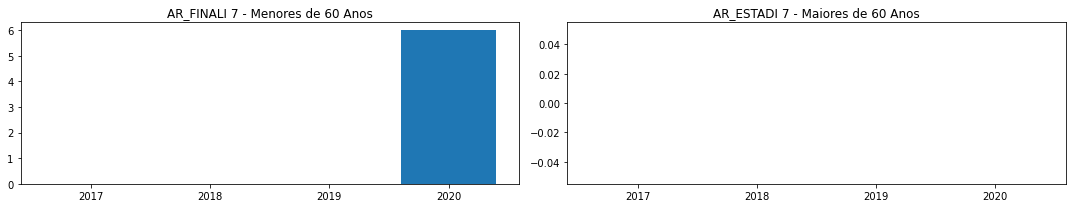

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
FINALI = 7
print('FINALI=',FINALI)
for ano in dfAR_FINALI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI)].values[0]),  ' | Var. >= 60: ',dfAR_FINALI.VARIACAO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['ANO']==ano) & (dfAR_FINALI['AR_FINALI']==FINALI) ].values[0] )

x1 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y1 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==0) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[0].bar(x1, y1)
axes[0].set_title('AR_FINALI '+str(FINALI)+' - Menores de 60 Anos')

x2 = dfAR_FINALI.ANO[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
y2 = dfAR_FINALI.QTD[(dfAR_FINALI['MAIOR_60']==1) & (dfAR_FINALI['AR_FINALI']==FINALI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AR_ESTADI '+str(FINALI)+' - Maiores de 60 Anos')

fig.tight_layout()

# Analise de Toda a Base de Dados por Estado

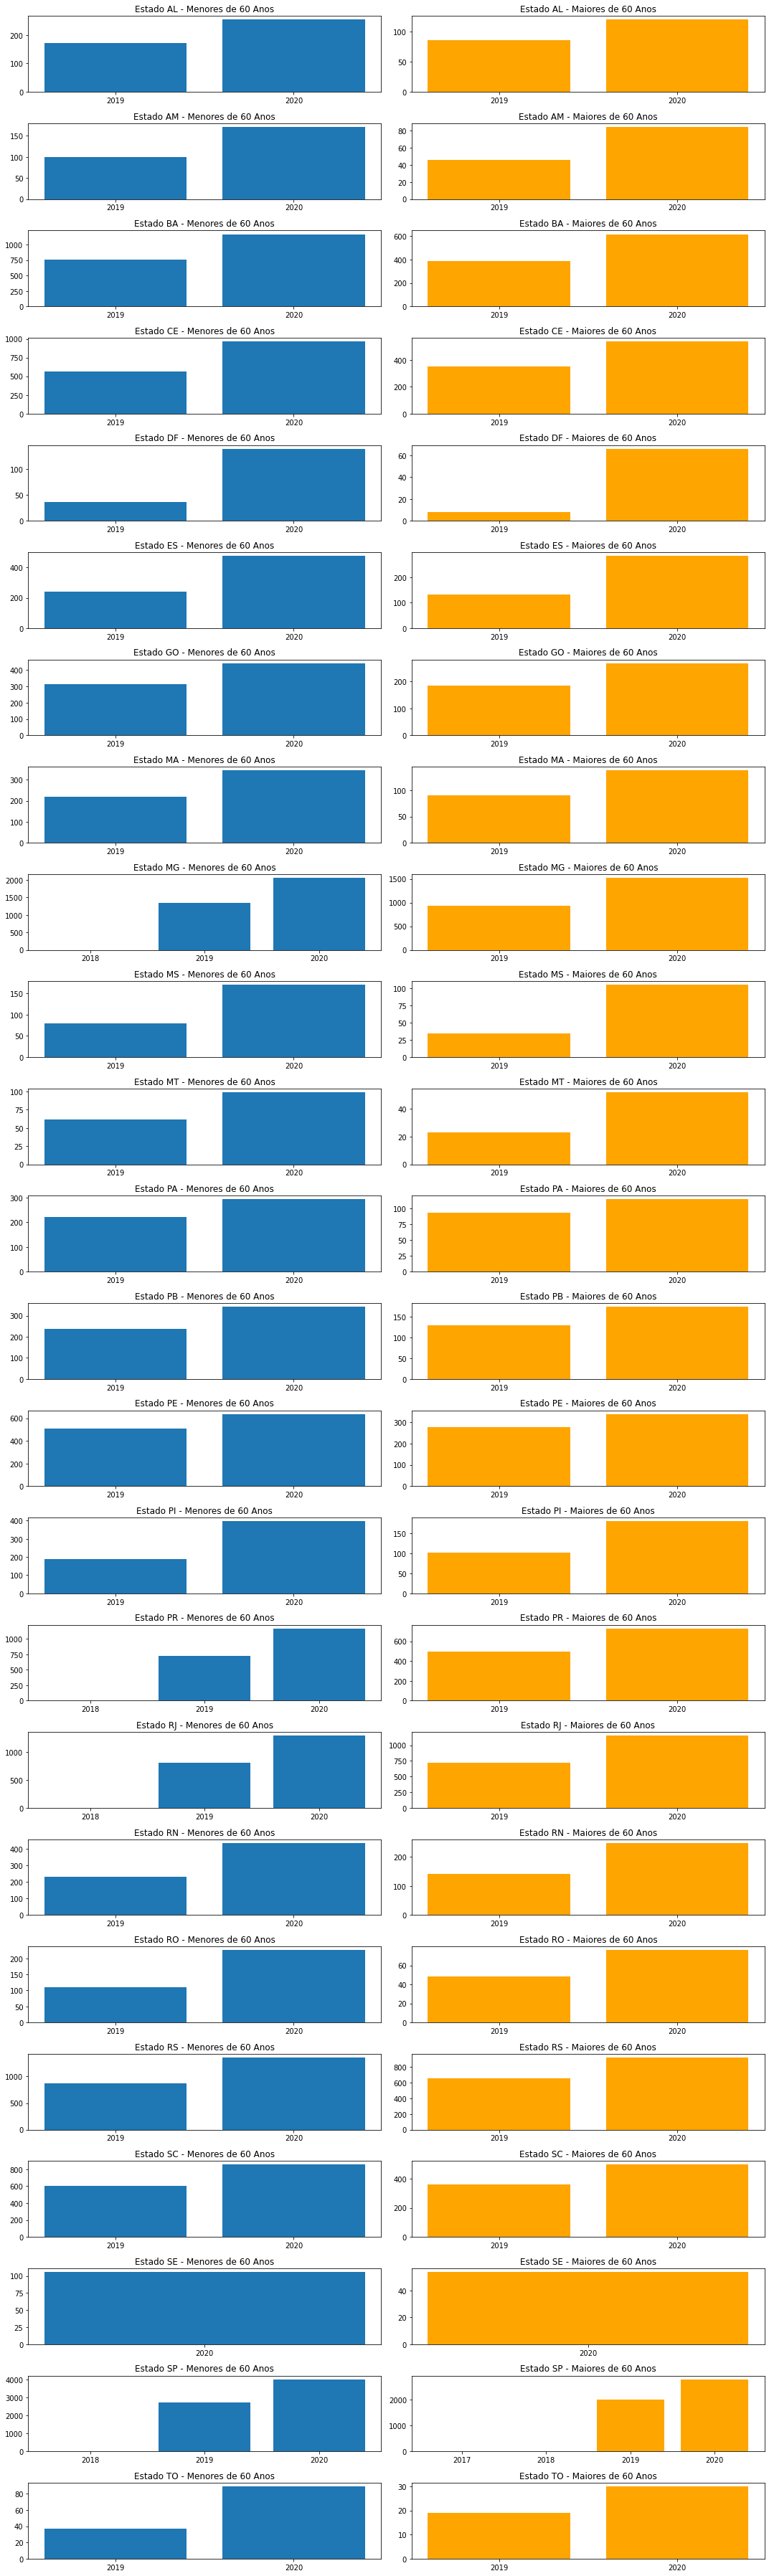

In [158]:
# Vamos imprimir dois graficos para cada estado apresentando o numero de registros em cada ano de cada estado por faixa de idade

n_estados = df_2.ESTADO_UF.sort_values().unique()
fig, axes = plt.subplots(nrows=len(n_estados), ncols=2, figsize=(15,50))
i = 0
for uf in n_estados:
  
  filtroMenor60 = (df_2["ESTADO_UF"]==uf) & (df_2['MAIOR_60']== 0)
  x1 = df_2.ANO[filtroMenor60].sort_values(ascending=True).unique()
  y1 = df_2[filtroMenor60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
  axes[i][0].bar(x1, y1)
  axes[i][0].set_title('Estado '+str(uf)+' - Menores de 60 Anos')
  axes[i][0].set_xticks(x1)
  filtroMaior60 = (df_2["ESTADO_UF"]==uf) & (df_2['MAIOR_60']== 1)
  x2 = df_2.ANO[filtroMaior60].sort_values(ascending=True).unique()
  y2 = df_2[filtroMaior60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
  axes[i][1].bar(x2, y2,color = "orange")
  axes[i][1].set_title('Estado '+str(uf)+' - Maiores de 60 Anos')
  axes[i][1].set_xticks(x2)
  i=i+1

fig.tight_layout()

# Estado por TPAPAC

In [91]:
#df_2.groupby('AP_TPAPAC')['ANO'].count()

In [159]:
def graficoEstadoPorTPAPAC(df, tpapac):
  n_estados = df.ESTADO_UF.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(n_estados), ncols=2, figsize=(15,40))
  i = 0
  for uf in n_estados:
    
    filtroMenor60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 0)  & (df['AP_TPAPAC']== tpapac)
    x1 = df.ANO[filtroMenor60].sort_values(ascending=True).unique()
    y1 = df[filtroMenor60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][0].bar(x1, y1)
    axes[i][0].set_title('TPACPAC: '+str(tpapac)+' - Estado '+str(uf)+' - Menores de 60 Anos')
    axes[i][0].set_xticks(x1)
    filtroMaior60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 1) & (df['AP_TPAPAC']== tpapac)
    x2 = df.ANO[filtroMaior60].sort_values(ascending=True).unique()
    y2 = df[filtroMaior60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][1].bar(x2, y2,color = "orange")
    axes[i][1].set_title('TPACPAC: '+str(tpapac)+' - Estado '+str(uf)+' - Maiores de 60 Anos')
    axes[i][1].set_xticks(x2)
    i=i+1

  fig.tight_layout()

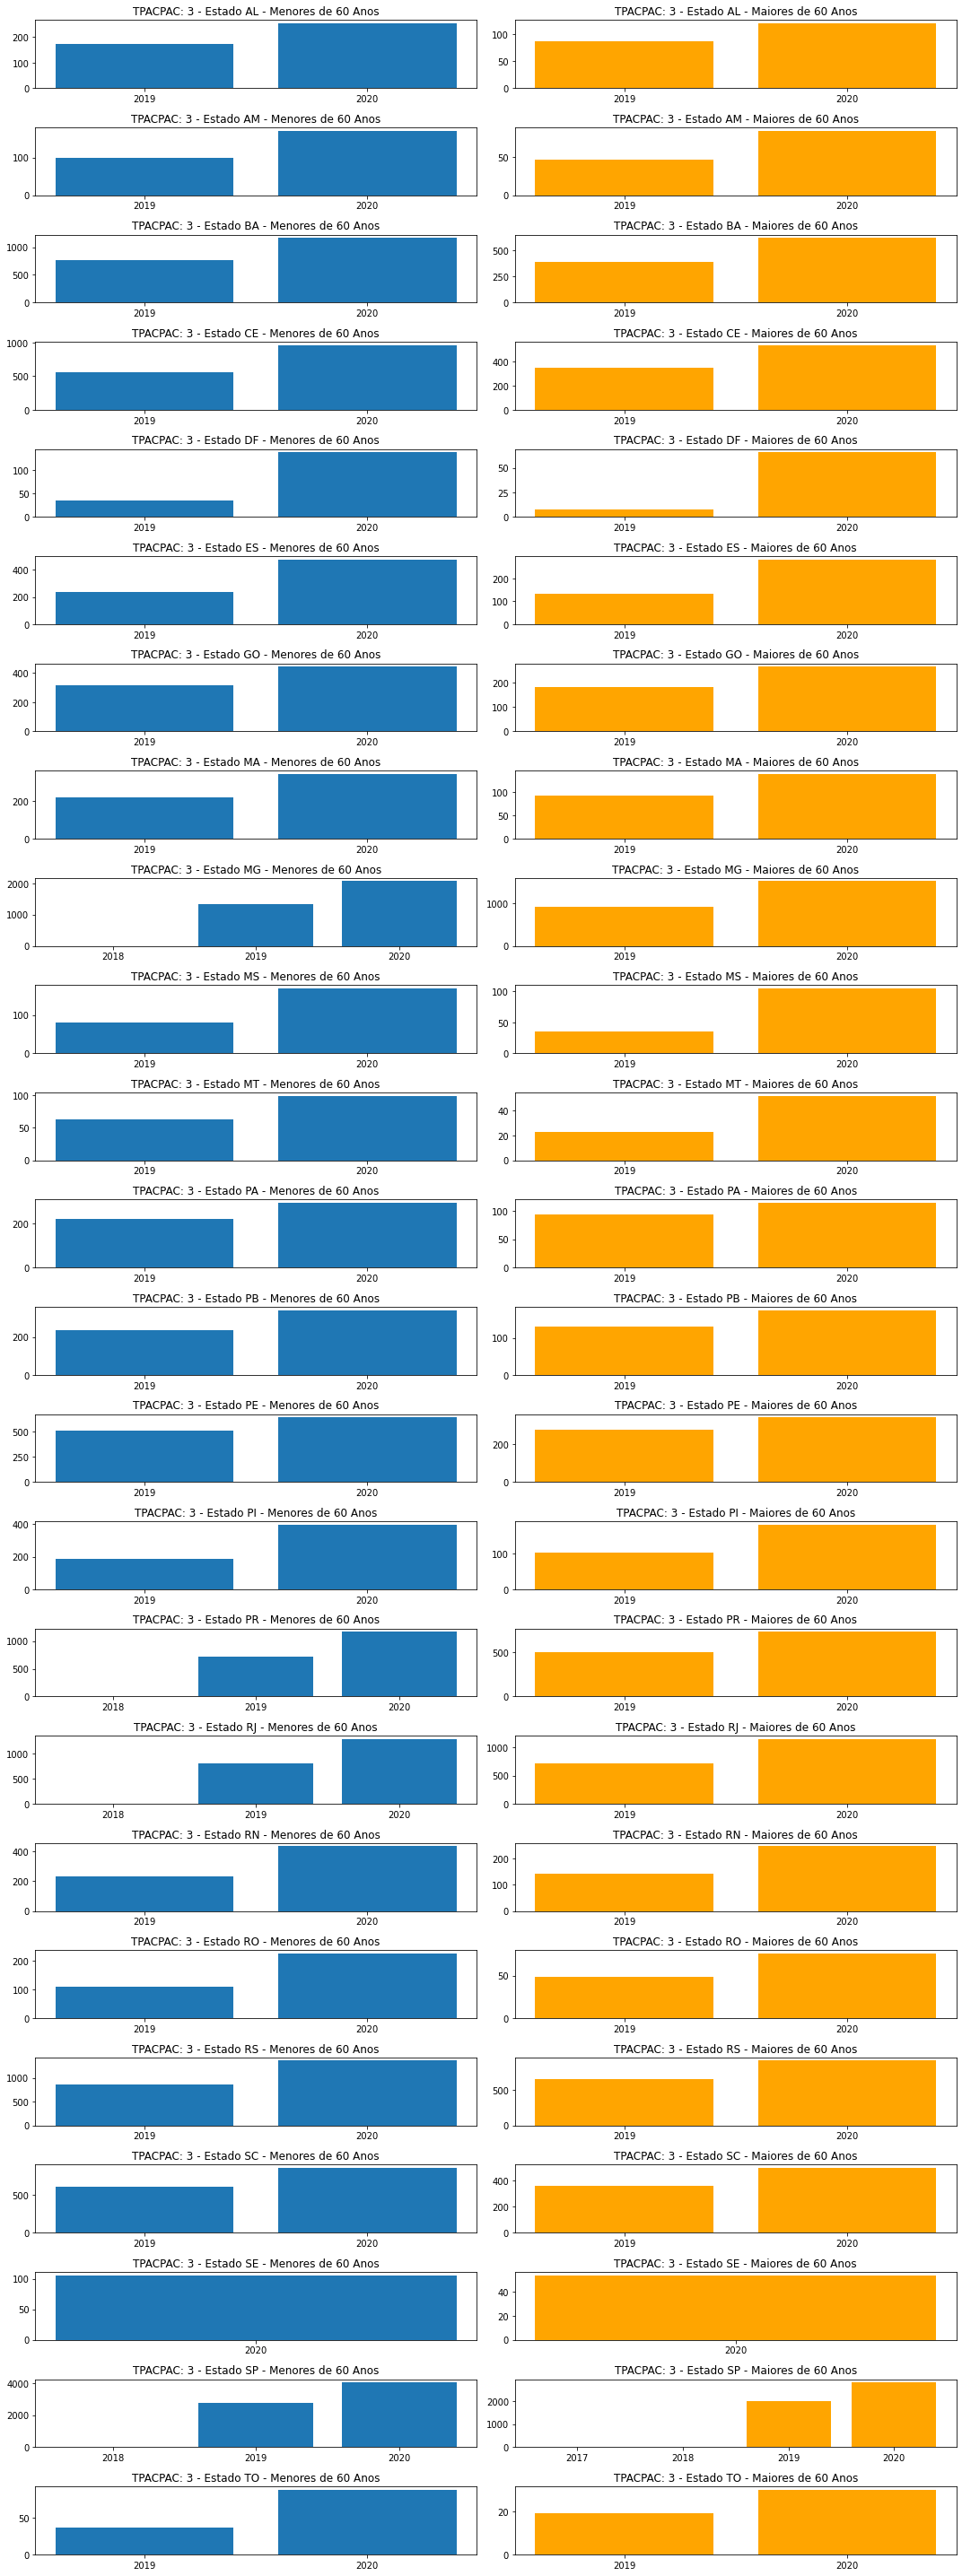

In [160]:
#TPAPAC=3
graficoEstadoPorTPAPAC(df_2, 3)

# Estado por AR_ESTADI

In [161]:
# Estado por AR_ESTADI -> Estádio – UICC (0;1;2;3;4)
def graficoEstadoPorAR_ESTADI(df, estadi):
  n_estados = df.ESTADO_UF.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(n_estados), ncols=2, figsize=(15,40))
  i = 0
  for uf in n_estados:
    
    filtroMenor60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 0)  & (df['AR_ESTADI']== estadi)
    x1 = df.ANO[filtroMenor60].sort_values(ascending=True).unique()
    y1 = df[filtroMenor60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][0].bar(x1, y1)
    axes[i][0].set_title('AR_ESTADI: '+str(estadi)+' - Estado '+str(uf)+' - Menores de 60 Anos')
    axes[i][0].set_xticks(x1)

    filtroMaior60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 1) & (df['AR_ESTADI']== estadi)
    x2 = df.ANO[filtroMaior60].sort_values(ascending=True).unique()
    y2 = df[filtroMaior60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][1].bar(x2, y2,color = "orange")
    axes[i][1].set_title('AR_ESTADI: '+str(estadi)+' - Estado '+str(uf)+' - Maiores de 60 Anos')
    axes[i][1].set_xticks(x2)
    i=i+1

  fig.tight_layout()

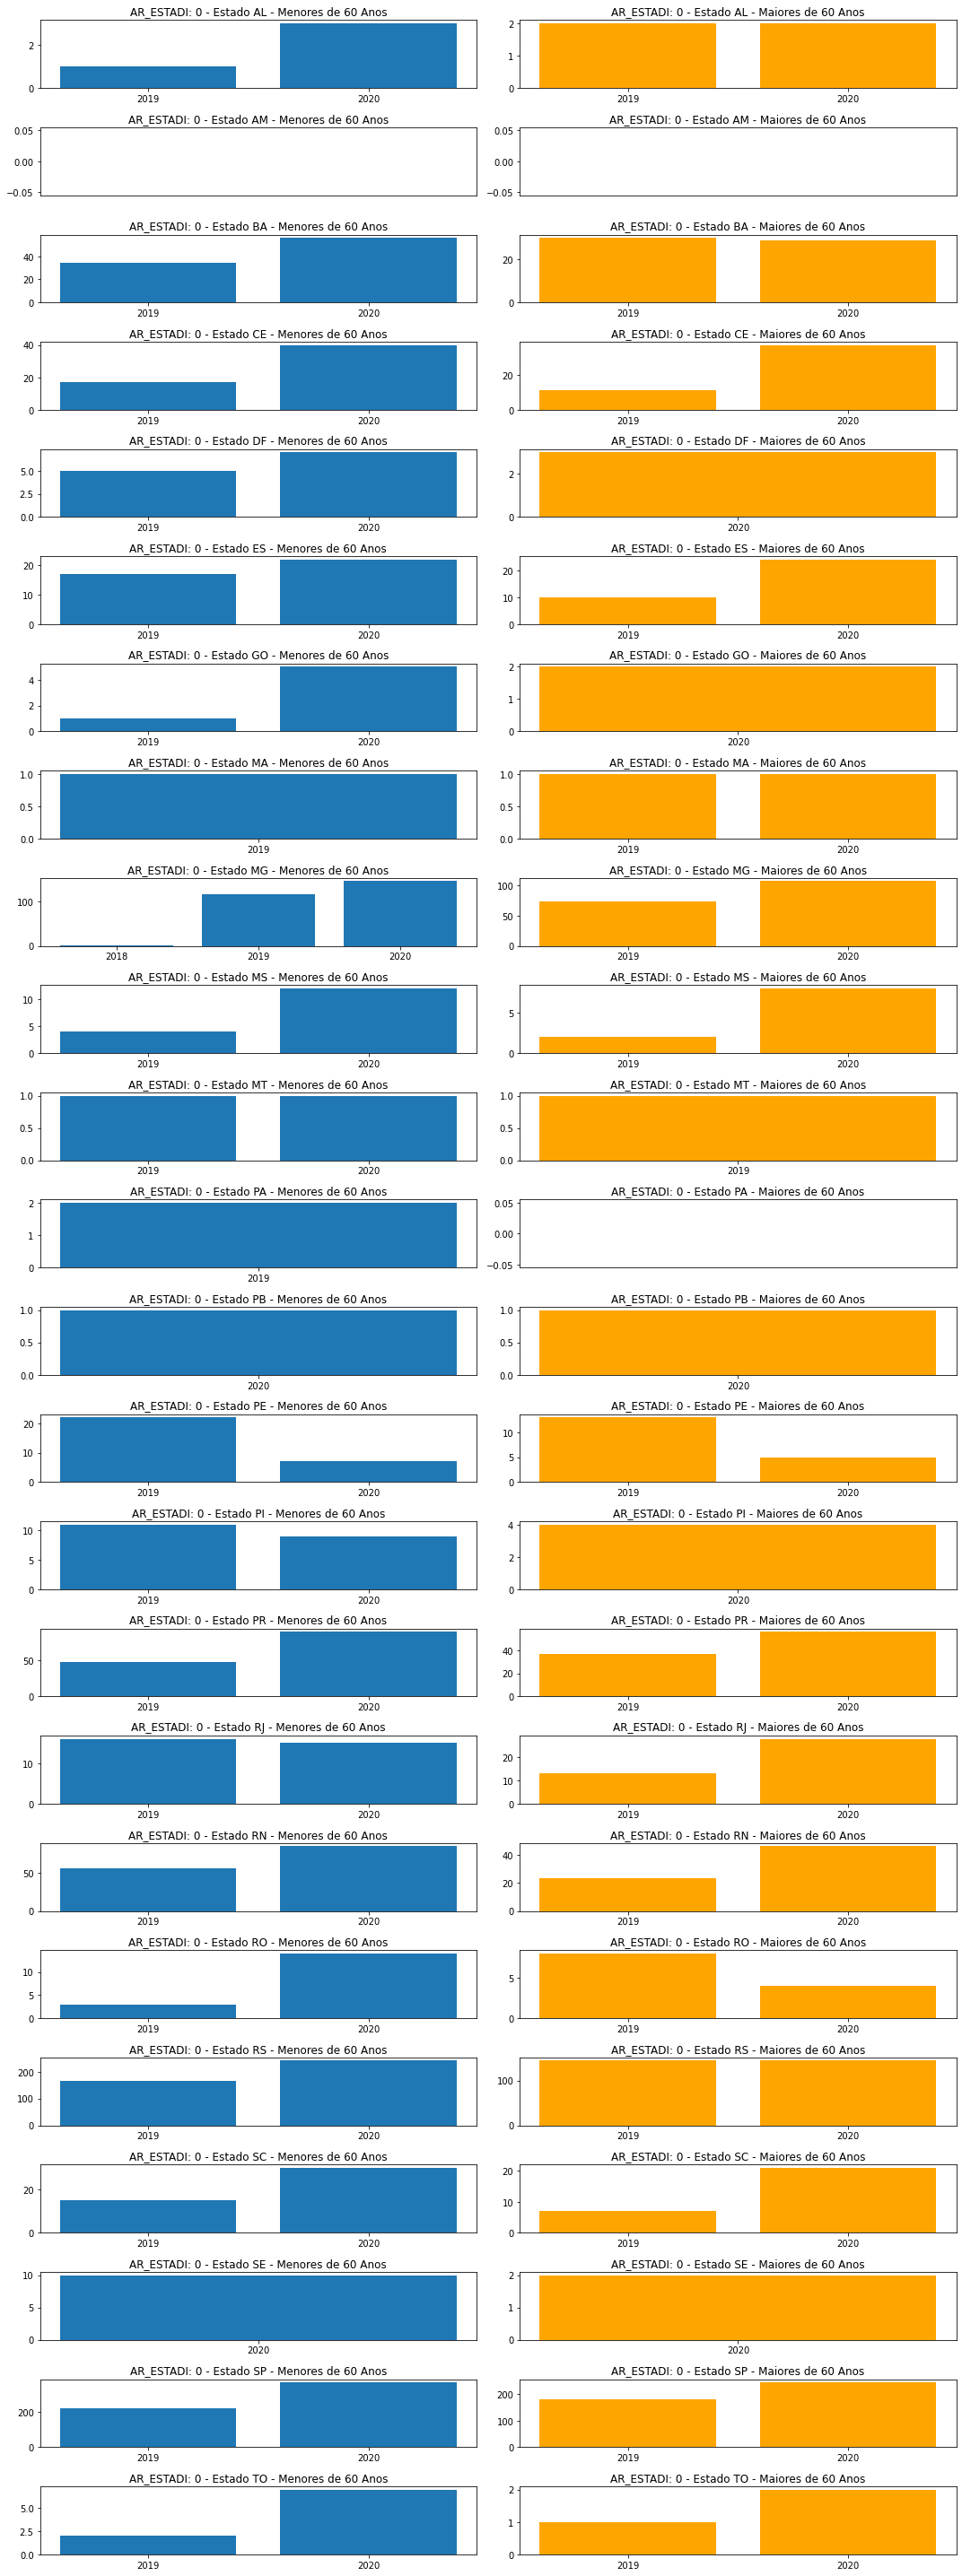

In [162]:
#AR_ESTADI=0
graficoEstadoPorAR_ESTADI(df_2, 0)

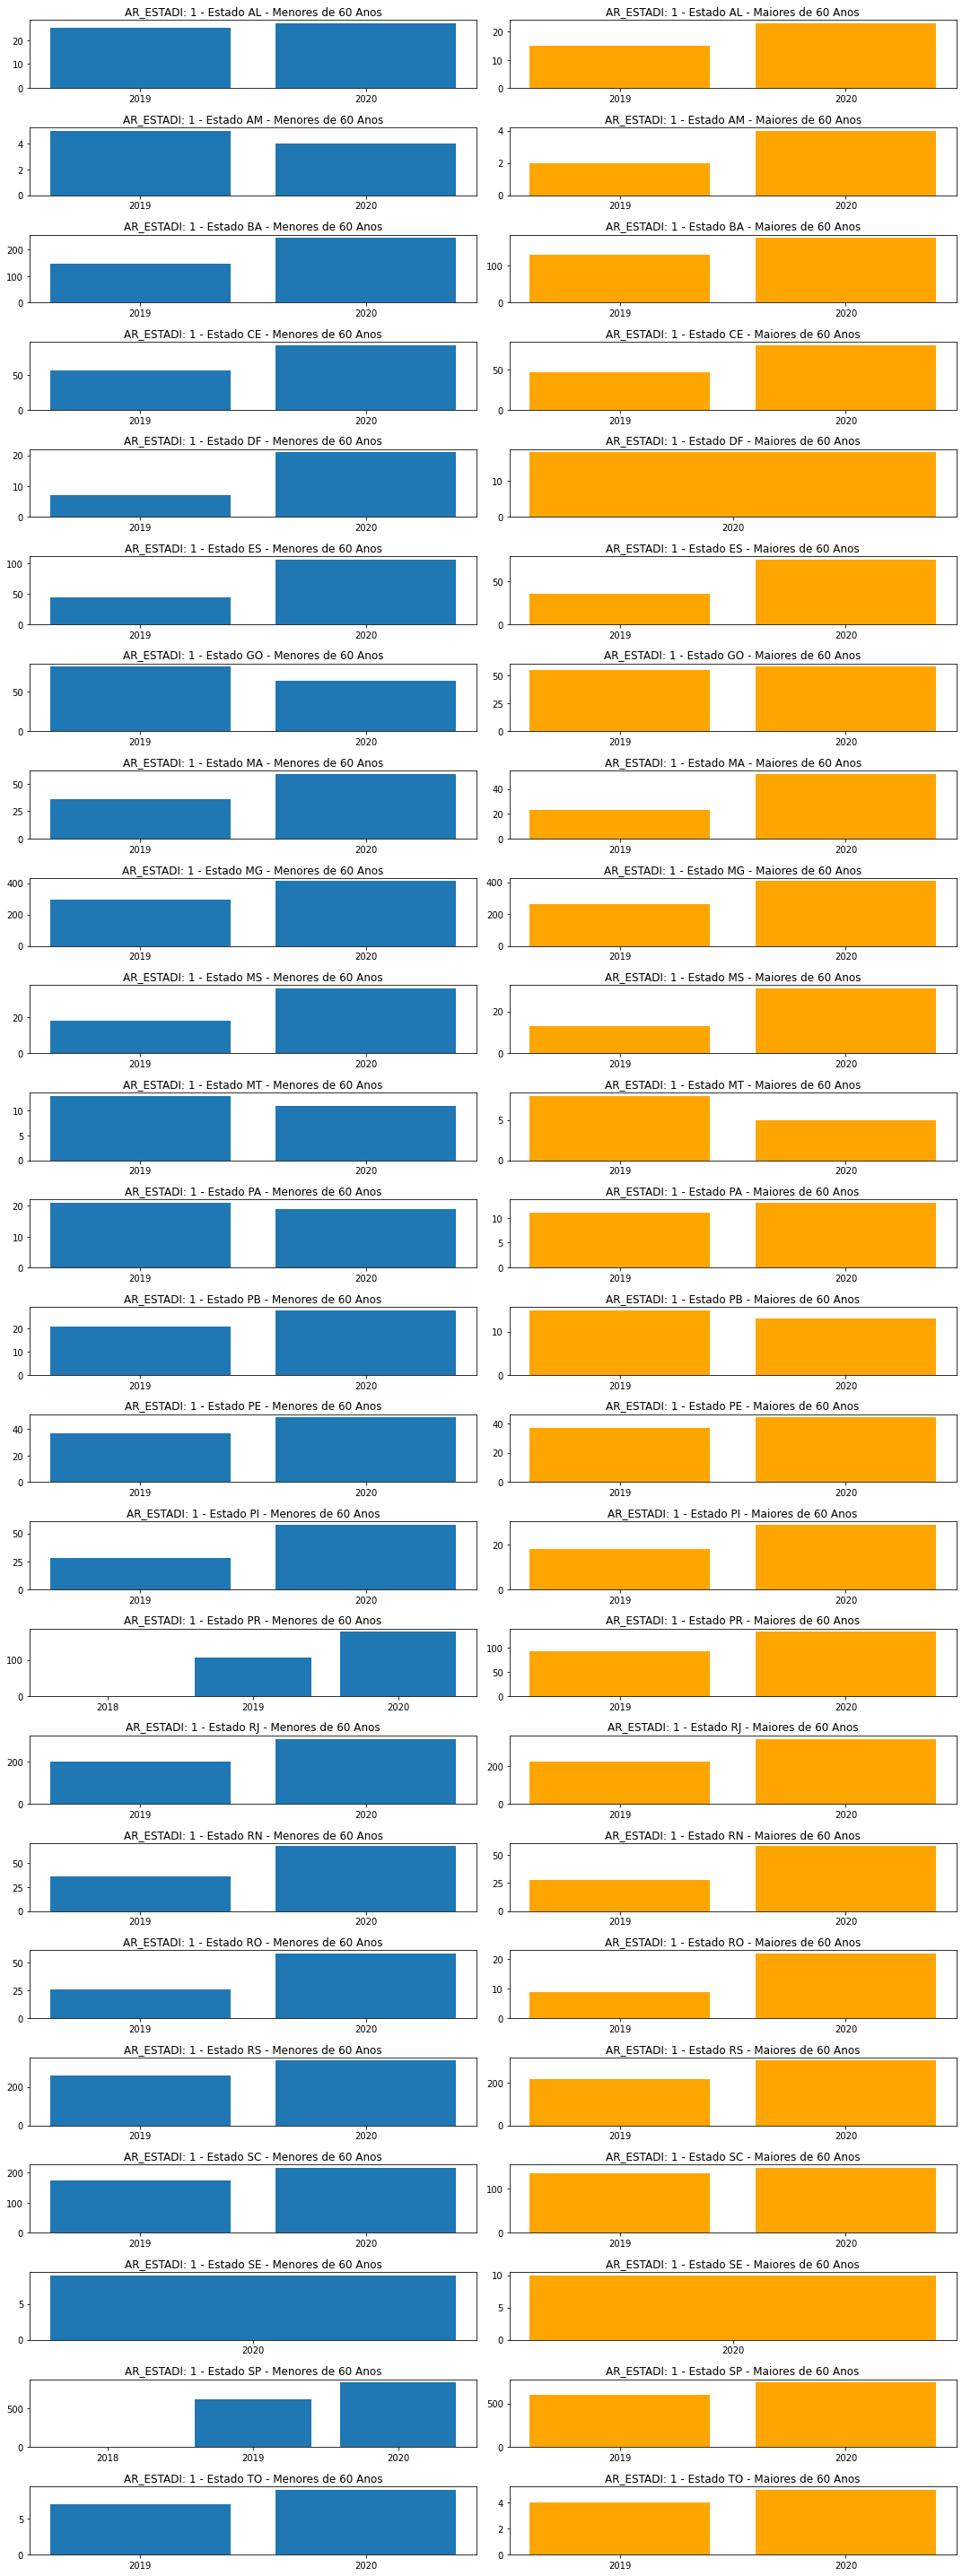

In [163]:
#AR_ESTADI=1
graficoEstadoPorAR_ESTADI(df_2, 1)

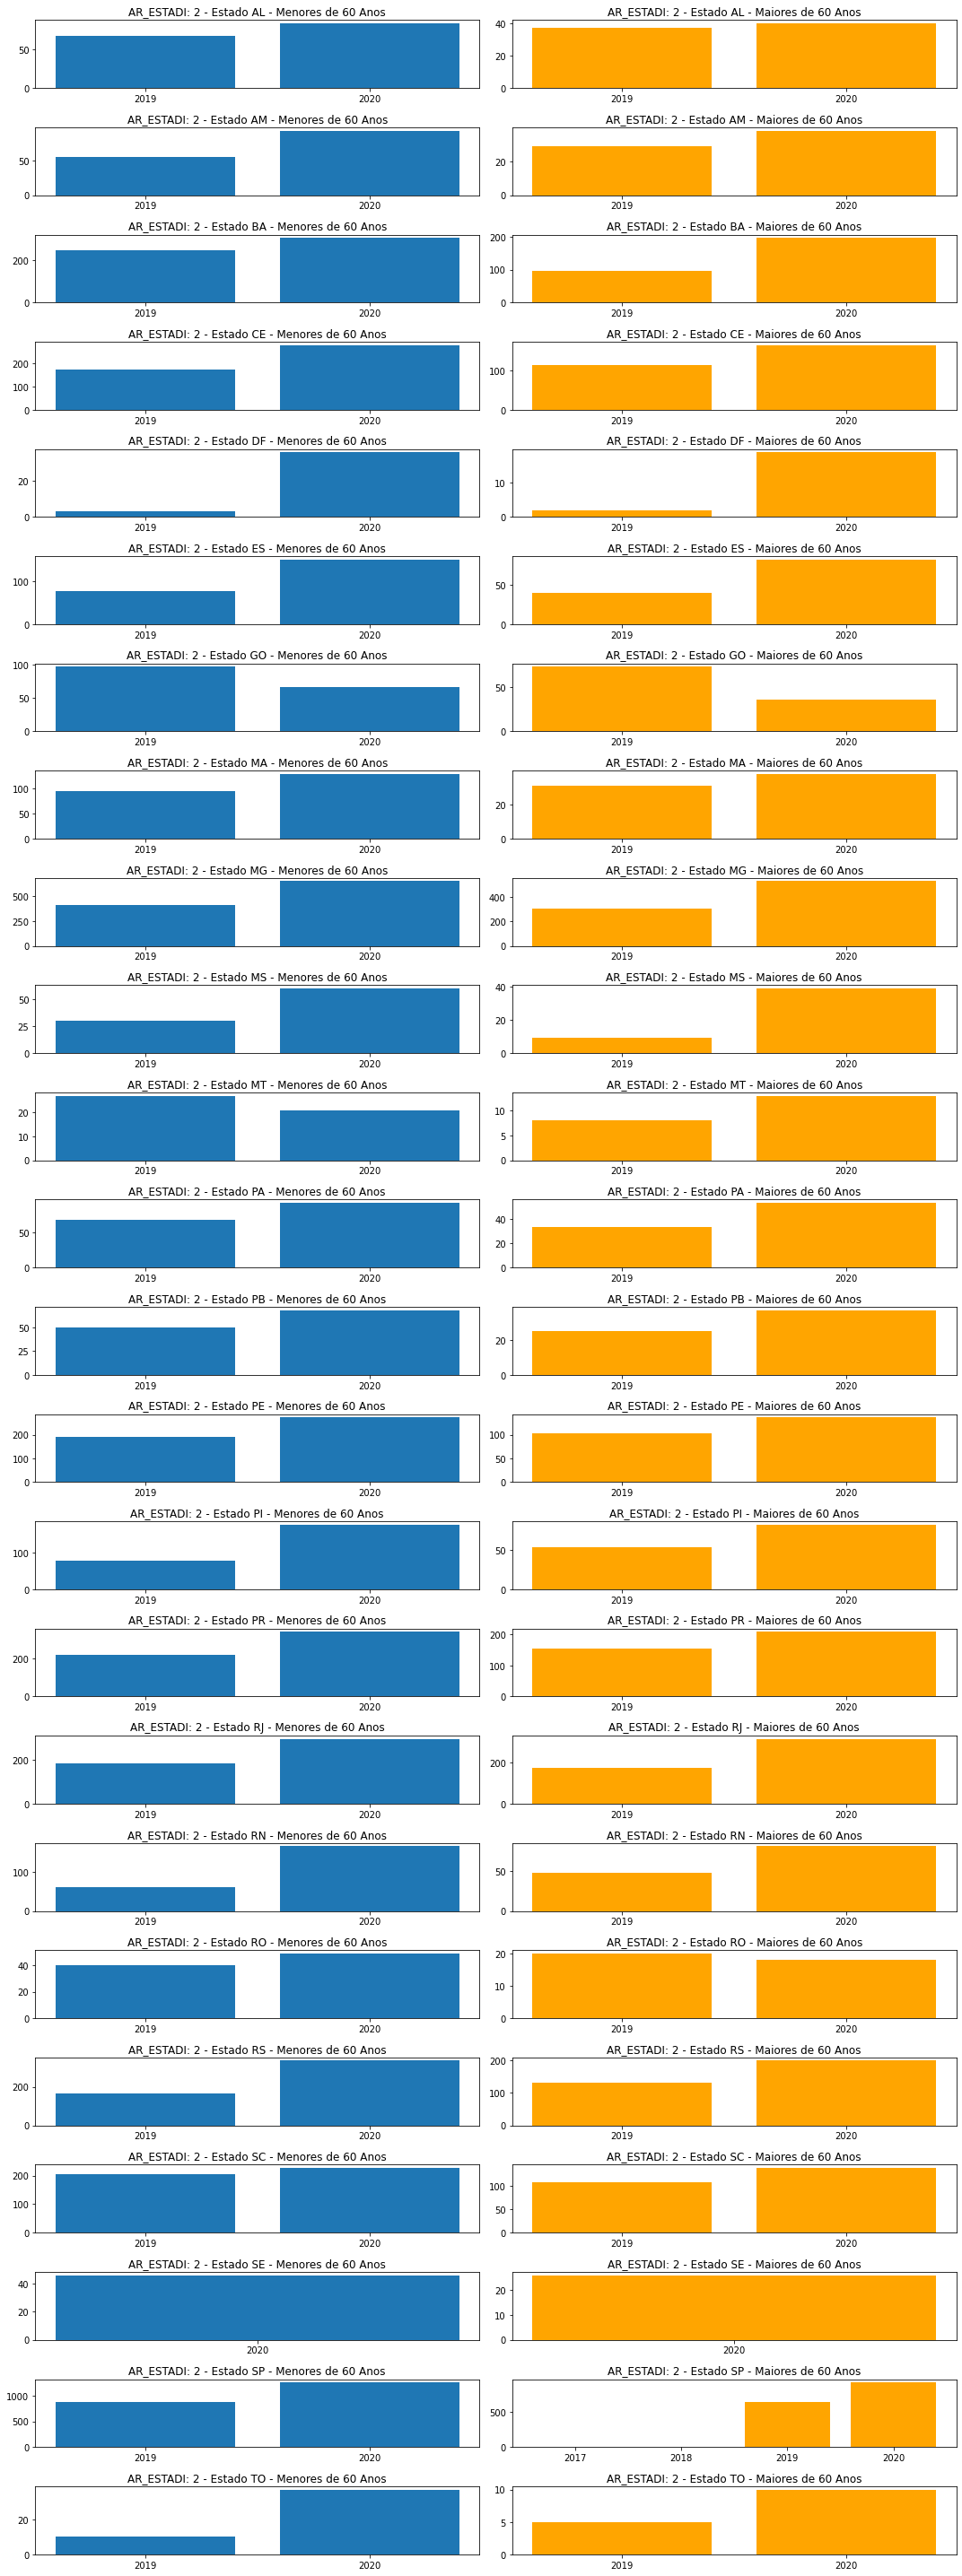

In [164]:
#AR_ESTADI=2
graficoEstadoPorAR_ESTADI(df_2, 2)

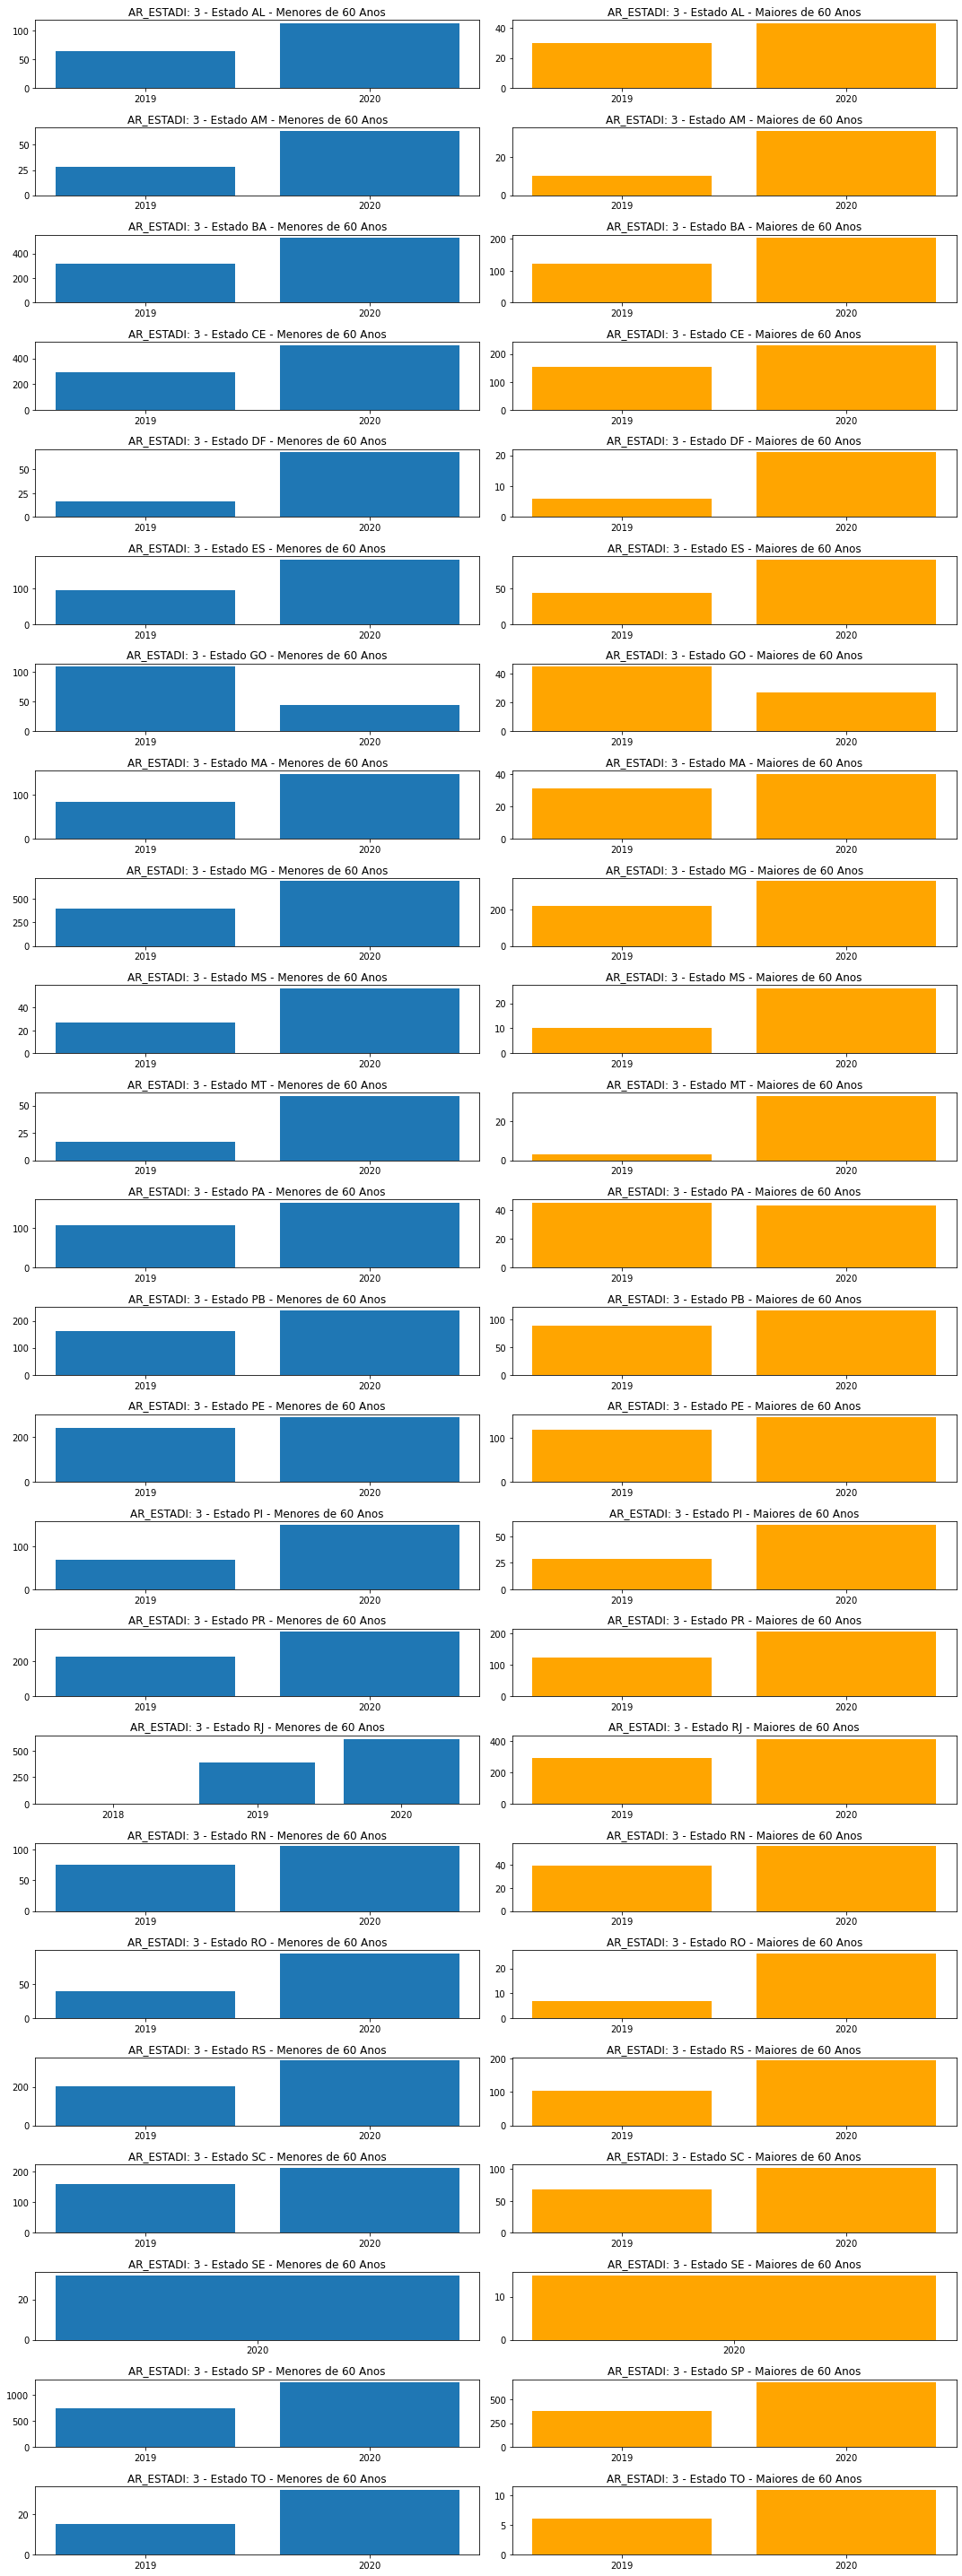

In [165]:
#AR_ESTADI=3
graficoEstadoPorAR_ESTADI(df_2, 3)

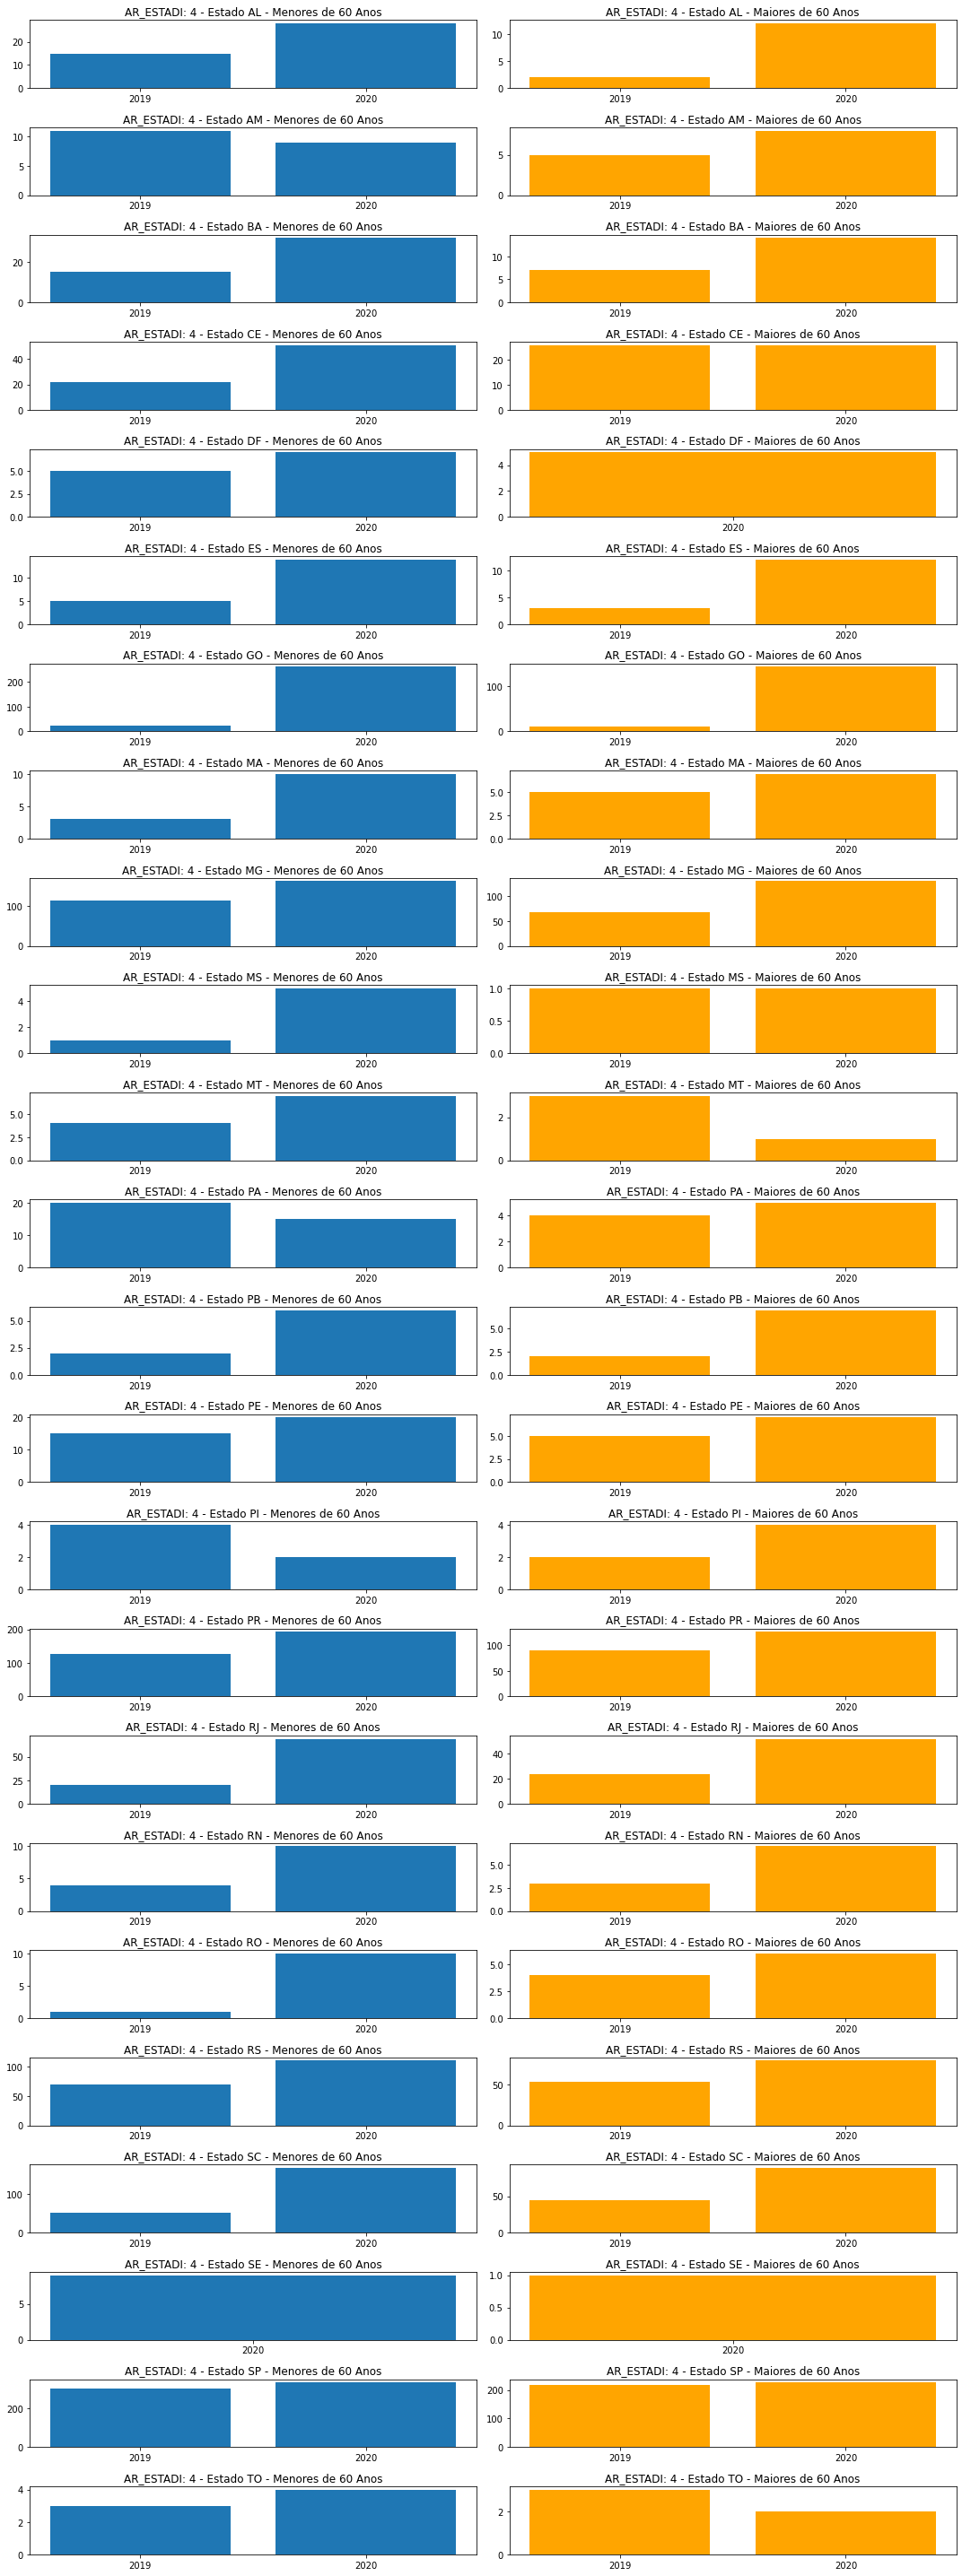

In [166]:
#AR_ESTADI=4
graficoEstadoPorAR_ESTADI(df_2, 4)

# Estado por AR_FINALI

In [167]:
#AR_FINALI - Finalidade Do Tratamento (1=RADICAL; 2=ADJUVANTE; 3=ANTIÁLGICA; 4=PALIATIVA; 5=PRÉVIA;6=ANTIHEMORRÁGICA)
def graficoEstadoPorAR_FINALI(df, finali):
  n_estados = df.ESTADO_UF.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(n_estados), ncols=2, figsize=(15,40))
  i = 0
  for uf in n_estados:
    
    filtroMenor60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 0)  & (df['AR_FINALI']== finali)
    x1 = df.ANO[filtroMenor60].sort_values(ascending=True).unique()
    y1 = df[filtroMenor60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][0].bar(x1, y1)
    axes[i][0].set_title('AR_FINALI: '+str(finali)+' - Estado '+str(uf)+' - Menores de 60 Anos')
    axes[i][0].set_xticks(x1)

    filtroMaior60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 1) & (df['AR_FINALI']== finali)
    x2 = df.ANO[filtroMaior60].sort_values(ascending=True).unique()
    y2 = df[filtroMaior60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][1].bar(x2, y2,color = "orange")
    axes[i][1].set_title('AR_FINALI: '+str(finali)+' - Estado '+str(uf)+' - Maiores de 60 Anos')
    axes[i][1].set_xticks(x2)
    i=i+1
  fig.tight_layout()

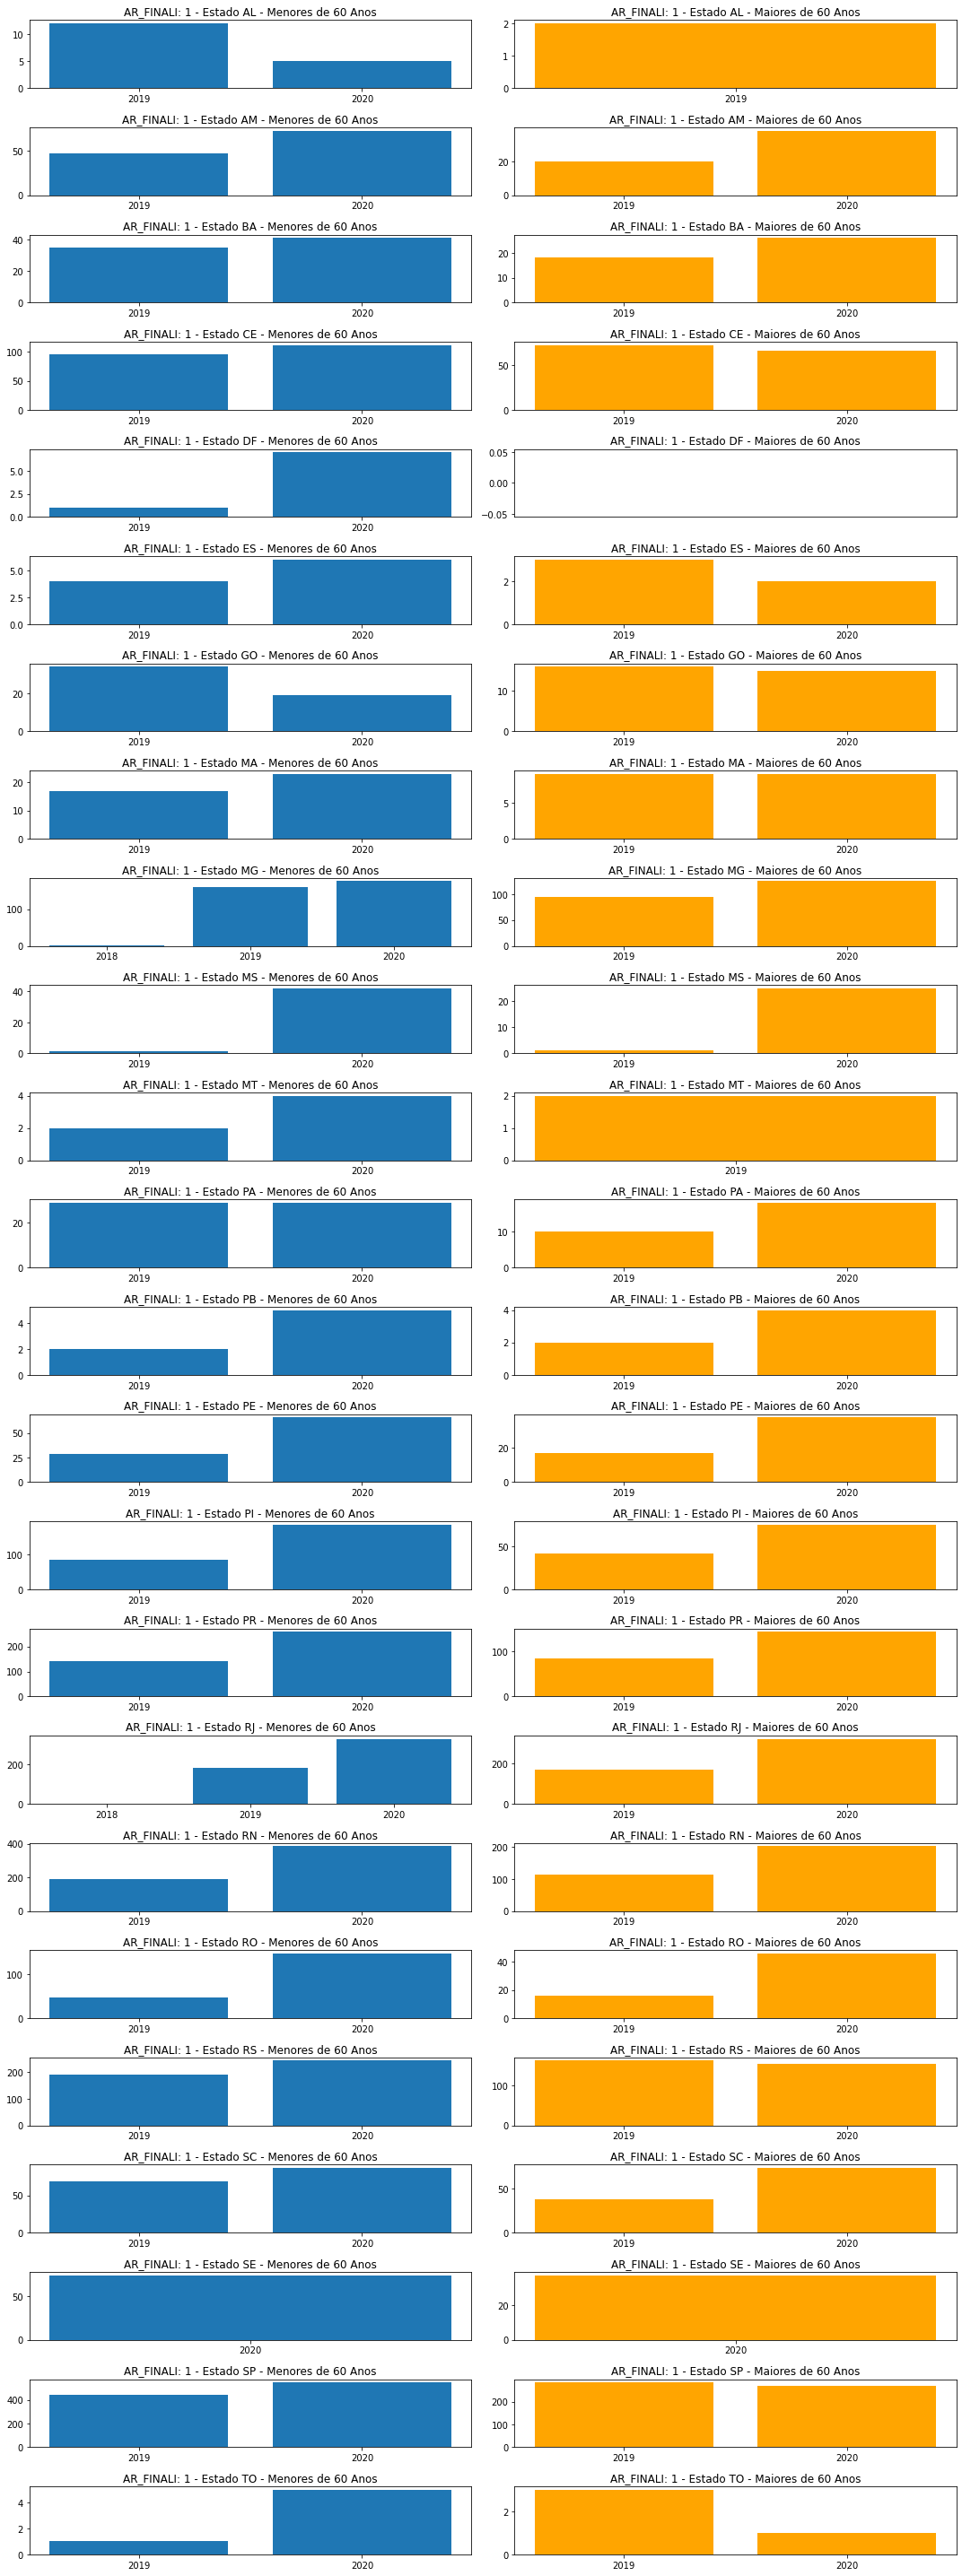

In [168]:
#AP_FINALI = 1
graficoEstadoPorAR_FINALI(df_2, 1)


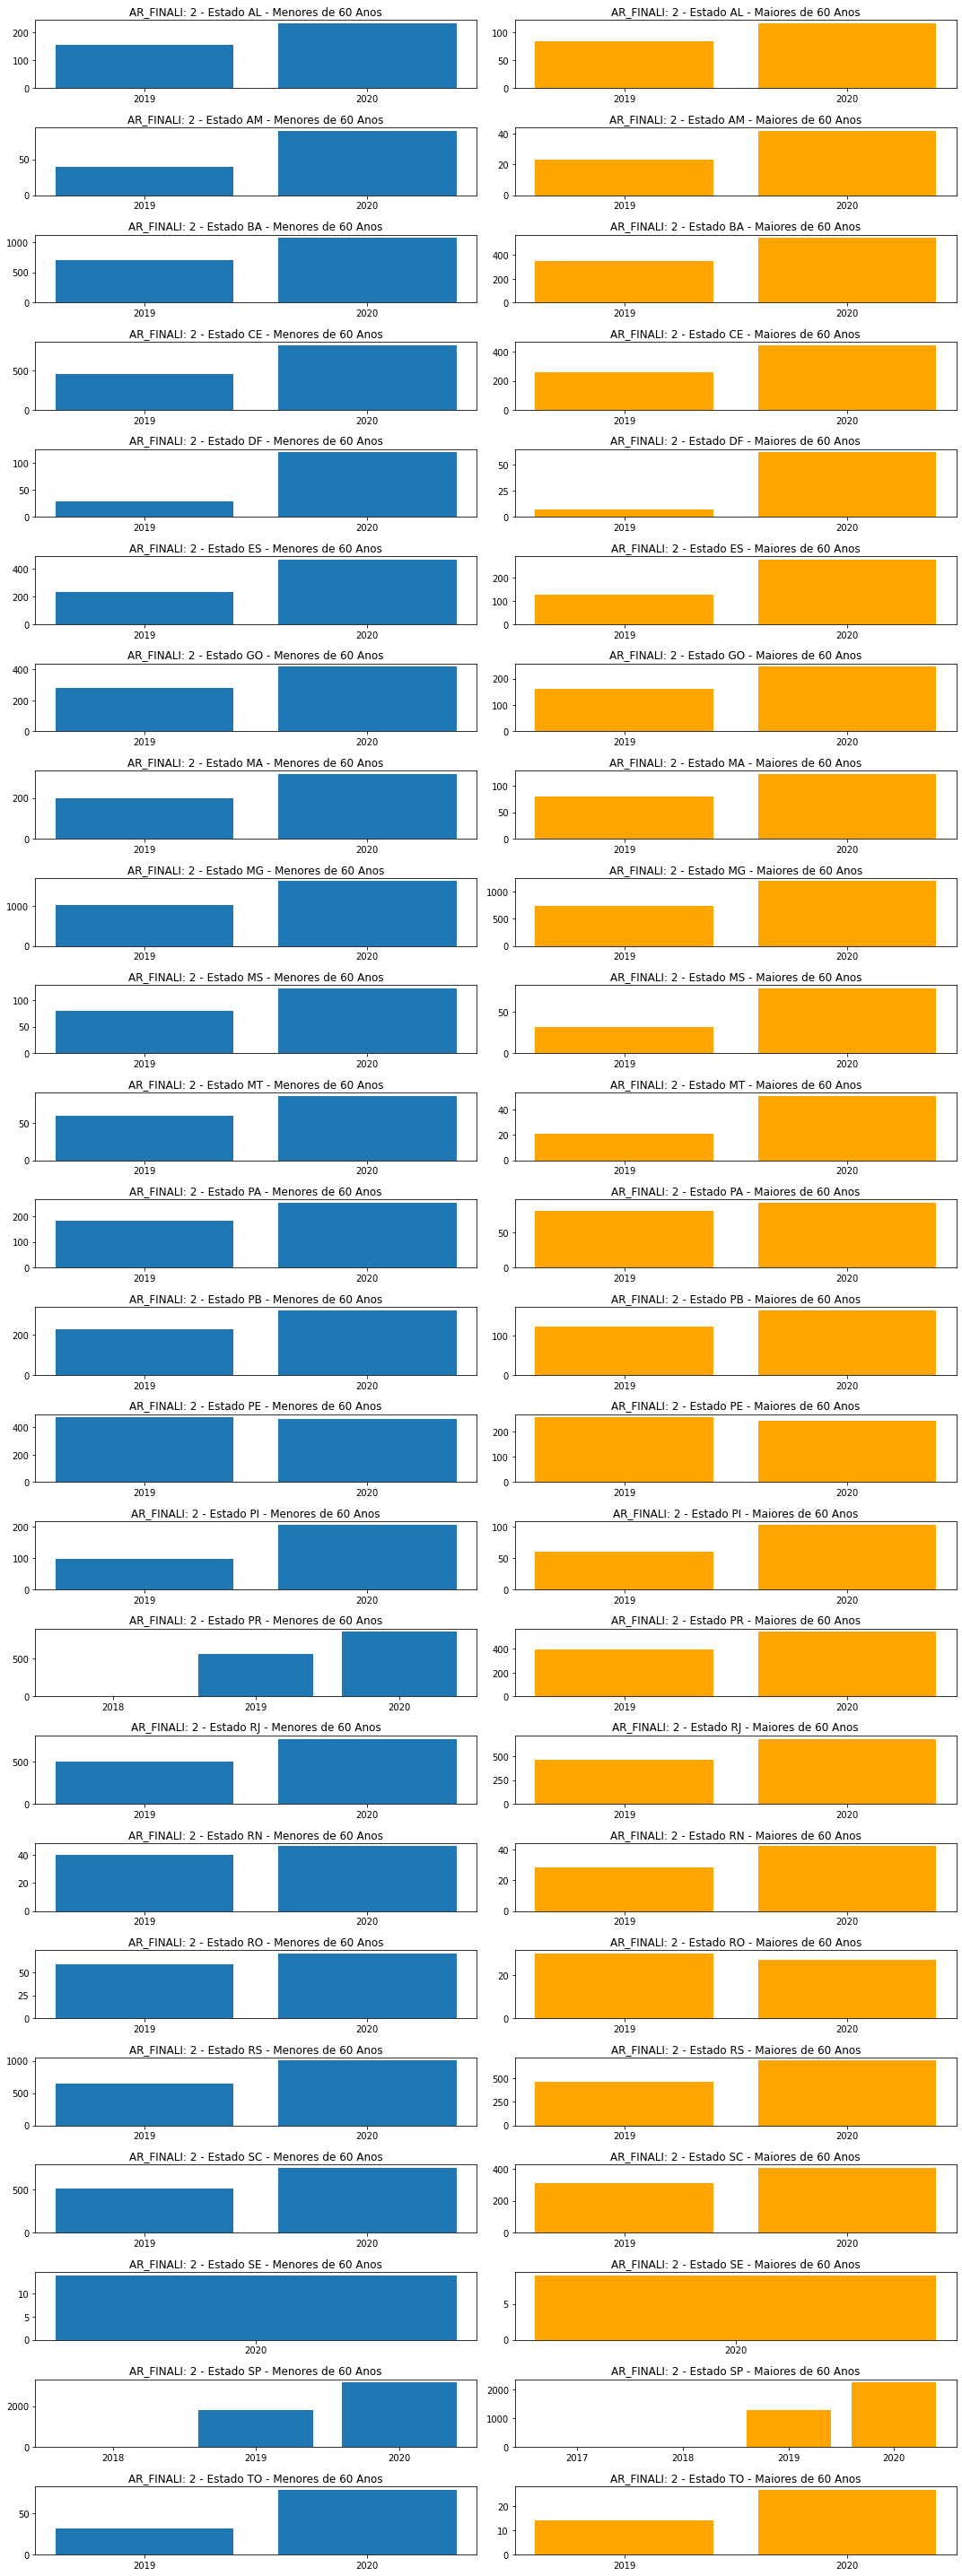

In [169]:
#AP_FINALI = 2
graficoEstadoPorAR_FINALI(df_2, 2)


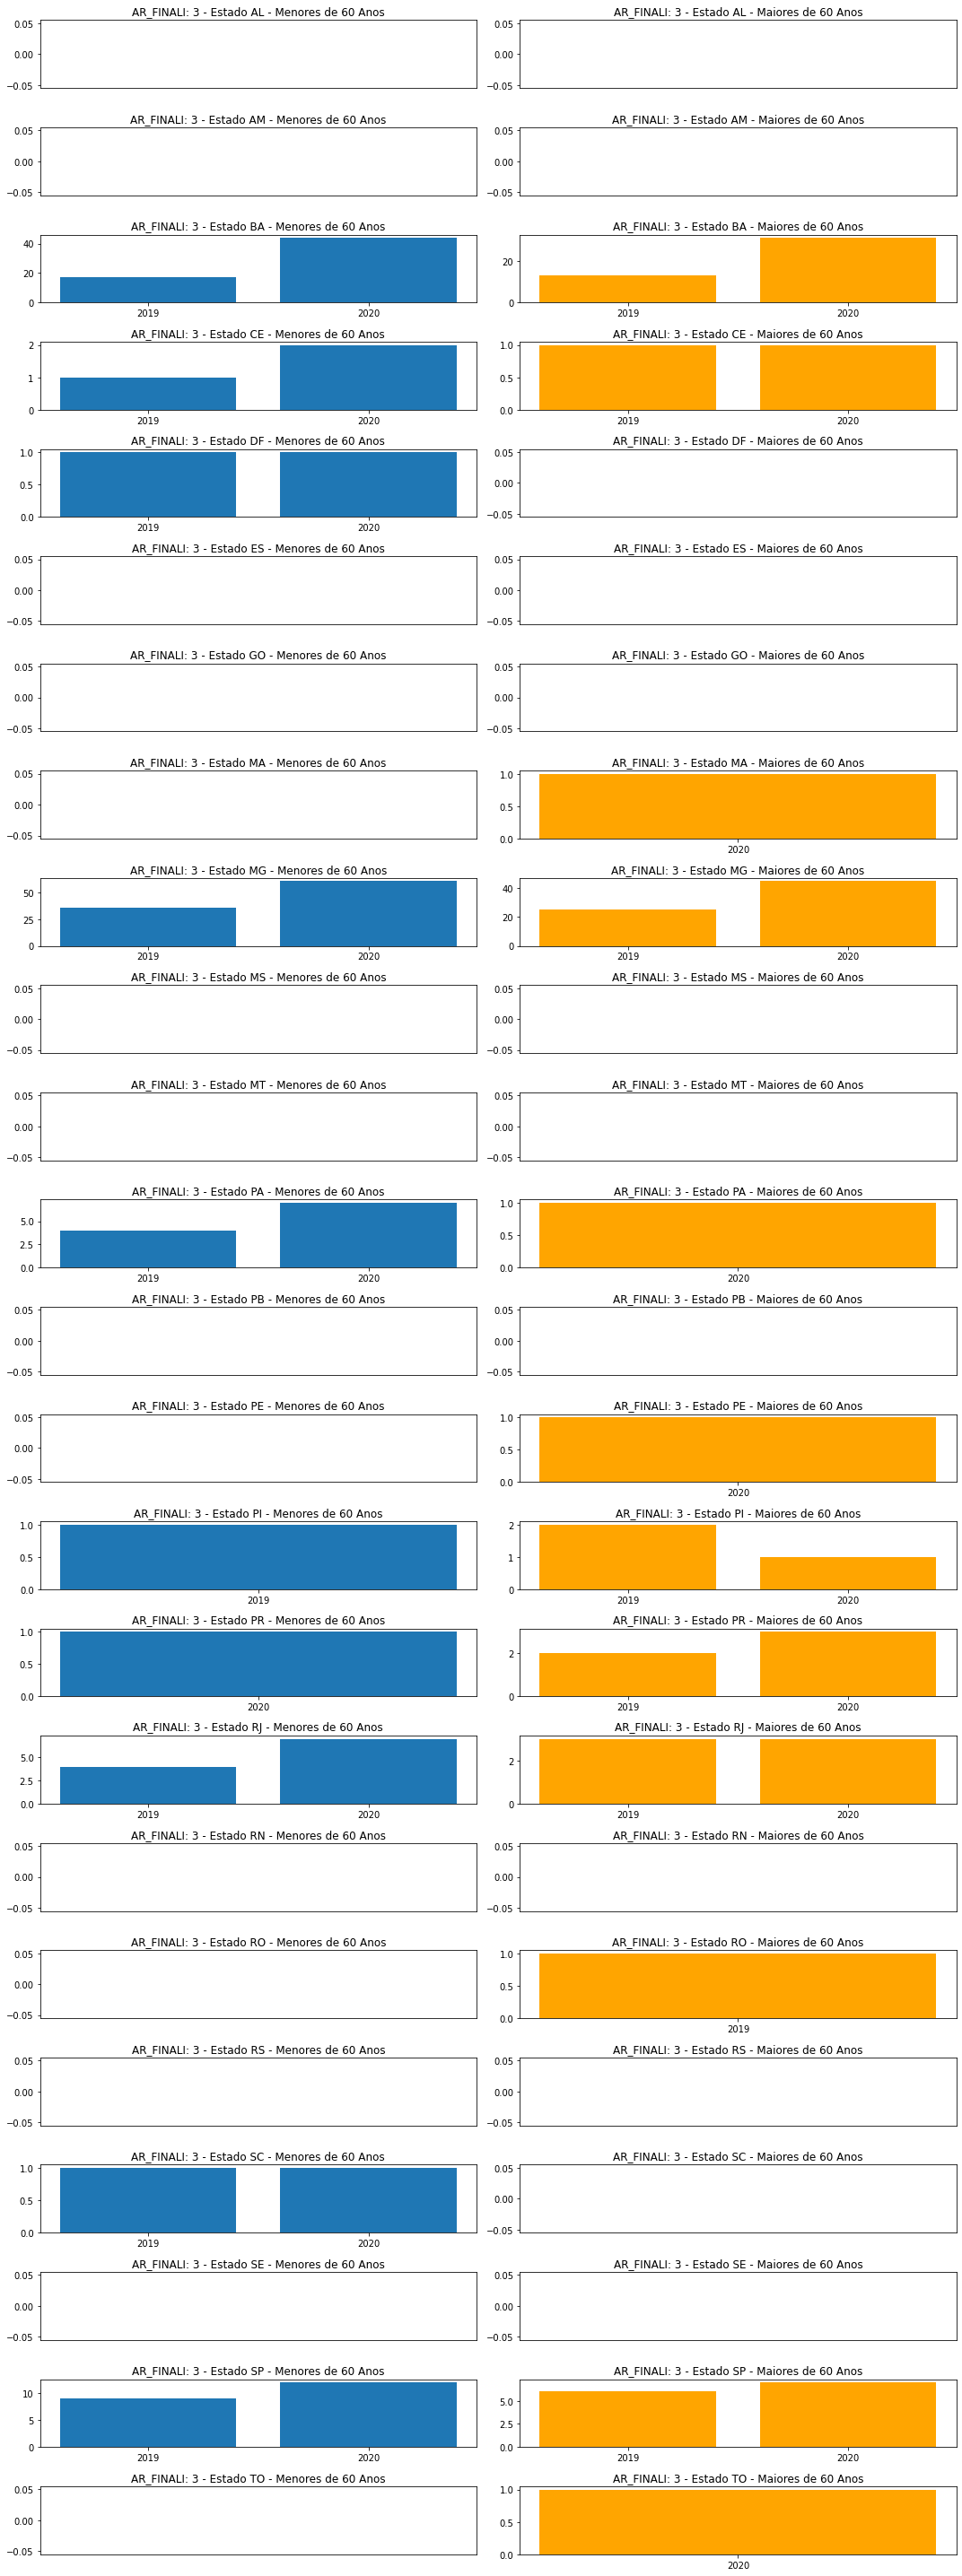

In [170]:
#AP_FINALI = 3
graficoEstadoPorAR_FINALI(df_2, 3)


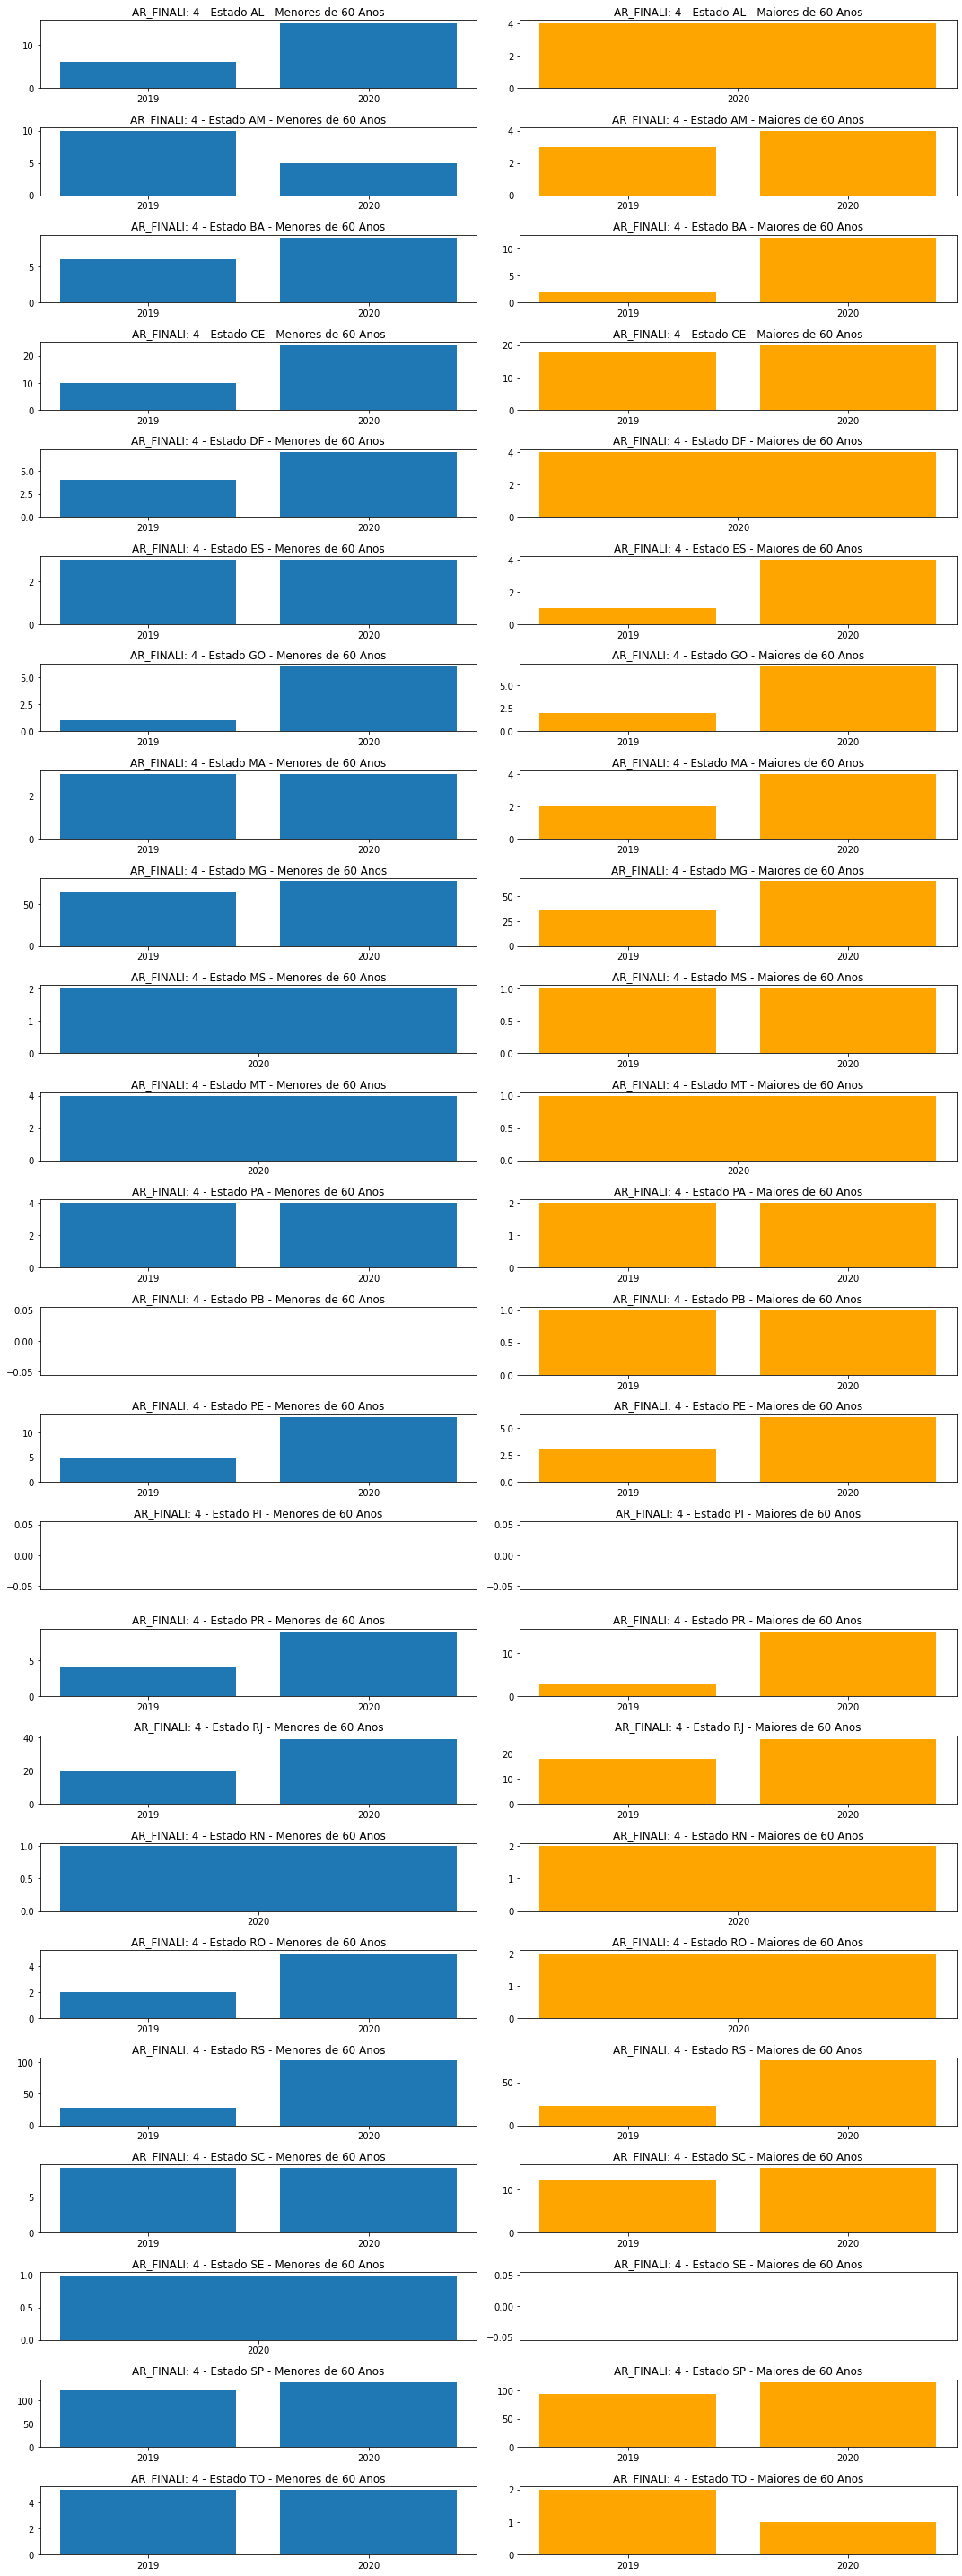

In [171]:
#AP_FINALI = 4
graficoEstadoPorAR_FINALI(df_2, 4)


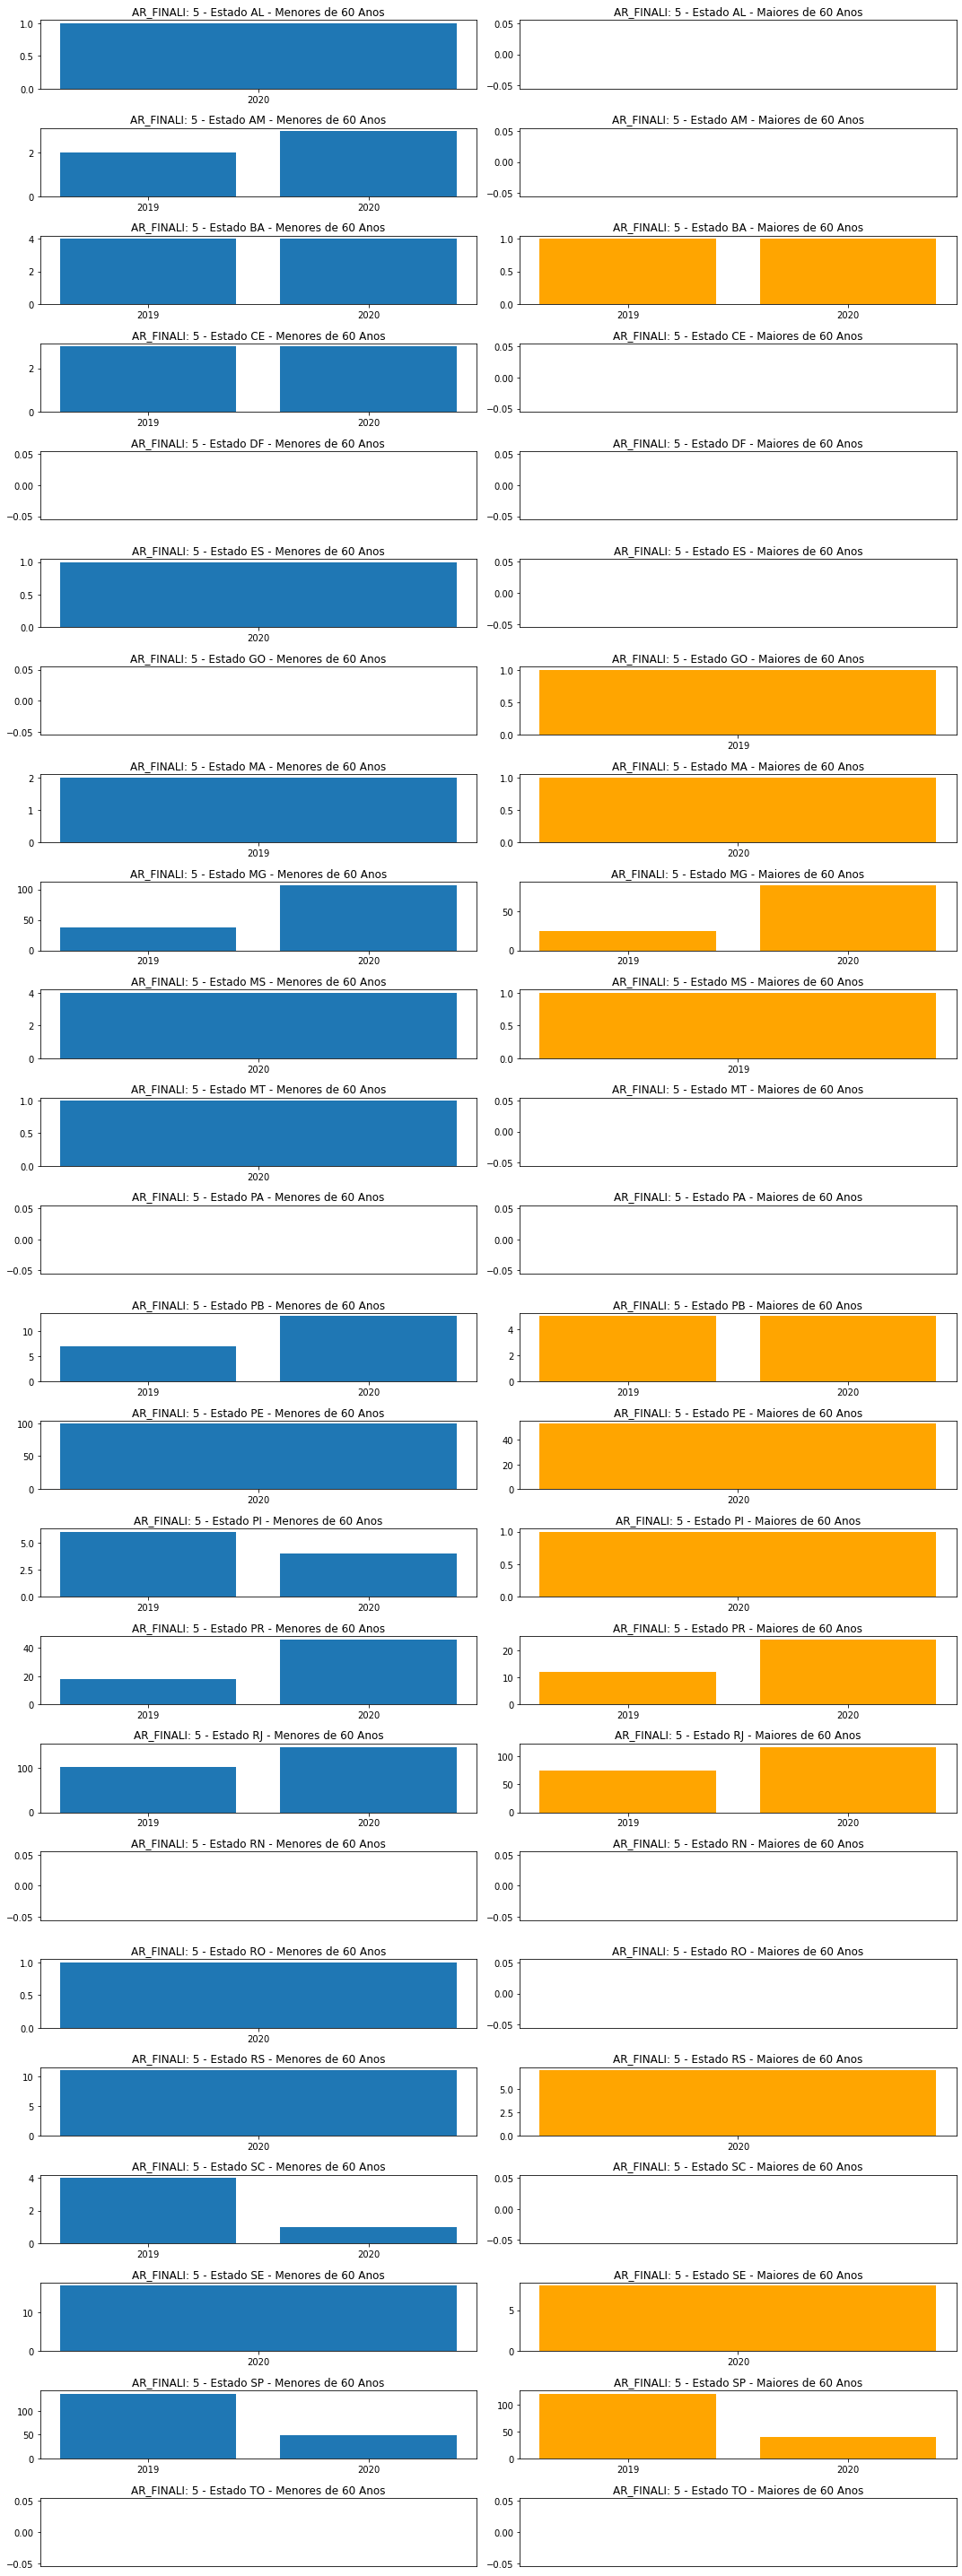

In [172]:
#AP_FINALI = 5
graficoEstadoPorAR_FINALI(df_2, 5)


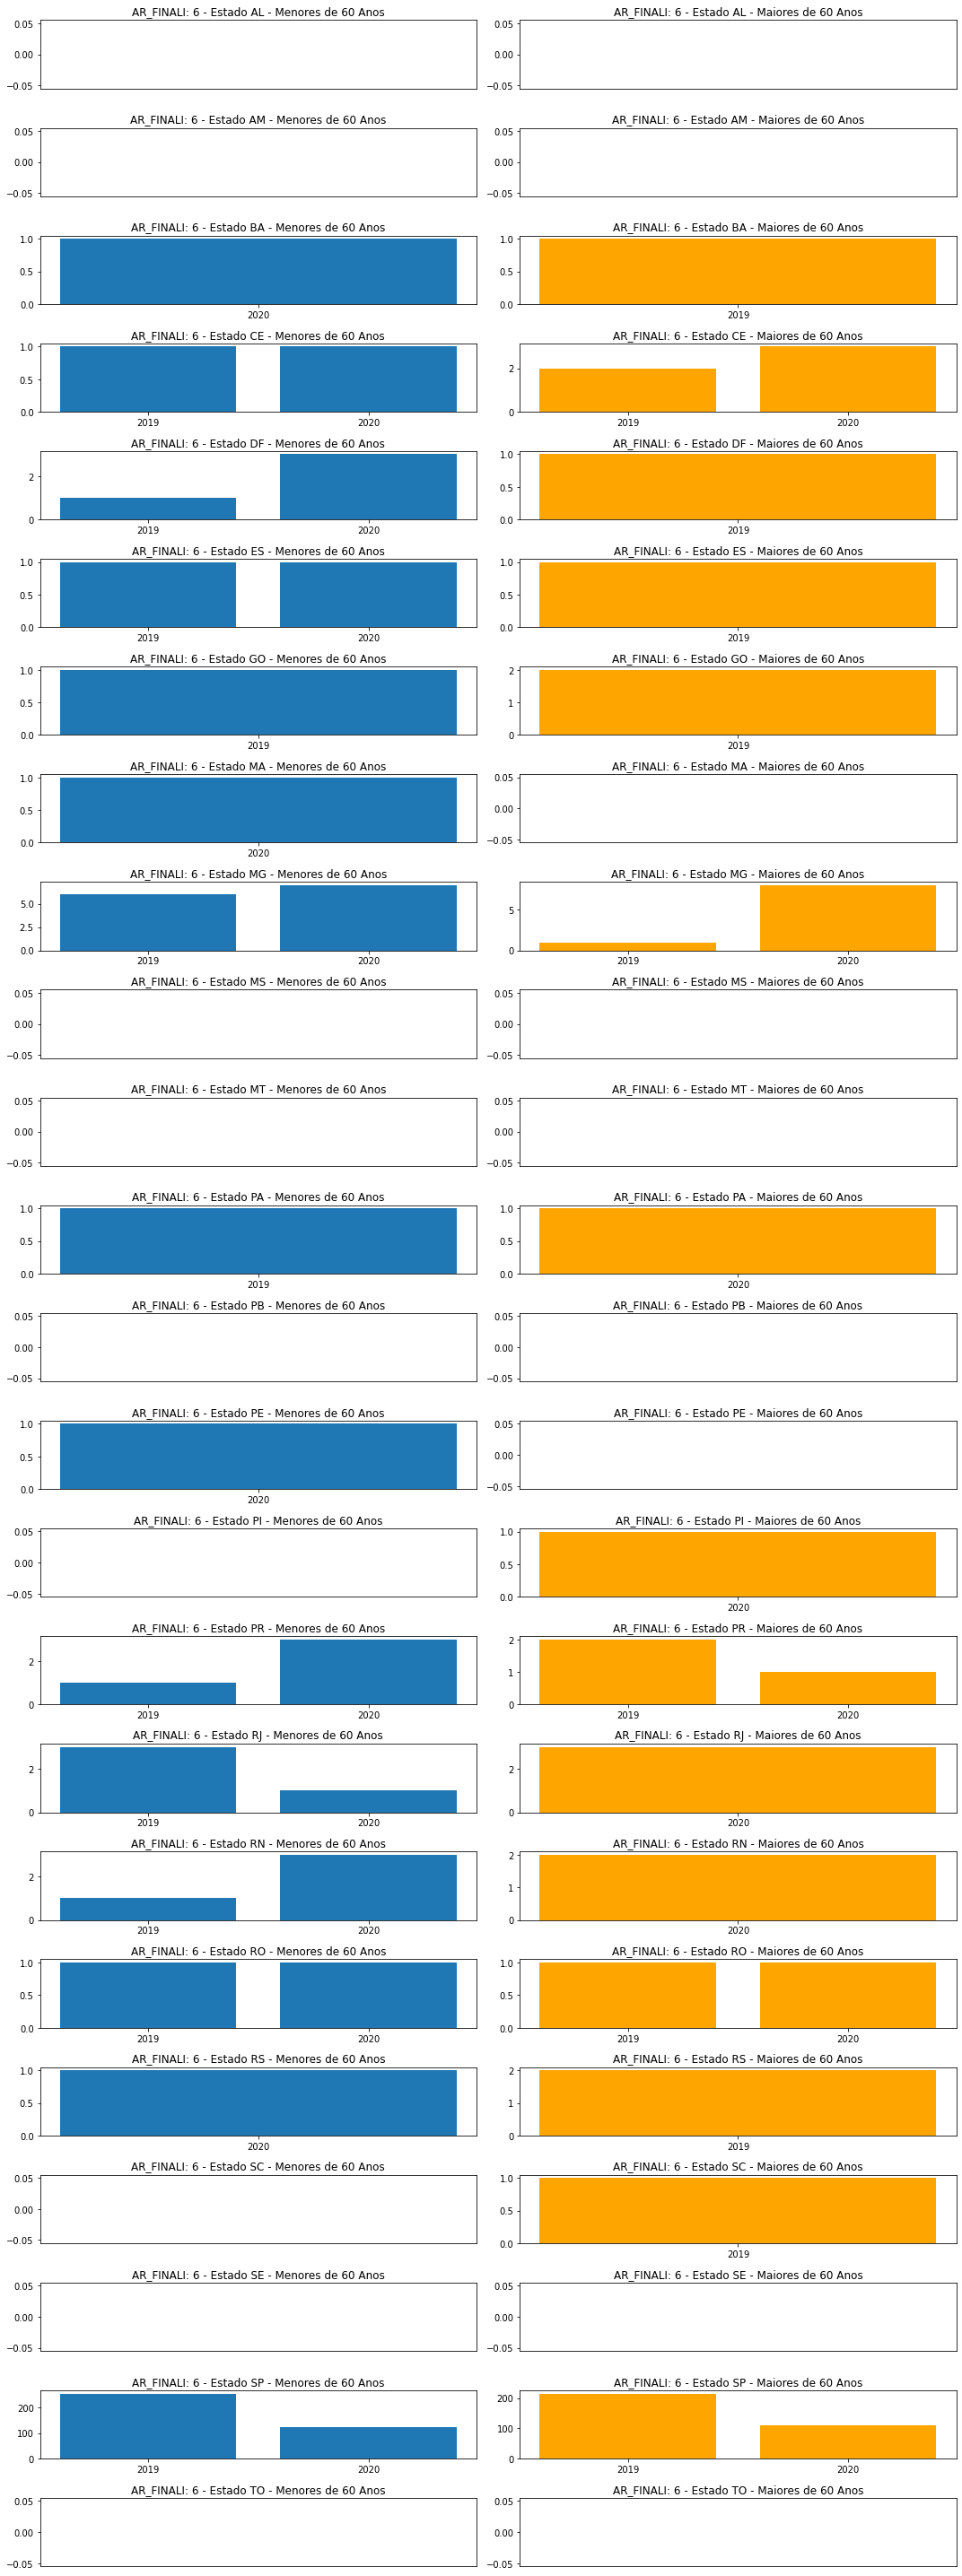

In [173]:
#AP_FINALI = 6
graficoEstadoPorAR_FINALI(df_2, 6)


# Por Datas

In [109]:
df_2["DTSOLIC_2"] = df_2["DTSOLIC_2"].astype("datetime64")

Todos os Dados por mês

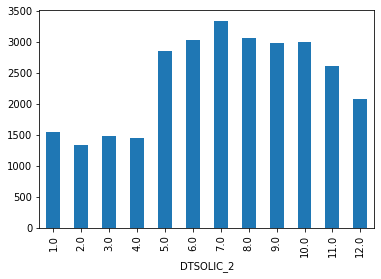

In [110]:
# Todos os Dados por mês
df_2.groupby([df_2["DTSOLIC_2"][(df_2["MAIOR_60"]==0)].dt.month])['DTSOLIC_2'].count().plot(kind='bar')

Todos do dados por meses e por maior e menor que 60 anos

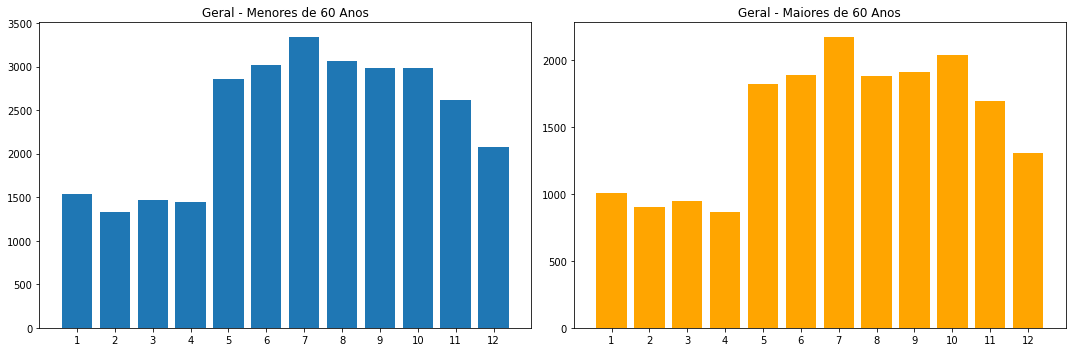

In [174]:
# Todos do dados por meses e por maior e menor que 60 anos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

filtroMenor60 =  (df_2['MAIOR_60']== 0) 
df_datas1 = df_2['DTSOLIC_2'].groupby([df_2["DTSOLIC_2"][filtroMenor60].dt.month]).count()
x1 = df_datas1.index
y1 = df_datas1
axes[0].bar(x1, y1)
axes[0].set_title('Geral - Menores de 60 Anos')
axes[0].set_xticks(x1)
filtroMaior60 = (df_2['MAIOR_60']== 1) 
df_datas2 = df_2['DTSOLIC_2'].groupby([df_2["DTSOLIC_2"][filtroMaior60].dt.month]).count()
x2 = df_datas2.index
y2 = df_datas2
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('Geral - Maiores de 60 Anos')
axes[1].set_xticks(x2)
i=i+1
fig.tight_layout()

# Por anos e por idade maior e menor que 60 anos

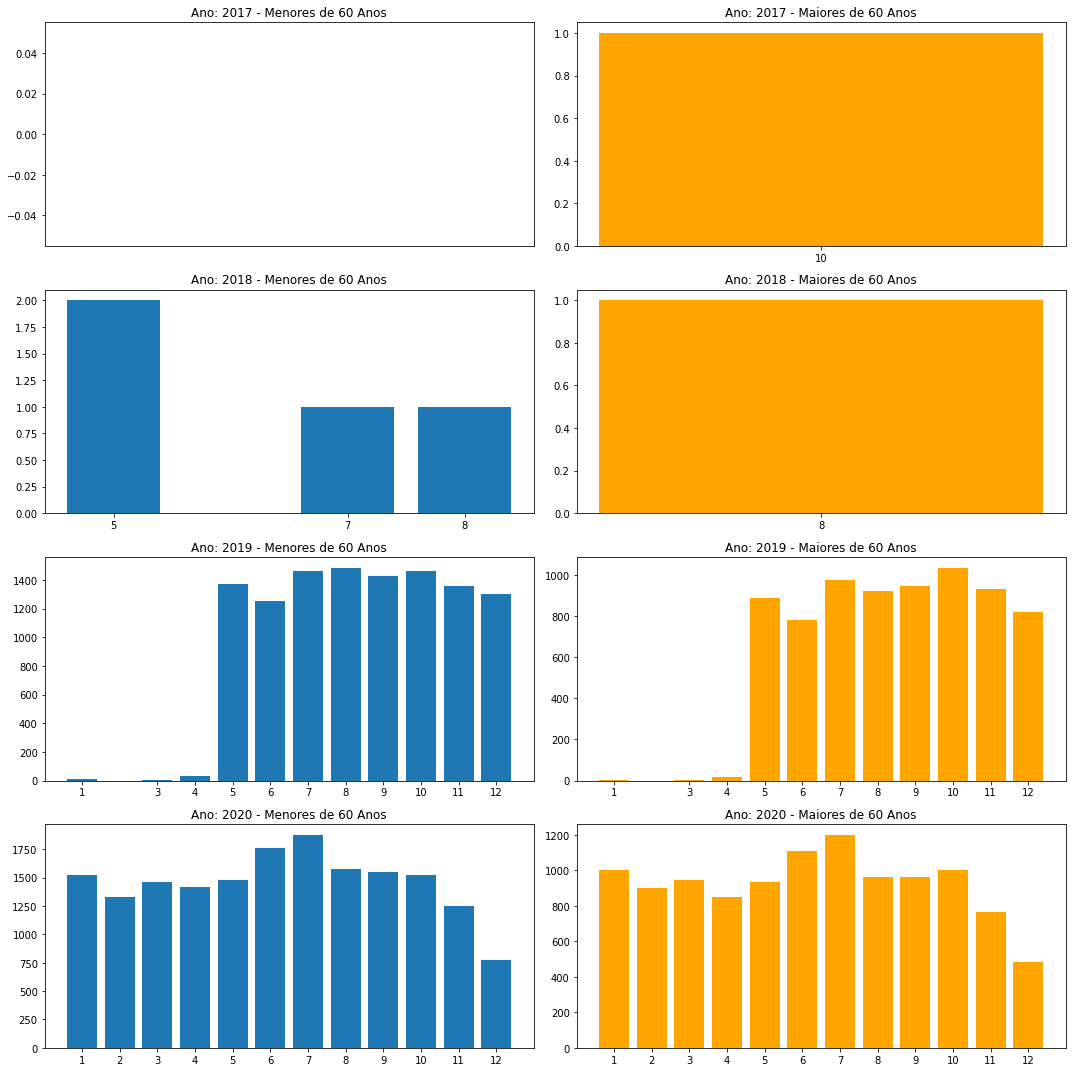

In [175]:
# Por anos e por idade maior e menor que 60 anos
anos = df_2.ANO.sort_values().unique()
fig, axes = plt.subplots(nrows=len(anos), ncols=2, figsize=(15,15))
i = 0
for ano in anos:  
  filtroMenor60 =  (df_2['MAIOR_60']== 0) & (df_2['ANO']==ano)
  df_datas1 = df_2['DTSOLIC_2'].groupby([df_2["DTSOLIC_2"][filtroMenor60].dt.month]).count()
  x1 = df_datas1.index
  y1 = df_datas1
  axes[i][0].bar(x1, y1)
  axes[i][0].set_xticks(x1)
  axes[i][0].set_title('Ano: '+str(ano)+' - Menores de 60 Anos')

  filtroMaior60 = (df_2['MAIOR_60']== 1) & (df_2['ANO']==ano) 
  df_datas2 = df_2['DTSOLIC_2'].groupby([df_2["DTSOLIC_2"][filtroMaior60].dt.month]).count()
  x2 = df_datas2.index
  y2 = df_datas2
  axes[i][1].bar(x2, y2,color = "orange")
  axes[i][1].set_xticks(x2)
  axes[i][1].set_title('Ano: '+str(ano)+' - Maiores de 60 Anos')
  i=i+1
fig.tight_layout()

# Por Estado e por Ano

In [176]:
def graficoEstadoPorData(df, uf):
  anos = df.ANO.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(anos), ncols=2, figsize=(15,15))
  i = 0
  for ano in anos:  
    filtroMenor60 =  (df['MAIOR_60']== 0) & (df['ANO']==ano) & (df["ESTADO_UF"]==uf)
    df_datas1 = df['DTSOLIC_2'].groupby([df["DTSOLIC_2"][filtroMenor60].dt.month]).count()
    x1 = df_datas1.index
    y1 = df_datas1
    axes[i][0].bar(x1, y1)
    axes[i][0].set_title('Estado: '+str(uf)+'| Ano: '+str(ano)+' - Menores de 60 Anos')
    axes[i][0].set_xticks(x1)

    filtroMaior60 = (df['MAIOR_60']== 1) & (df['ANO']==ano)  & (df["ESTADO_UF"]==uf)
    df_datas2 = df['DTSOLIC_2'].groupby([df["DTSOLIC_2"][filtroMaior60].dt.month]).count()
    x2 = df_datas2.index
    y2 = df_datas2
    axes[i][1].bar(x2, y2,color = "orange")
    axes[i][1].set_title('Estado: '+str(uf)+' | Ano: '+str(ano)+' - Maiores de 60 Anos')
    axes[i][1].set_xticks(x2)
    i=i+1
  fig.tight_layout()

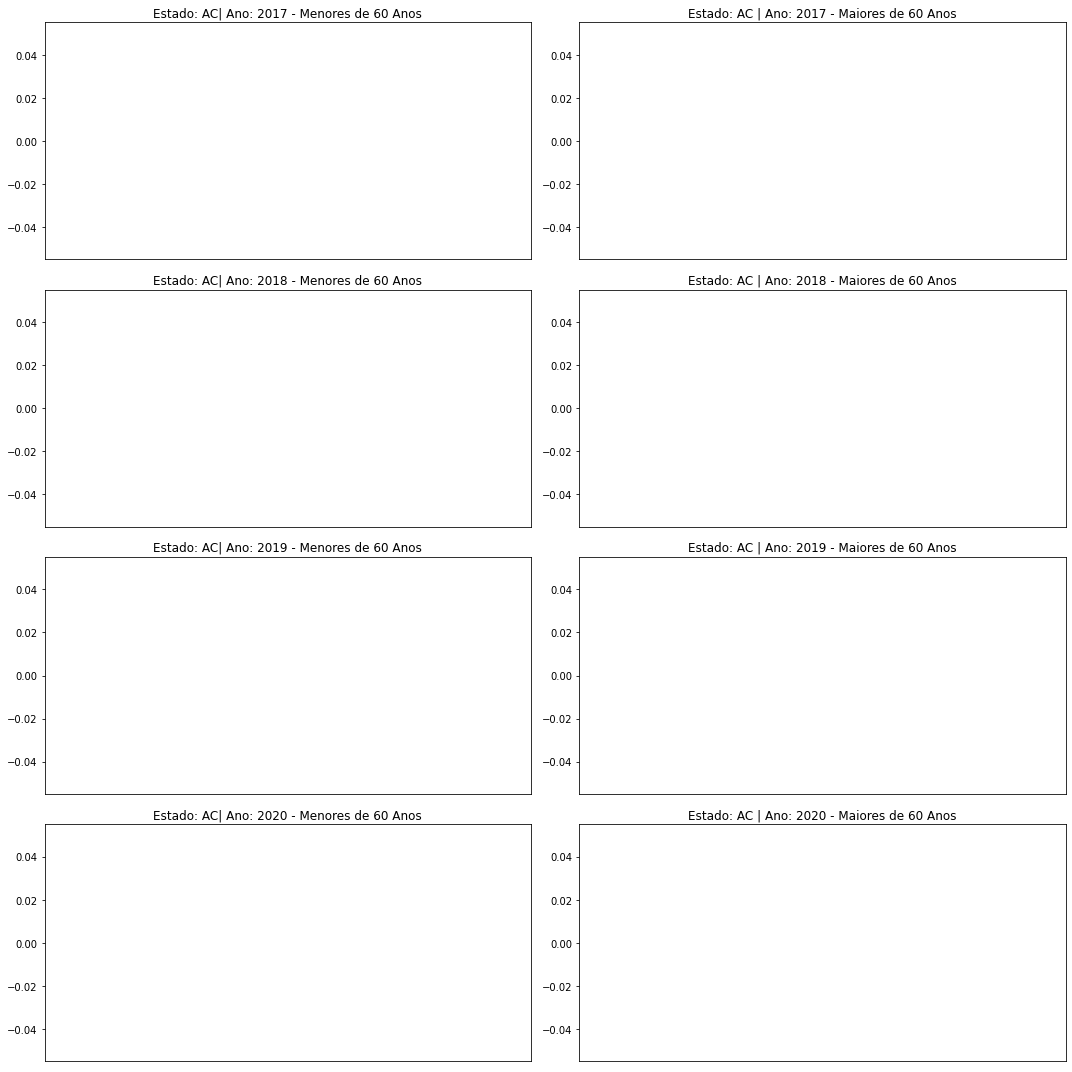

In [177]:
graficoEstadoPorData(df_2, 'AC')

In [178]:
print(df_2.DTSOLIC_2[(df_2["ESTADO_UF"]=='AC')& (df_2["ANO"]=='2018')].unique())
print(df_2.DTSOLIC_2[(df_2["ESTADO_UF"]=='AC')& (df_2["ANO"]=='2019')].unique())
print(df_2.DTSOLIC_2[(df_2["ESTADO_UF"]=='AC')& (df_2["ANO"]=='2020')].unique())

[]
[]
[]


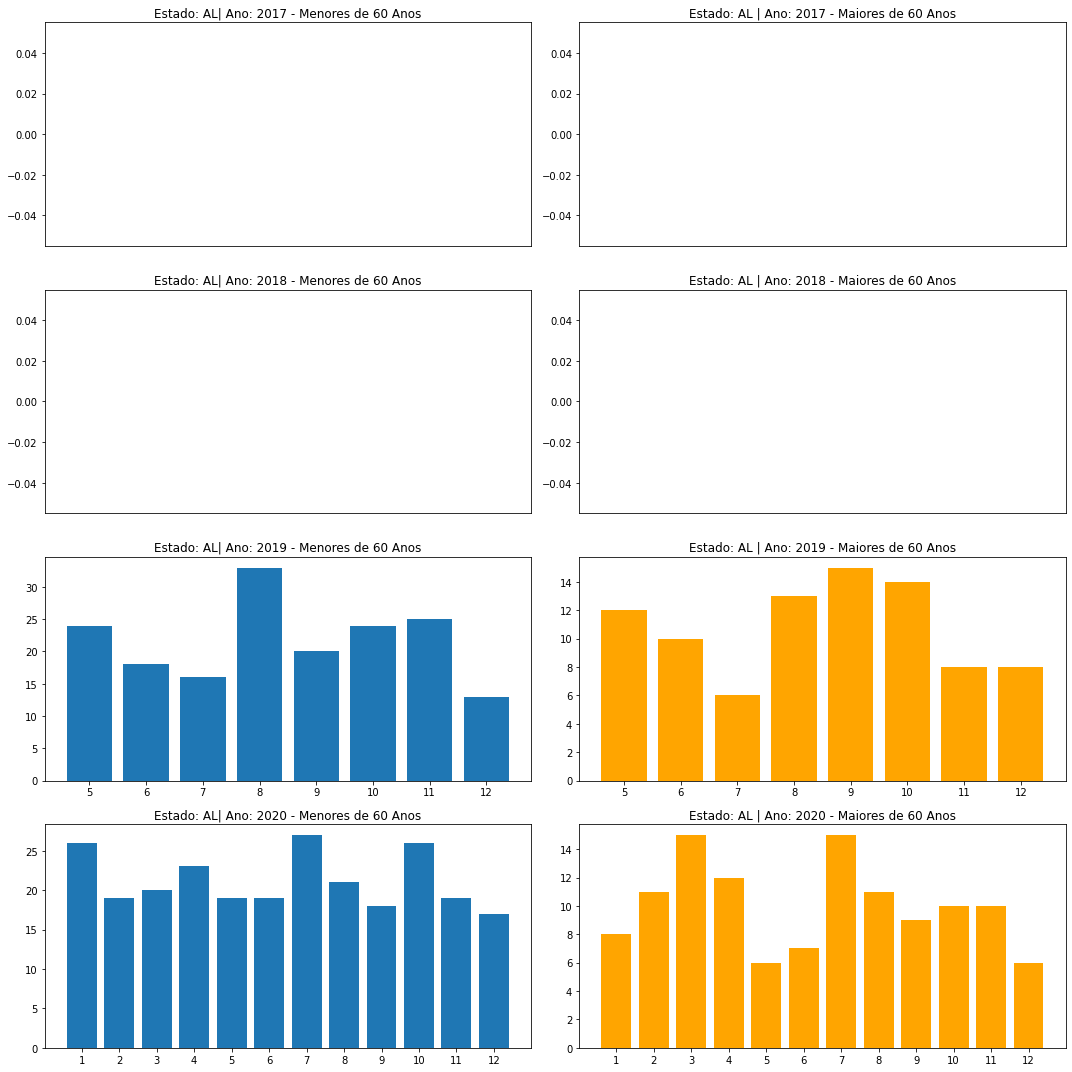

In [179]:
graficoEstadoPorData(df_2, 'AL')

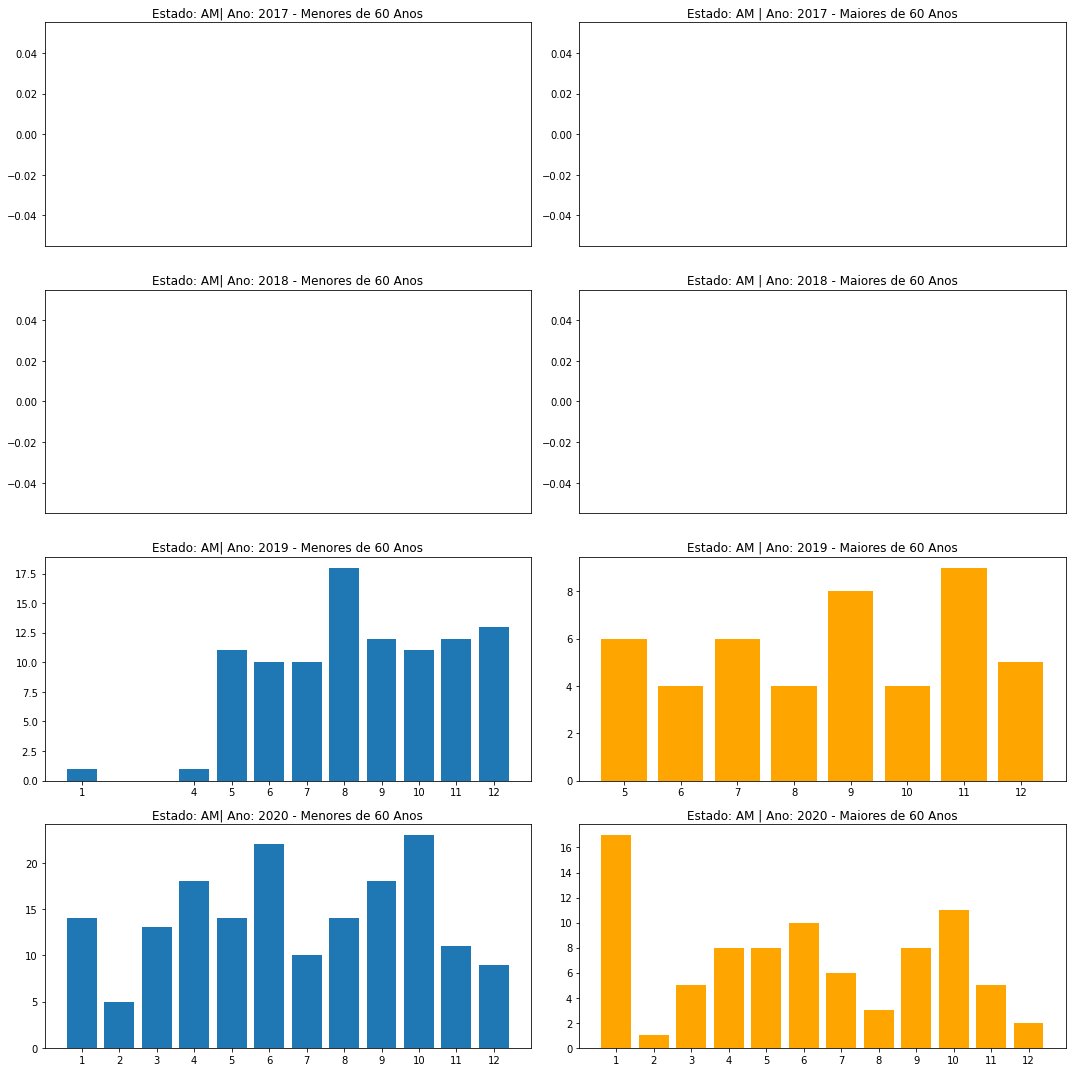

In [180]:
graficoEstadoPorData(df_2, 'AM')

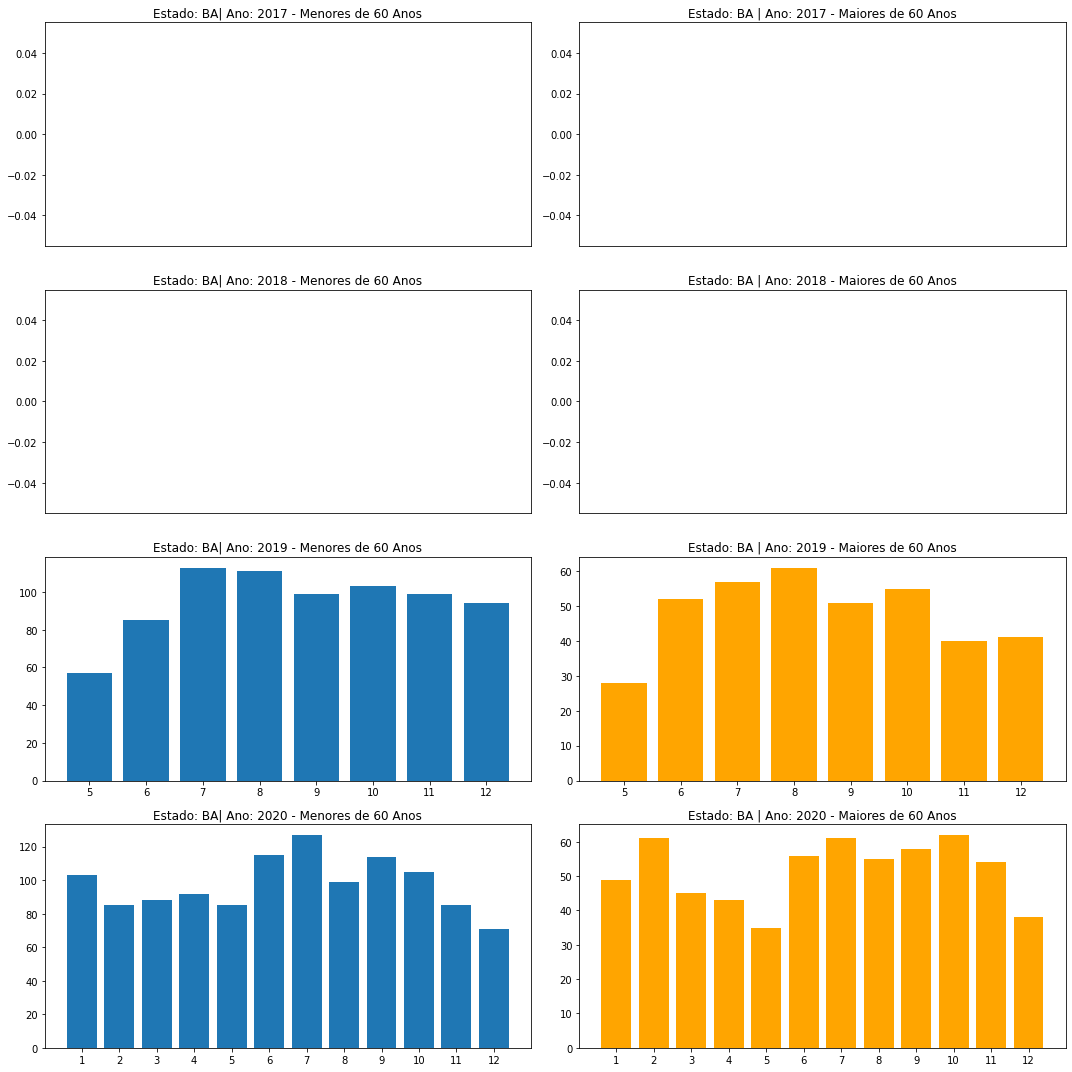

In [181]:
graficoEstadoPorData(df_2, 'BA')

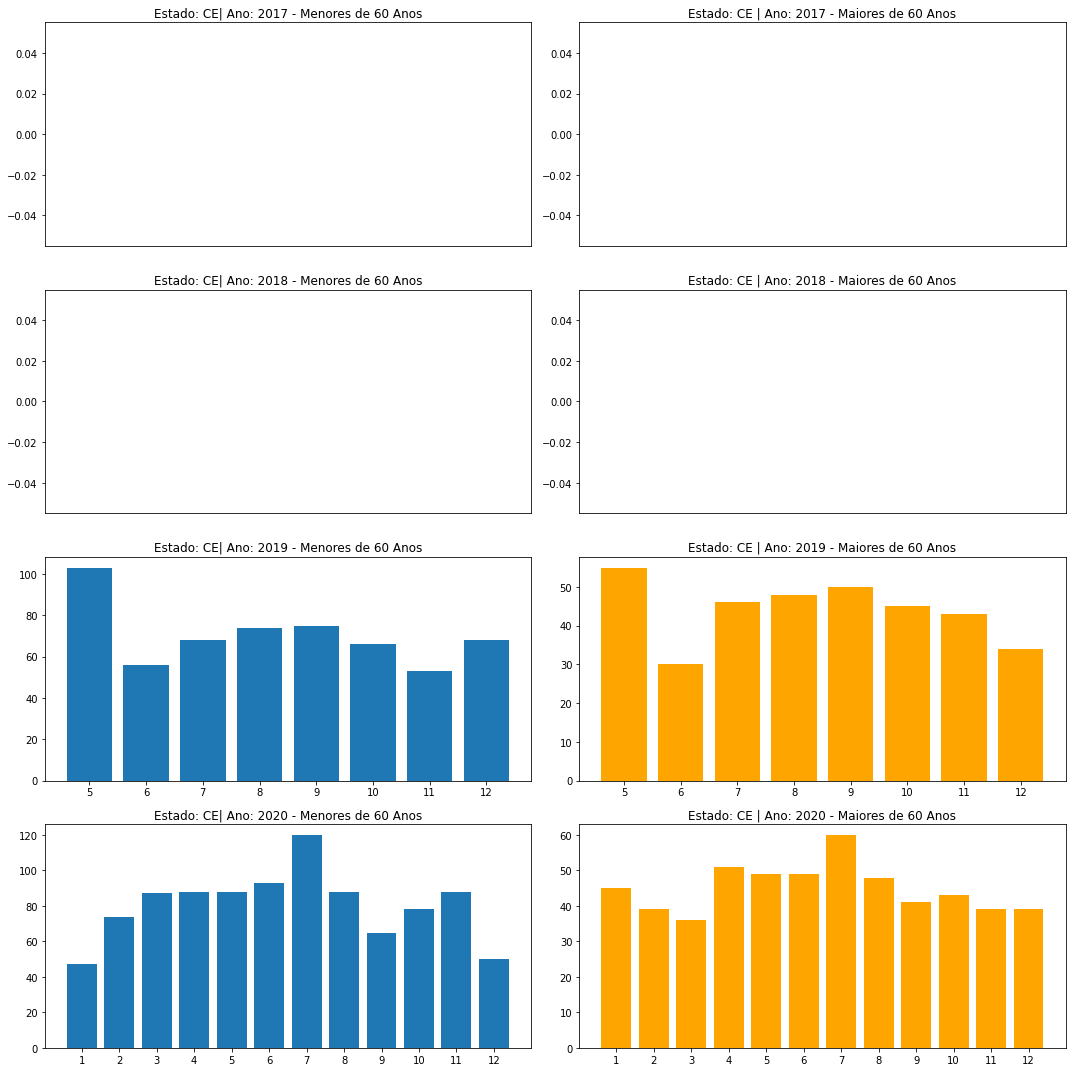

In [182]:
graficoEstadoPorData(df_2, 'CE')

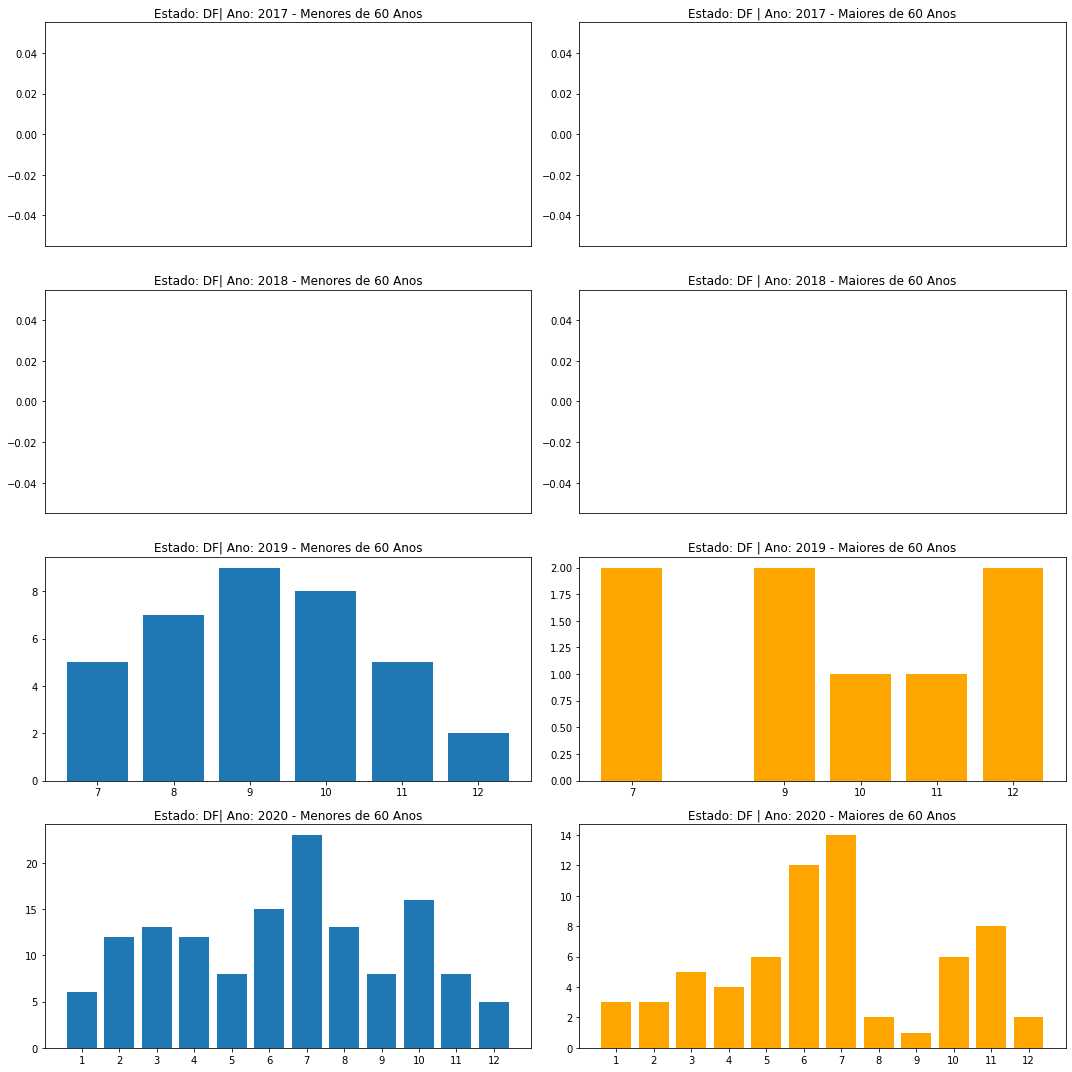

In [183]:
graficoEstadoPorData(df_2, 'DF')

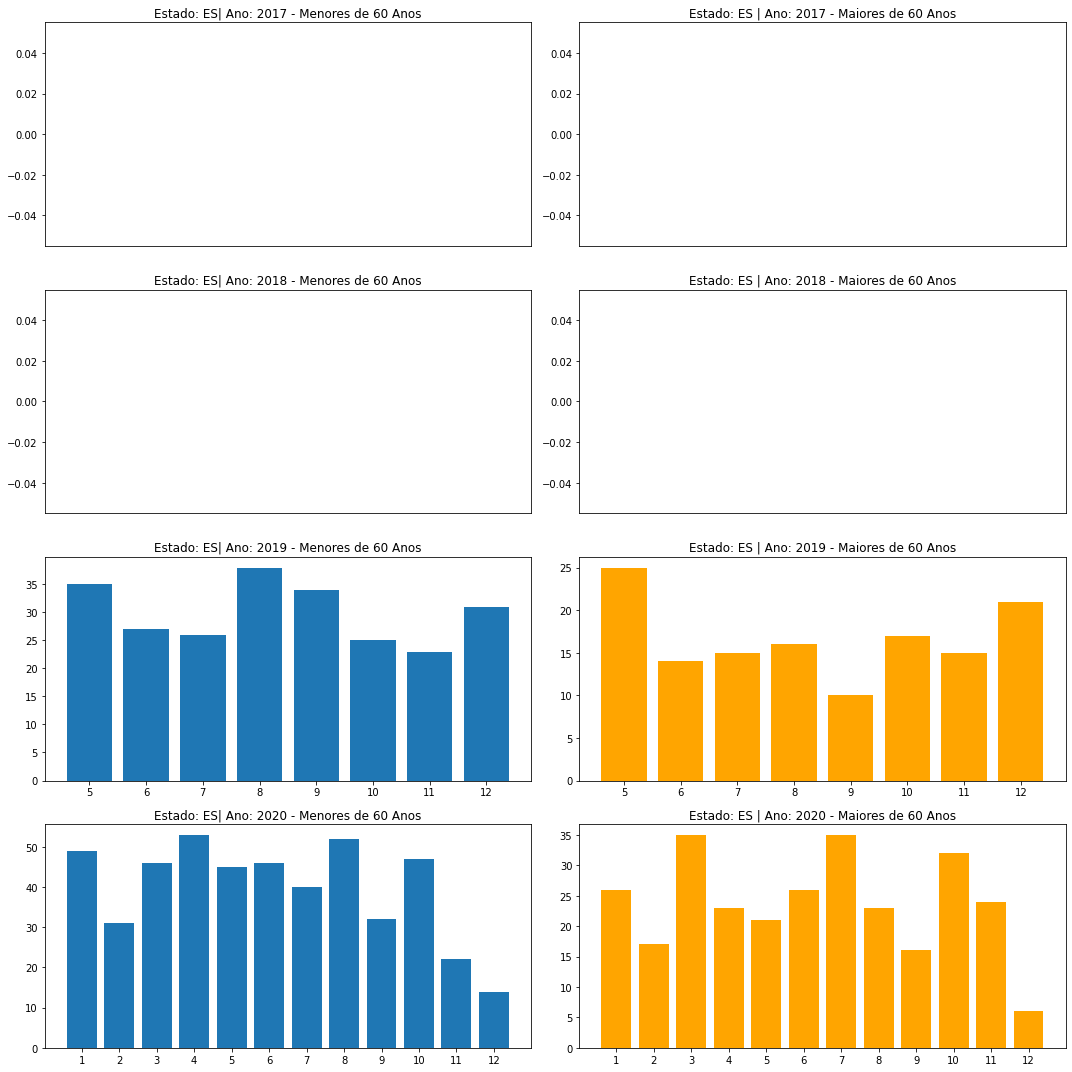

In [184]:
graficoEstadoPorData(df_2, 'ES')

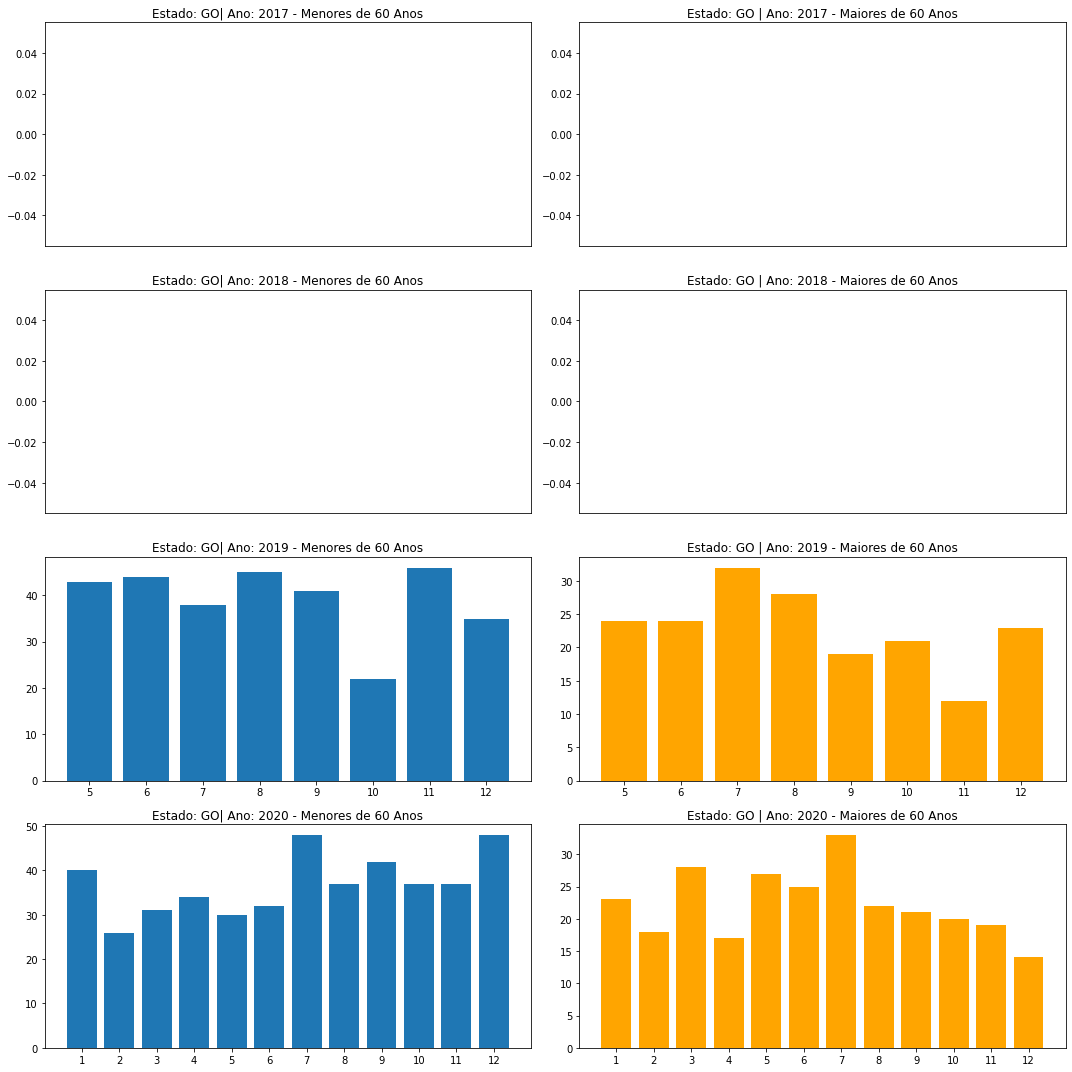

In [185]:
graficoEstadoPorData(df_2, 'GO')

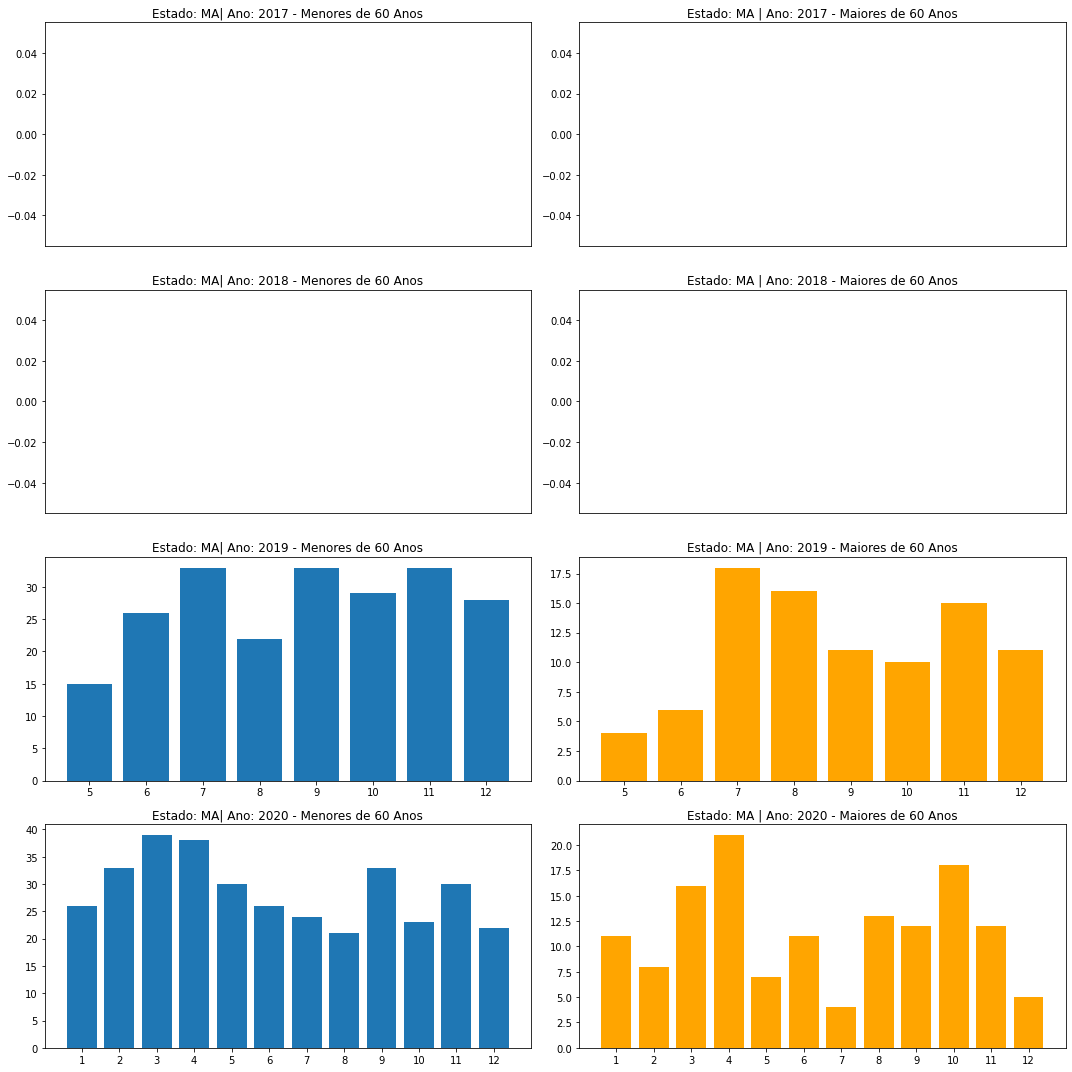

In [186]:
graficoEstadoPorData(df_2, 'MA')

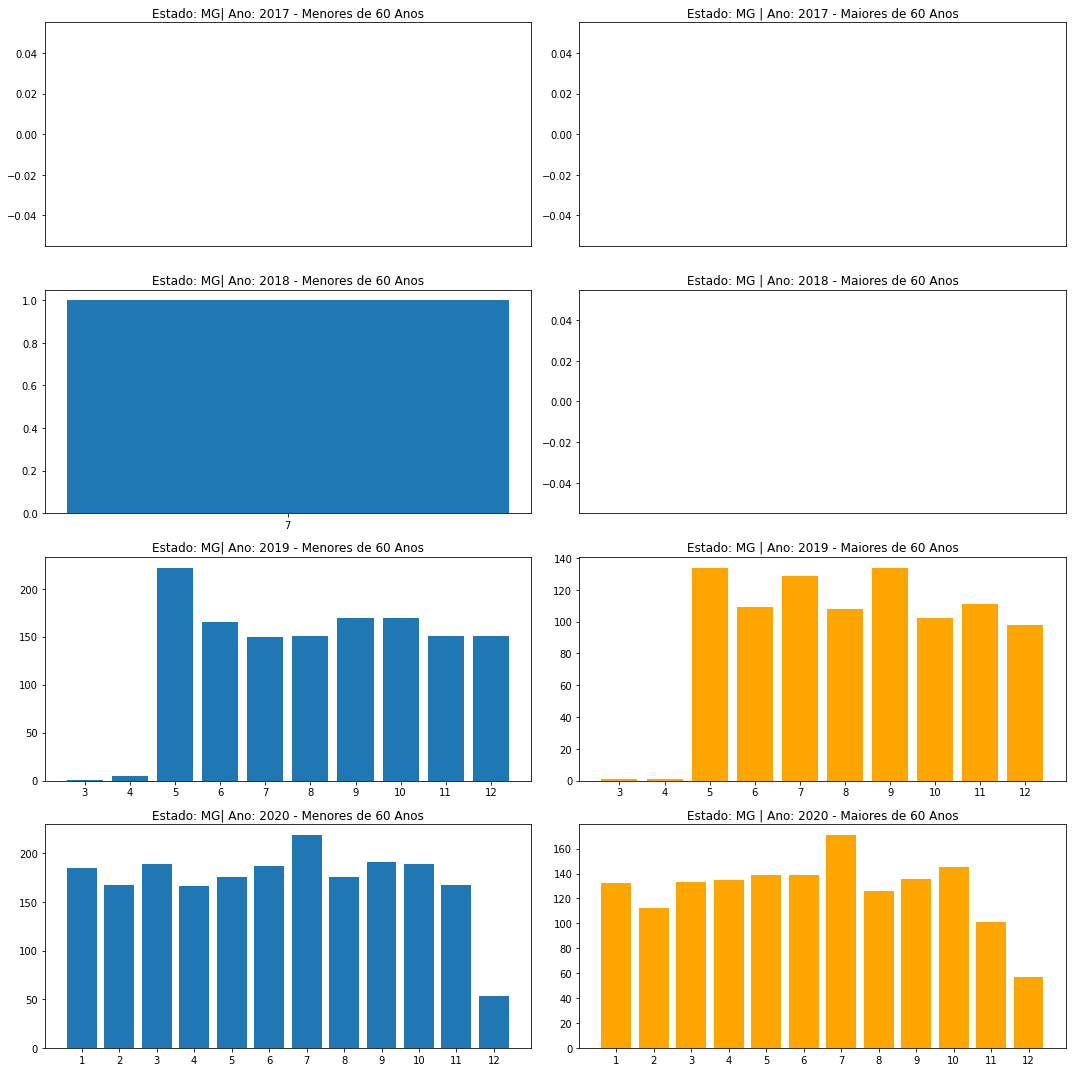

In [187]:
graficoEstadoPorData(df_2, 'MG')

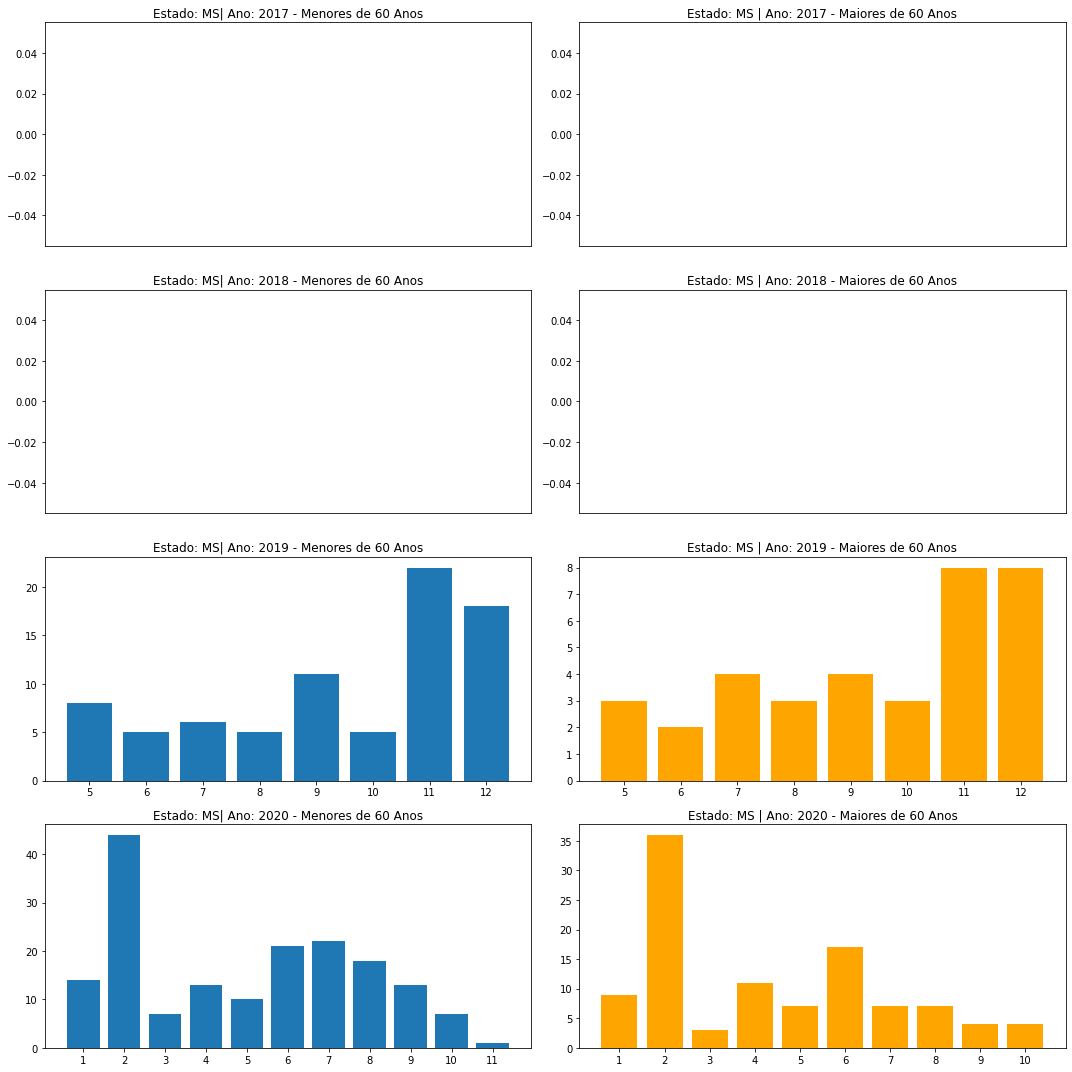

In [188]:
graficoEstadoPorData(df_2, 'MS')

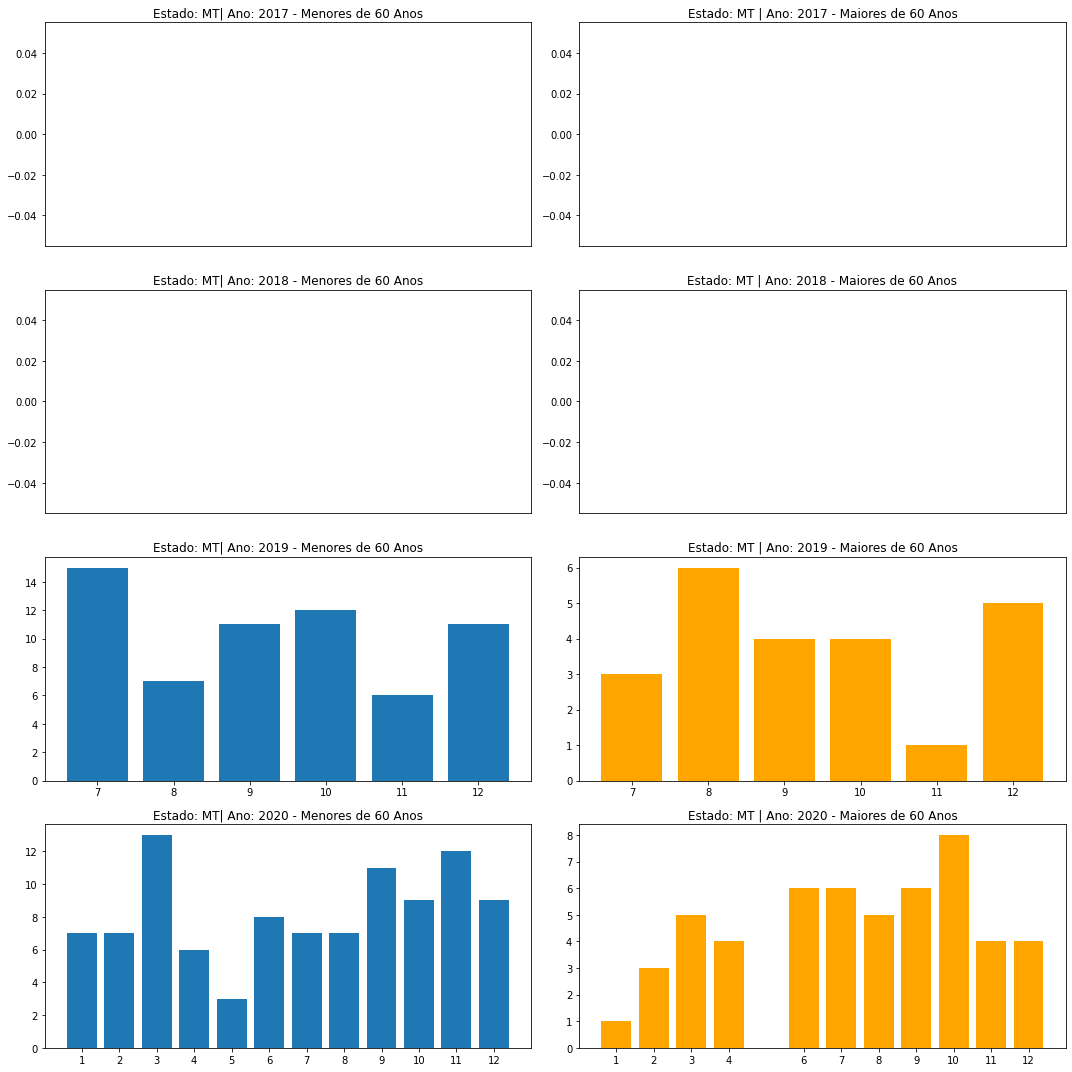

In [189]:
graficoEstadoPorData(df_2, 'MT') 

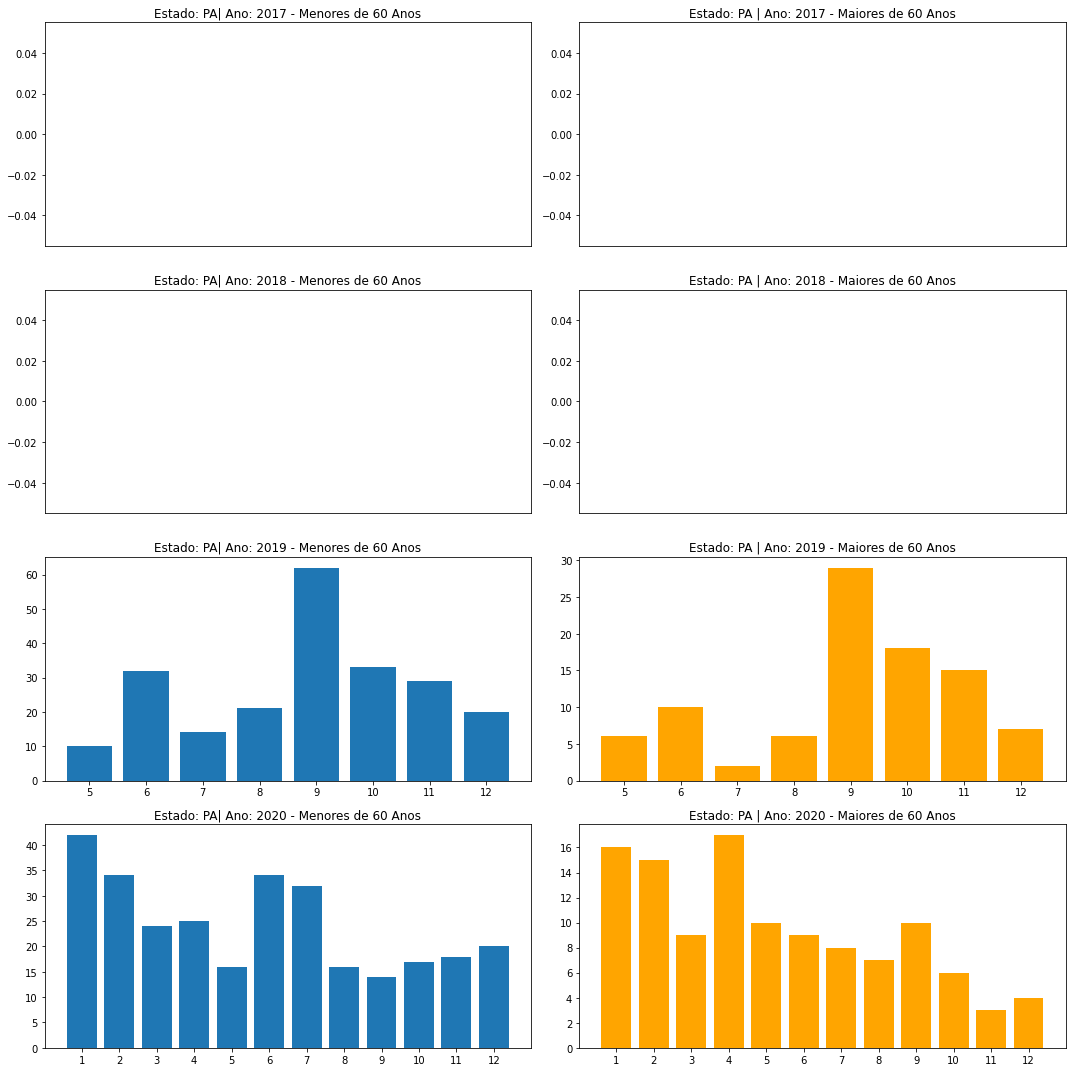

In [190]:
graficoEstadoPorData(df_2, 'PA') 

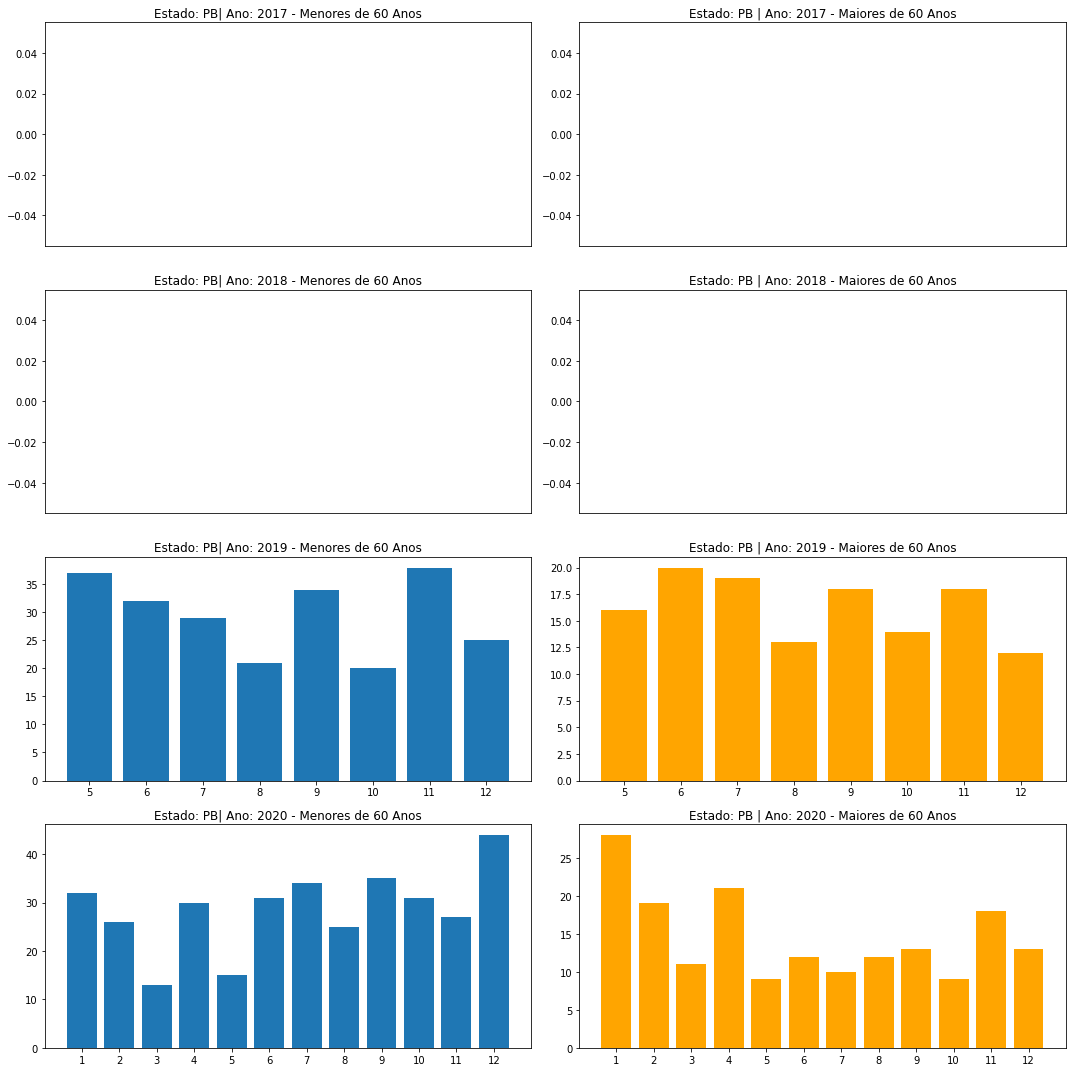

In [191]:
graficoEstadoPorData(df_2, 'PB') 

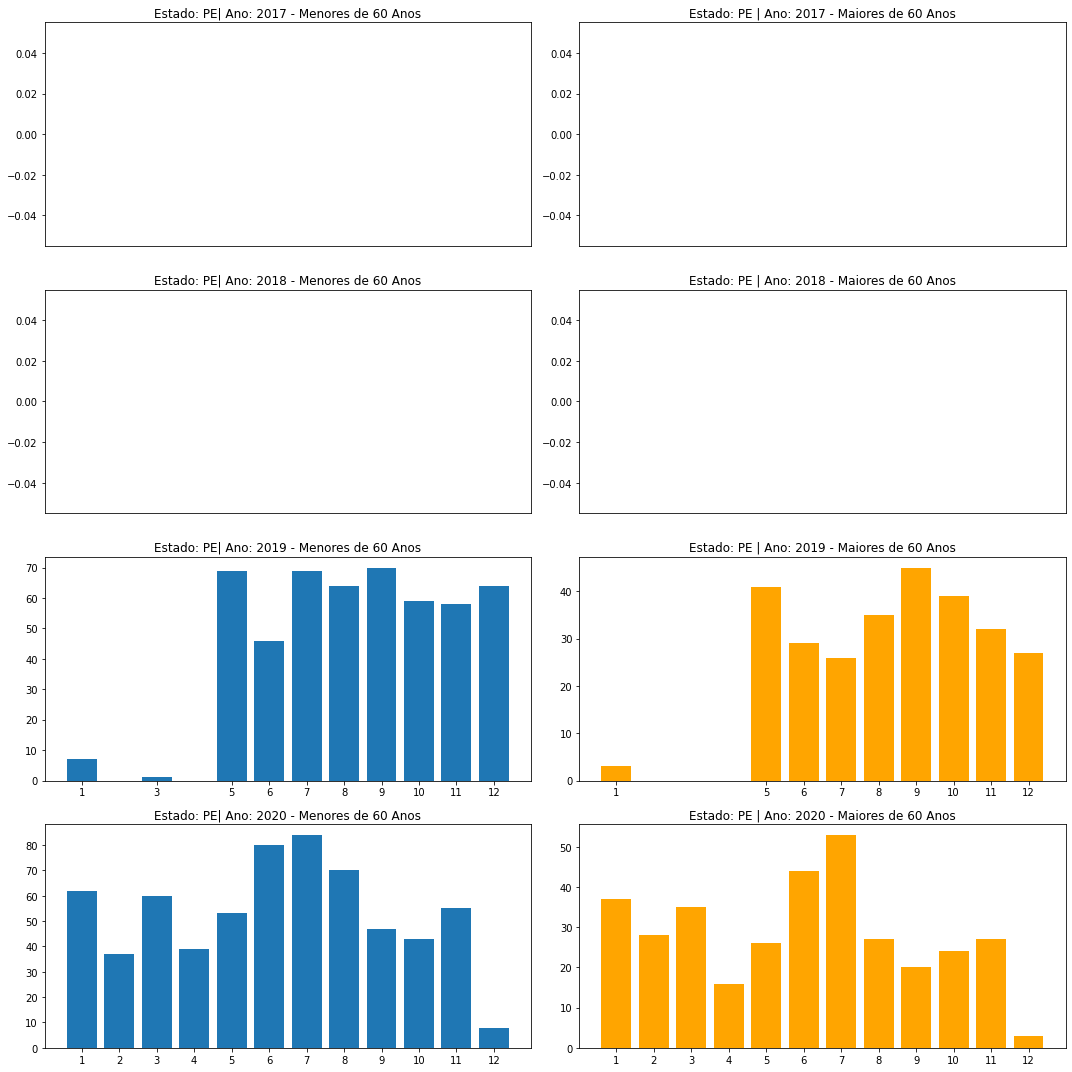

In [192]:
graficoEstadoPorData(df_2, 'PE') 

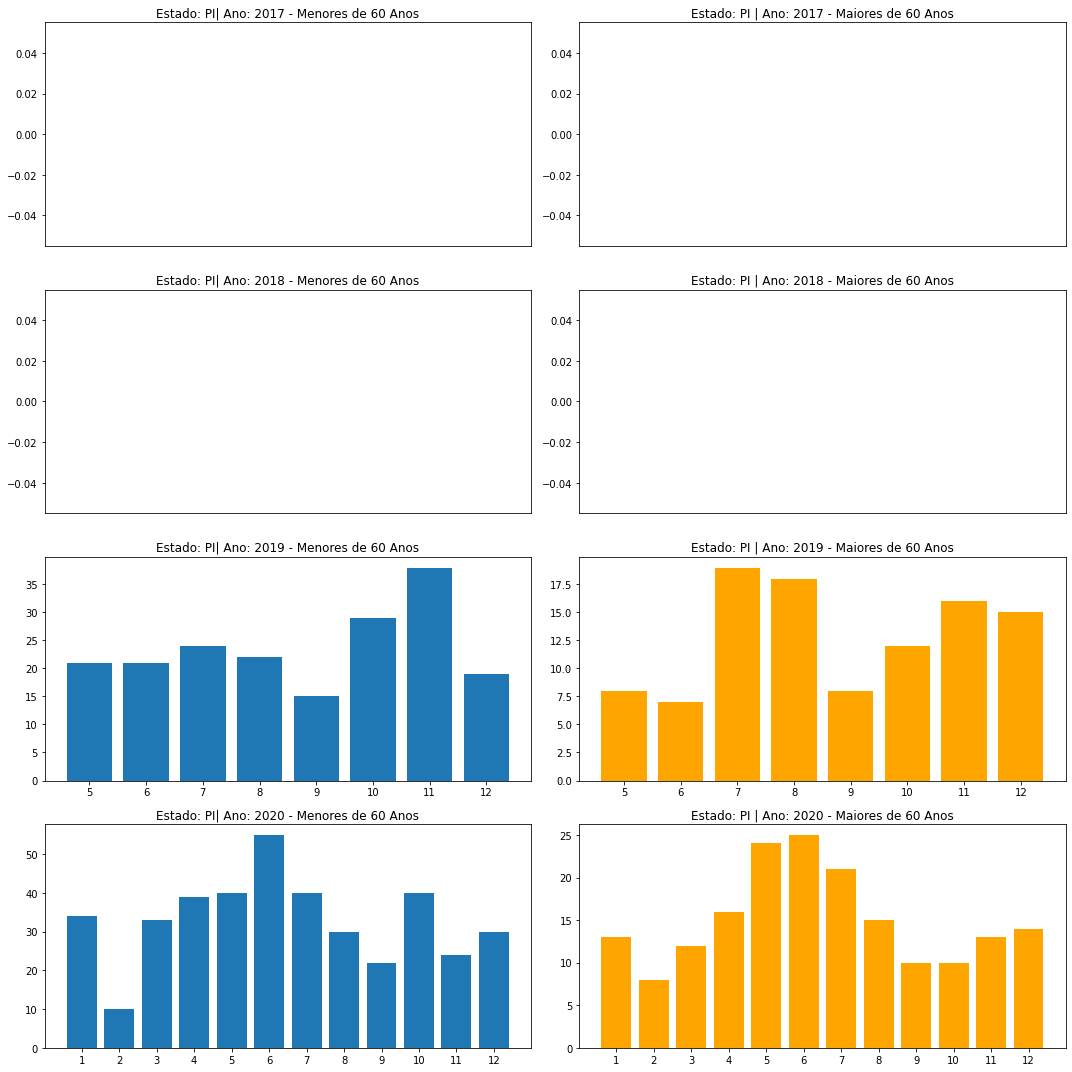

In [193]:
graficoEstadoPorData(df_2, 'PI') 

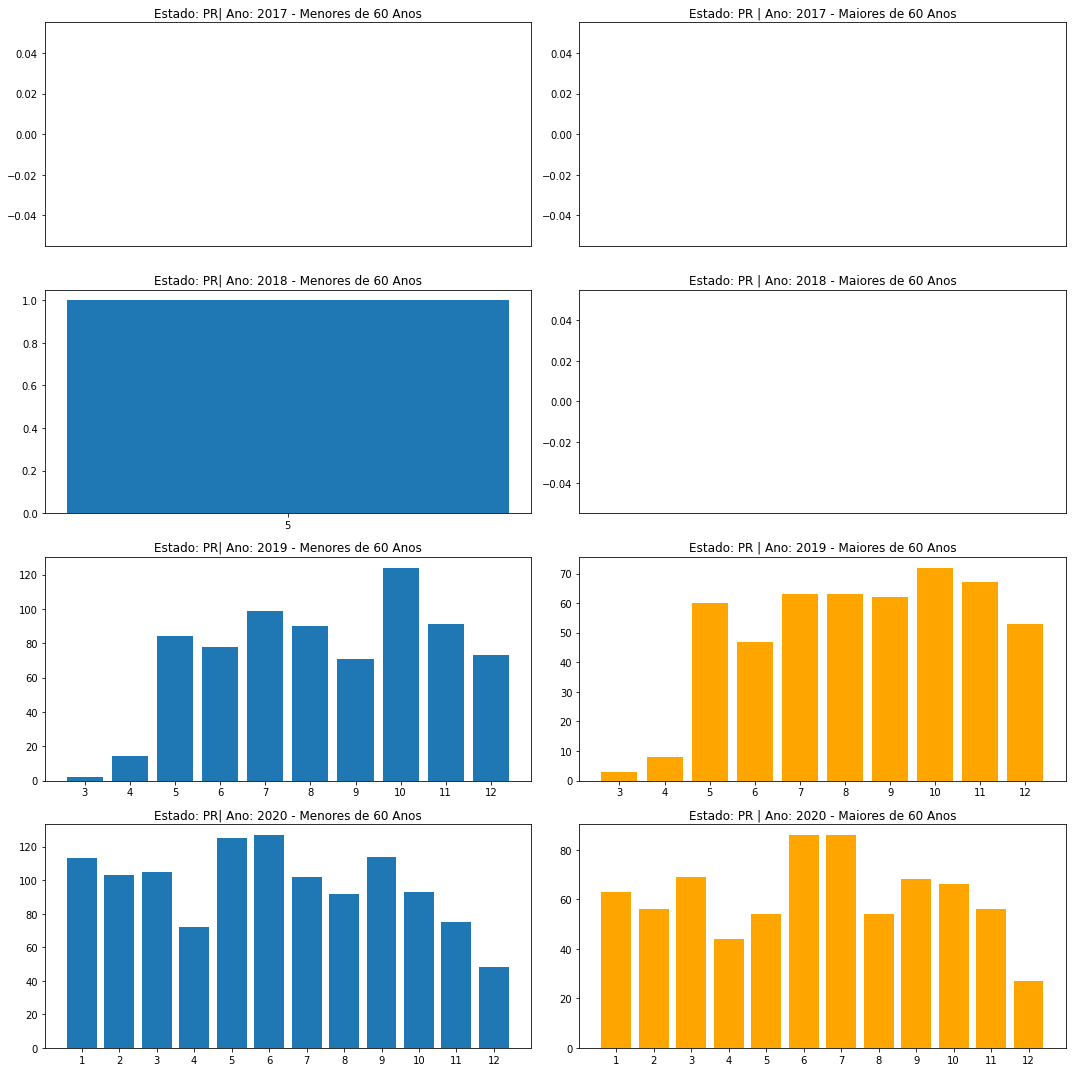

In [194]:
graficoEstadoPorData(df_2, 'PR') 

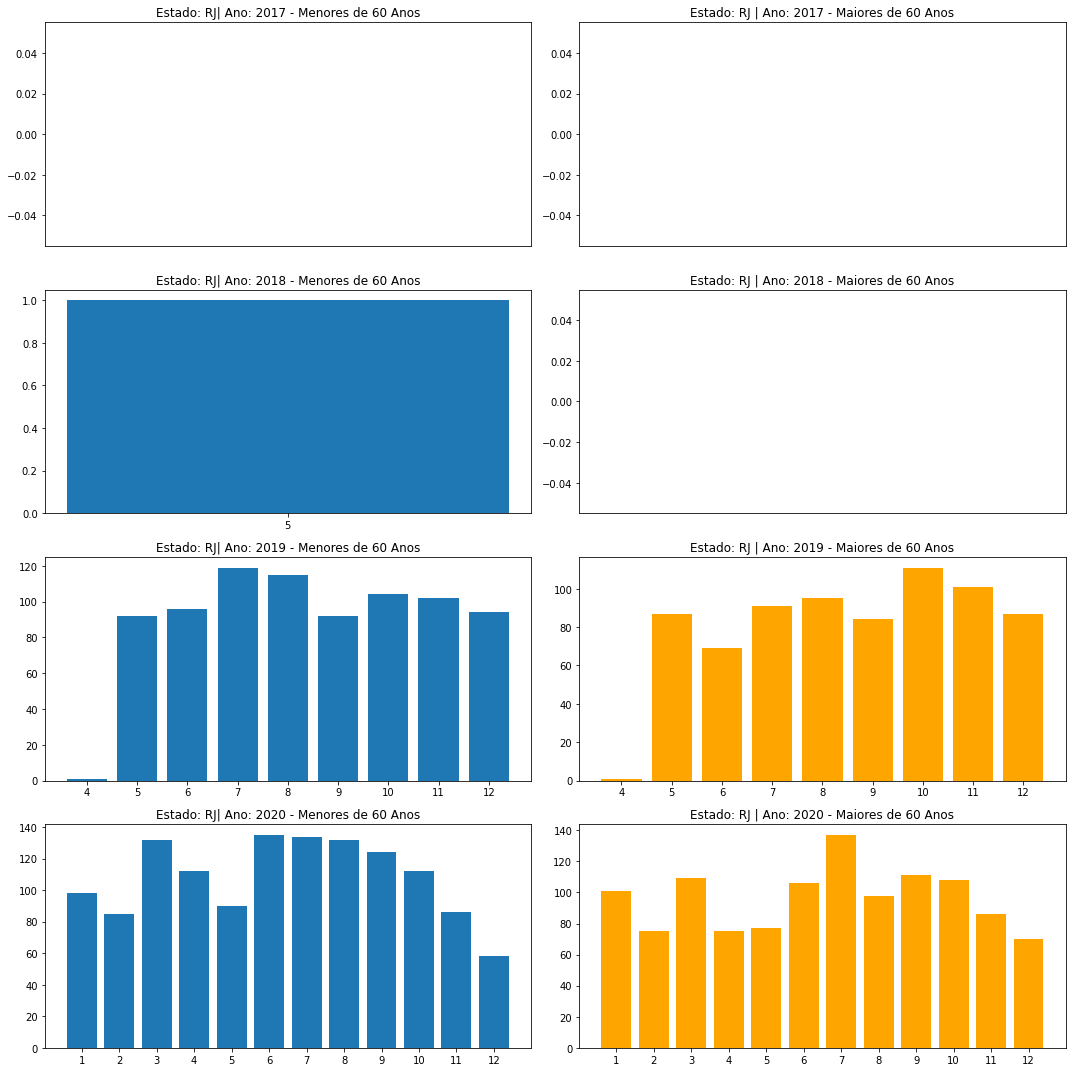

In [195]:
graficoEstadoPorData(df_2, 'RJ') 

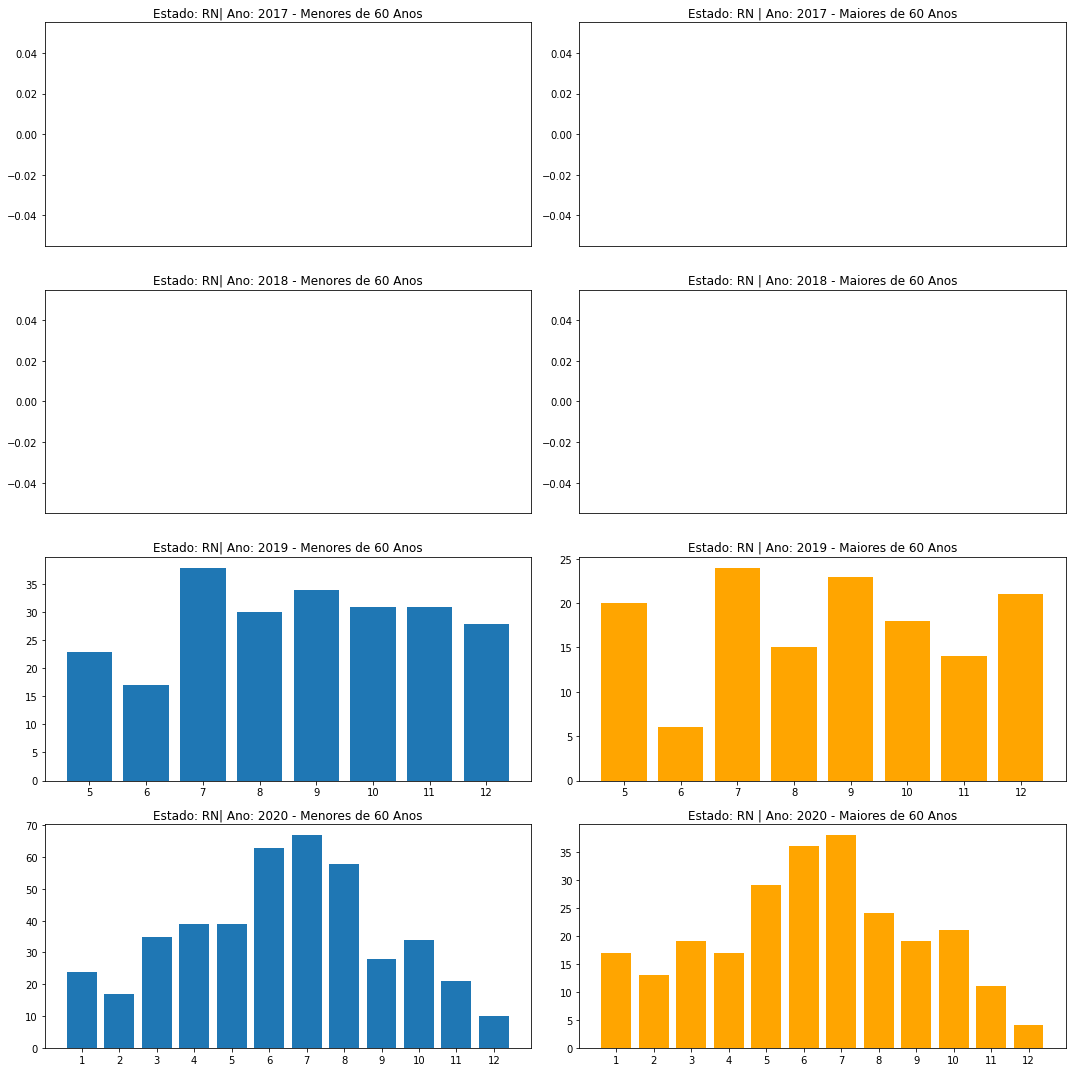

In [196]:
graficoEstadoPorData(df_2, 'RN') 

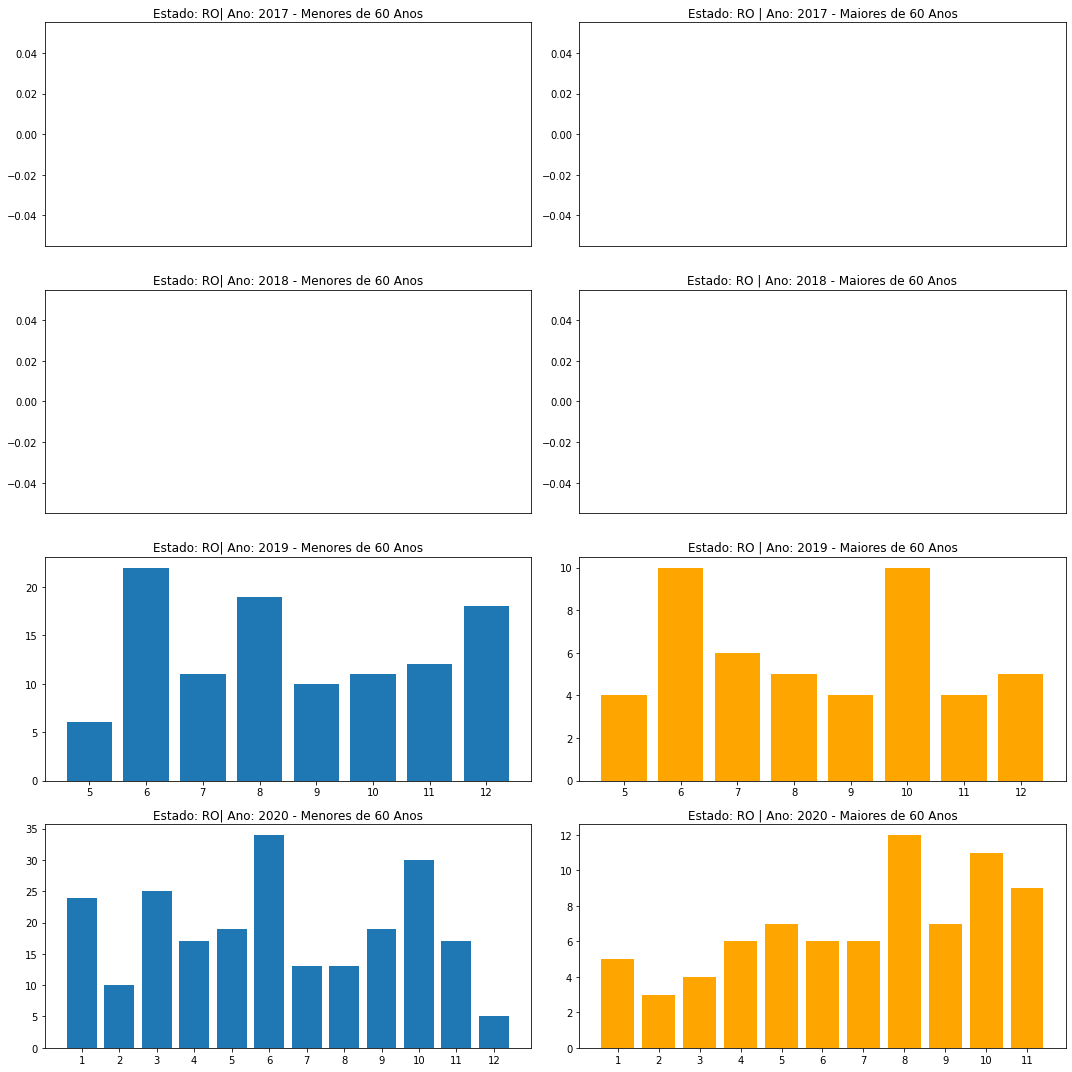

In [197]:
graficoEstadoPorData(df_2, 'RO') 

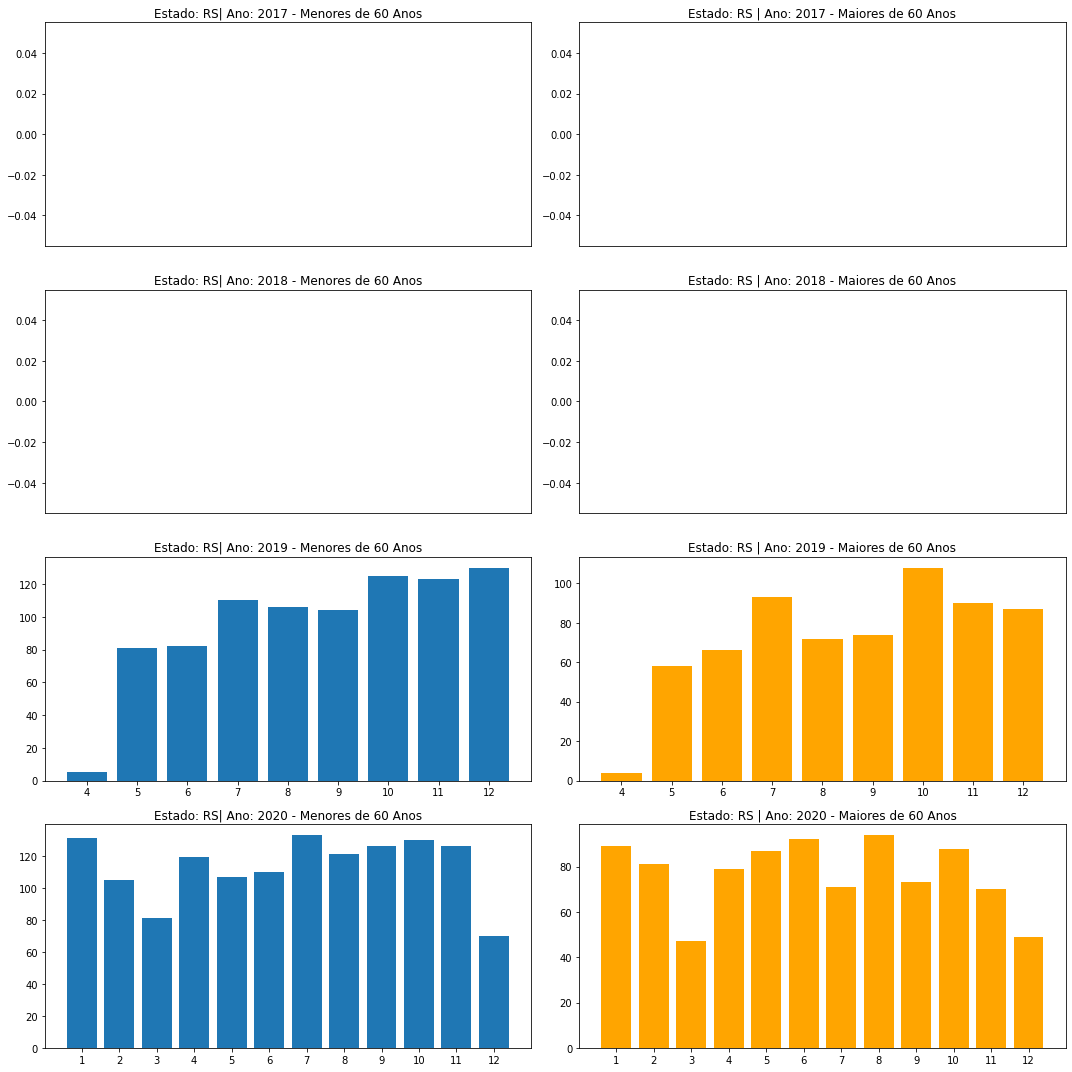

In [198]:
graficoEstadoPorData(df_2, 'RS') 

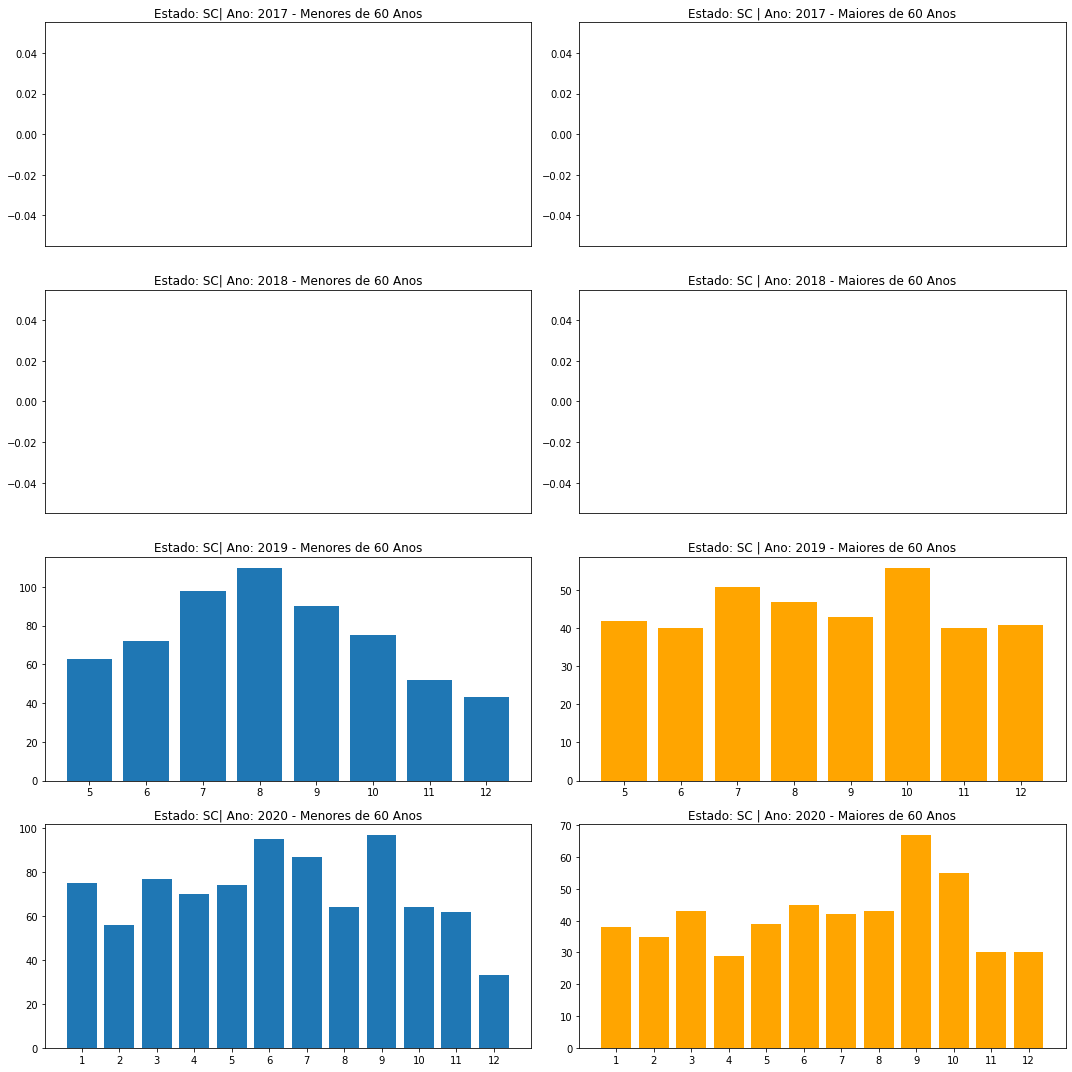

In [199]:
graficoEstadoPorData(df_2, 'SC')	   


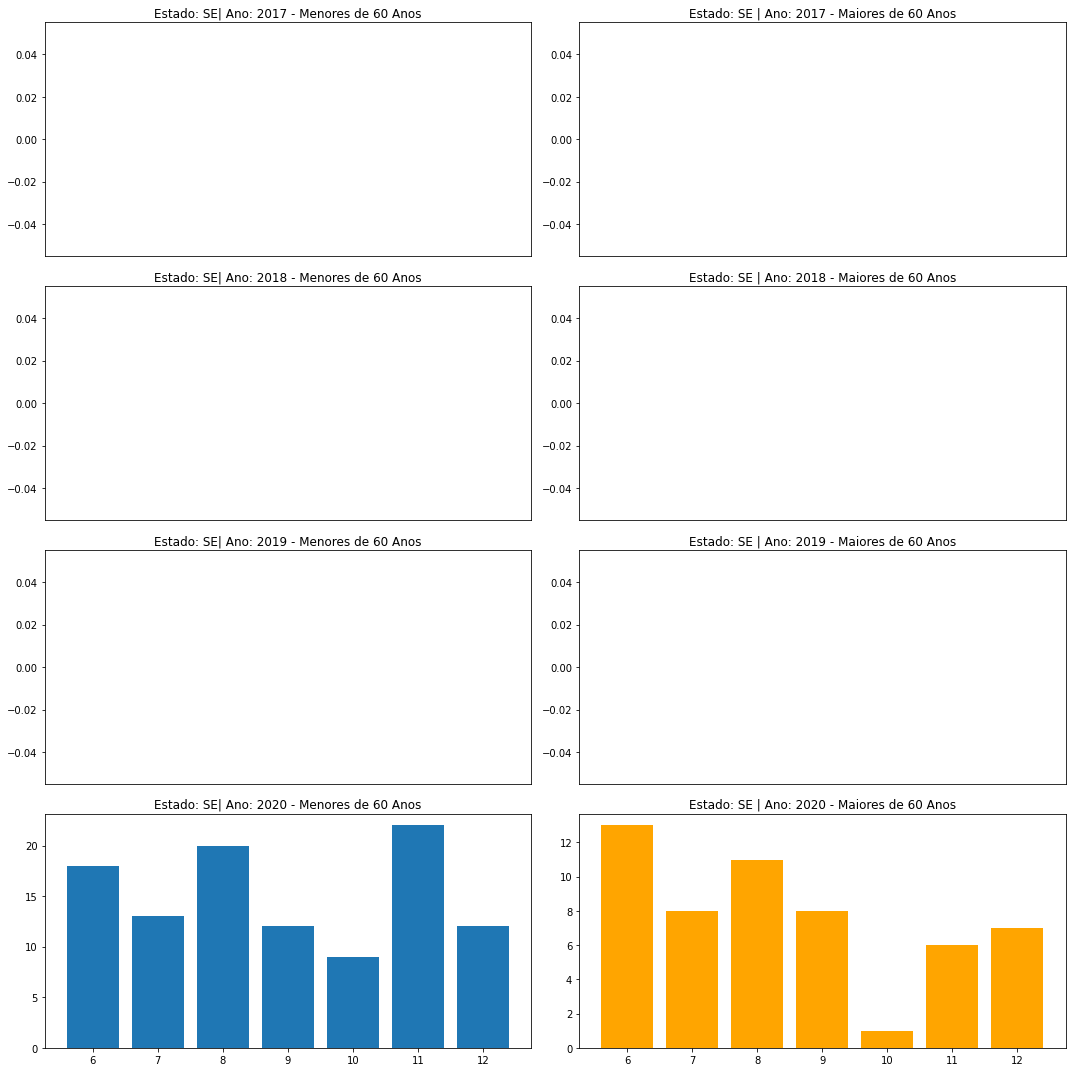

In [200]:
graficoEstadoPorData(df_2, 'SE') 

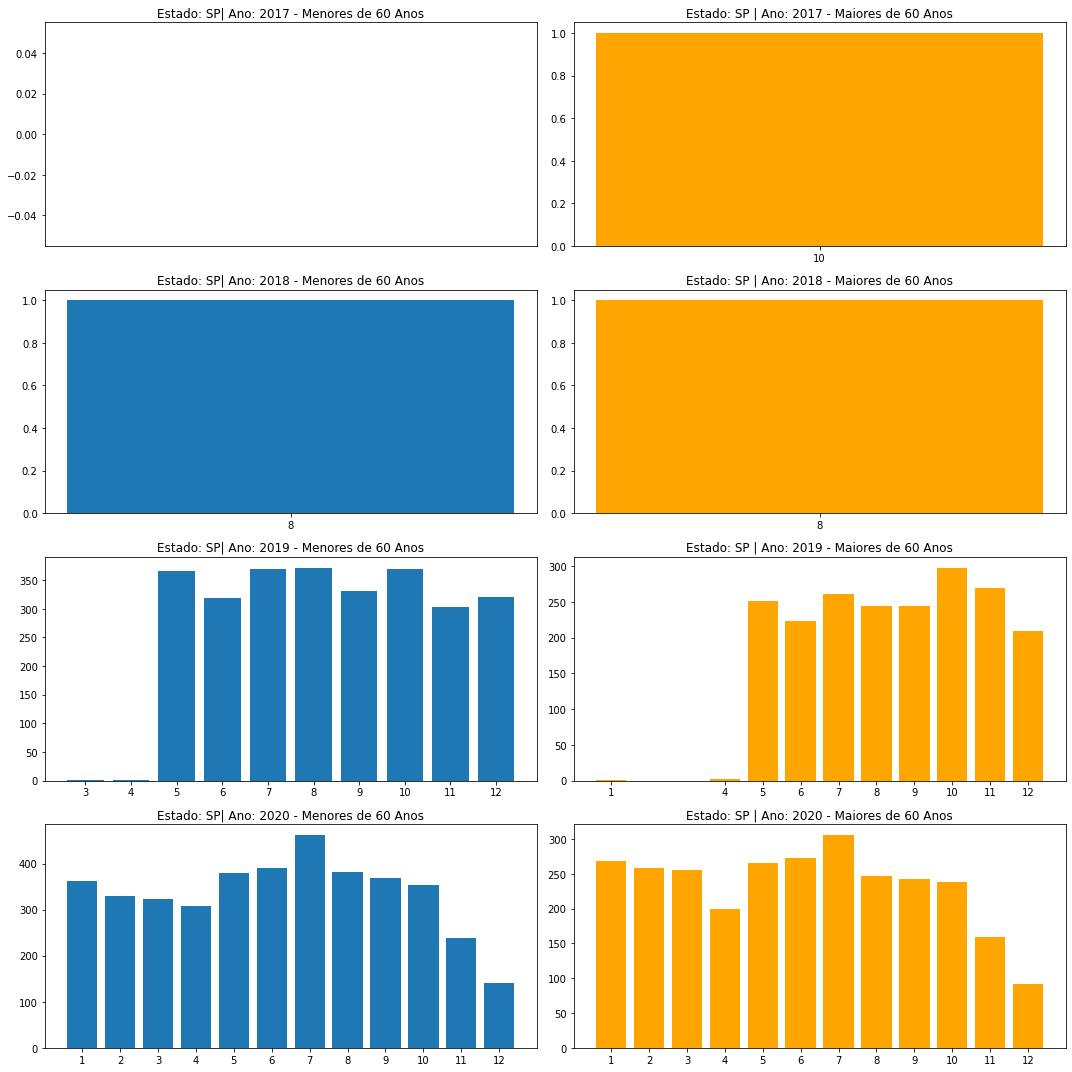

In [201]:
graficoEstadoPorData(df_2, 'SP') 

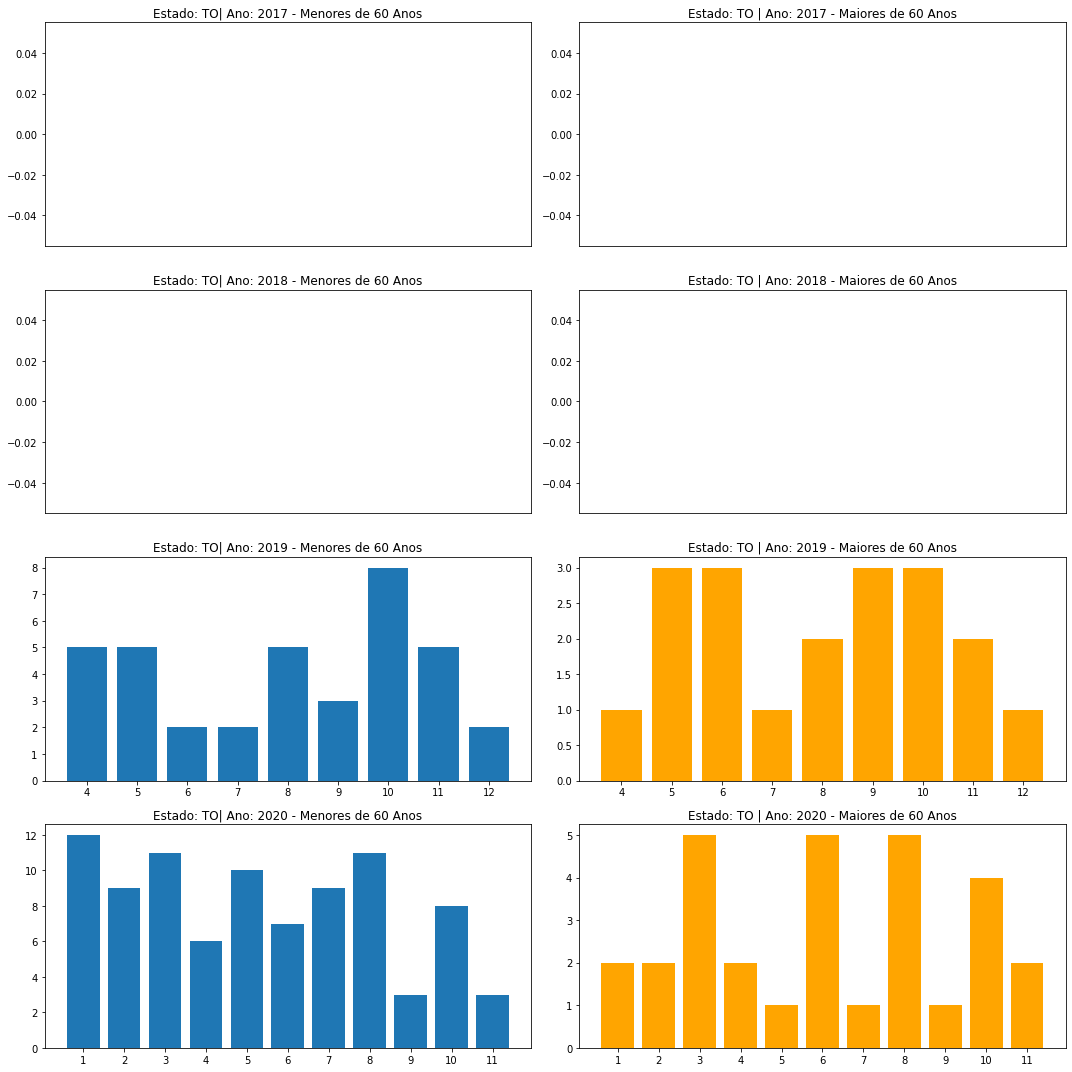

In [202]:
graficoEstadoPorData(df_2, 'TO')